# Final Project - Ontario Vehicle Analysis

### Name: Haris Ejaz 
### Student ID: 200713450
### No Group Members 

### Introduction and Motivation
This dataset was sourced from the data.ontario.ca database and contains the information of Ontarios vehicle record up to 2022 (last updated). Data is classed by vehicle class, make, model, year, number sold etc. It is downloaded from https://data.ontario.ca/dataset/vehicle-population-data.

Upon finding this dataset on Ontario's database, it sparked my interest in Ontario's car market, and wanting to analyze the registration data of all vehicles up until 2022. The motivation was to see if there were any trends in the distribution of vehicles sold, which car brands were the most popular, and finally which companies had the highest market share. 

### Proposed Approach

#### My Question:
What are the key trends and insights in Ontario's car market, and which car make has the biggest market share (i.e. most vehicles sold)? 

#### Dataset description:
The dataset is a txt file, containing several columns as mentioned above which class the vehicle, its make, model, and if it is fit to drive etc. There were 13 columns in this dataset, so I had to analyze and find the ones which would provide the most insights to answer the research question. 

#### Data Processing:
During the data processing I had to load in the txt file and read the file line by line to convert the dataset into a list for analysis. Then I noticed that the dataset was quite large containing additional sorts of vehicles such as motorcycles, commercial, off road, etc. So I decided to filter these additional vehicle classes which would distort the data. Additionally, some vehicle models could not be identified in the dataset and were marked by '***' so I removed these to make the charts more readible. Following this, I began to analyze the distribution of data by vehicles types, adding up the total of vechicles of each make, and identifying which were the most popular vehicle models. 

#### Visualization:
For the visualizations I used the matplot library which allowed for bar charts, and pie chart visualizations.

#### Visualization description and analysis
The first visualization is total cars in Ontario by each car make, and it is bar chart. The horizontal axes is labelled in alphabetical order to make it easy to search for different car makes, and the vertical axes is labelled in millions to make it easy to compare large number of vehicle registrations. From this chart we can gain the insight that Ford Motors has the largest market share with over 3 million vehicles registered, followed by Chevrolet, Honda and Toyota. This bar chart gives us a great overview of which car companies have been dominating the car market in Ontario. 

Furthermore, in the second visualization is comprised of the most popular vehicles by each car make. This allows us to see the 5 most popular vehicles models which are being driven by each make. For instance, looking at the pie chart for Acura we can see the most popular vehicle in their fleet is MDX with 38.6% followed by RDX with 31.5% and the rest shared between other models. This breakdown can help us find which vehicles are the most common by each car make and can help buyers and sellers see which vehicles are potentially the best by each brand. 

Finally the last visualization is another bar chart which allows us to see the distribution of the unfit cars by each car make. This can be used in tandem with the 'total vehicles by car make bar' chart and see which car makes are most unreliable in comparison to their total number of vehicles. For instance, we can see that Toyota has a the most unfit vehicles but it is not really that many in comparison to their total number of vehicles hence demonstrating their reliability. 

#### Conclusion
In Conclusion, upon analysis of this dataset we are able to gain insights on Ontario's car market and the makes and models that are most popular. These insights can help people when in the market for a new car, allowing them to see key trends such as popular models and reliability factors. 



In [49]:
dataset = []

# Reading the dataset from txt file
with open("2022_Reg_Veh_ReportA_Class&Make&Model&Year.TXT", "r") as file:
    next(file)  # Skip the header
    for line in file:
        dataset.append(line.strip().split("\t"))

total_vehicles_by_maker = {}

# Go line by line through dataset, and filter for only passenger vehicles i.e. no motorcycles, offroad, commercial etc.
# Add up vehicles by each car brand
for row in dataset:
    vehicle_class = row[0]  
    if vehicle_class == 'PASSENGER':  
        maker = row[1]  
        total = int(row[-1])
        total_vehicles_by_maker[maker] = total_vehicles_by_maker.get(maker, 0) + total

max_maker = max(total_vehicles_by_maker, key=total_vehicles_by_maker.get)
max_market_share = total_vehicles_by_maker[max_maker]

print("Car brand with the highest Market Share in Ontario's Car Market up until 2022:")
print("Maker:", max_maker)
print("Total Num of Vehicles:", max_market_share)

Car brand with the highest Market Share in Ontario's Car Market up until 2022:
Maker: FORD
Total Num of Vehicles: 3211268


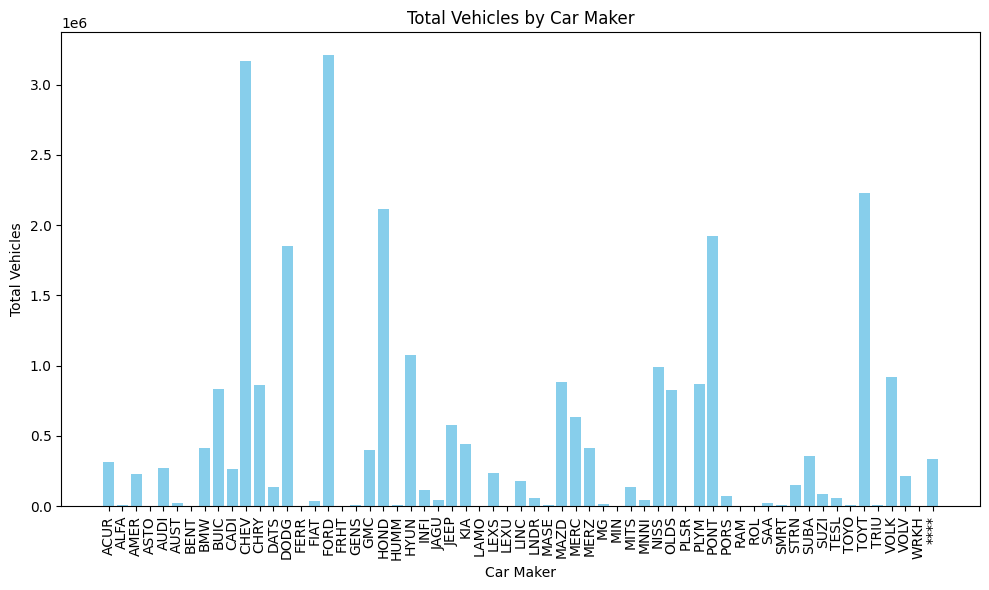

In [50]:
import matplotlib.pyplot as plt

makers = list(total_vehicles_by_maker.keys())
total_vehicles = list(total_vehicles_by_maker.values())

plt.figure(figsize=(10, 6))
plt.bar(makers, total_vehicles, color='skyblue')
plt.xlabel('Car Maker')
plt.ylabel('Total Vehicles')
plt.title('Total Vehicles by Car Maker')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

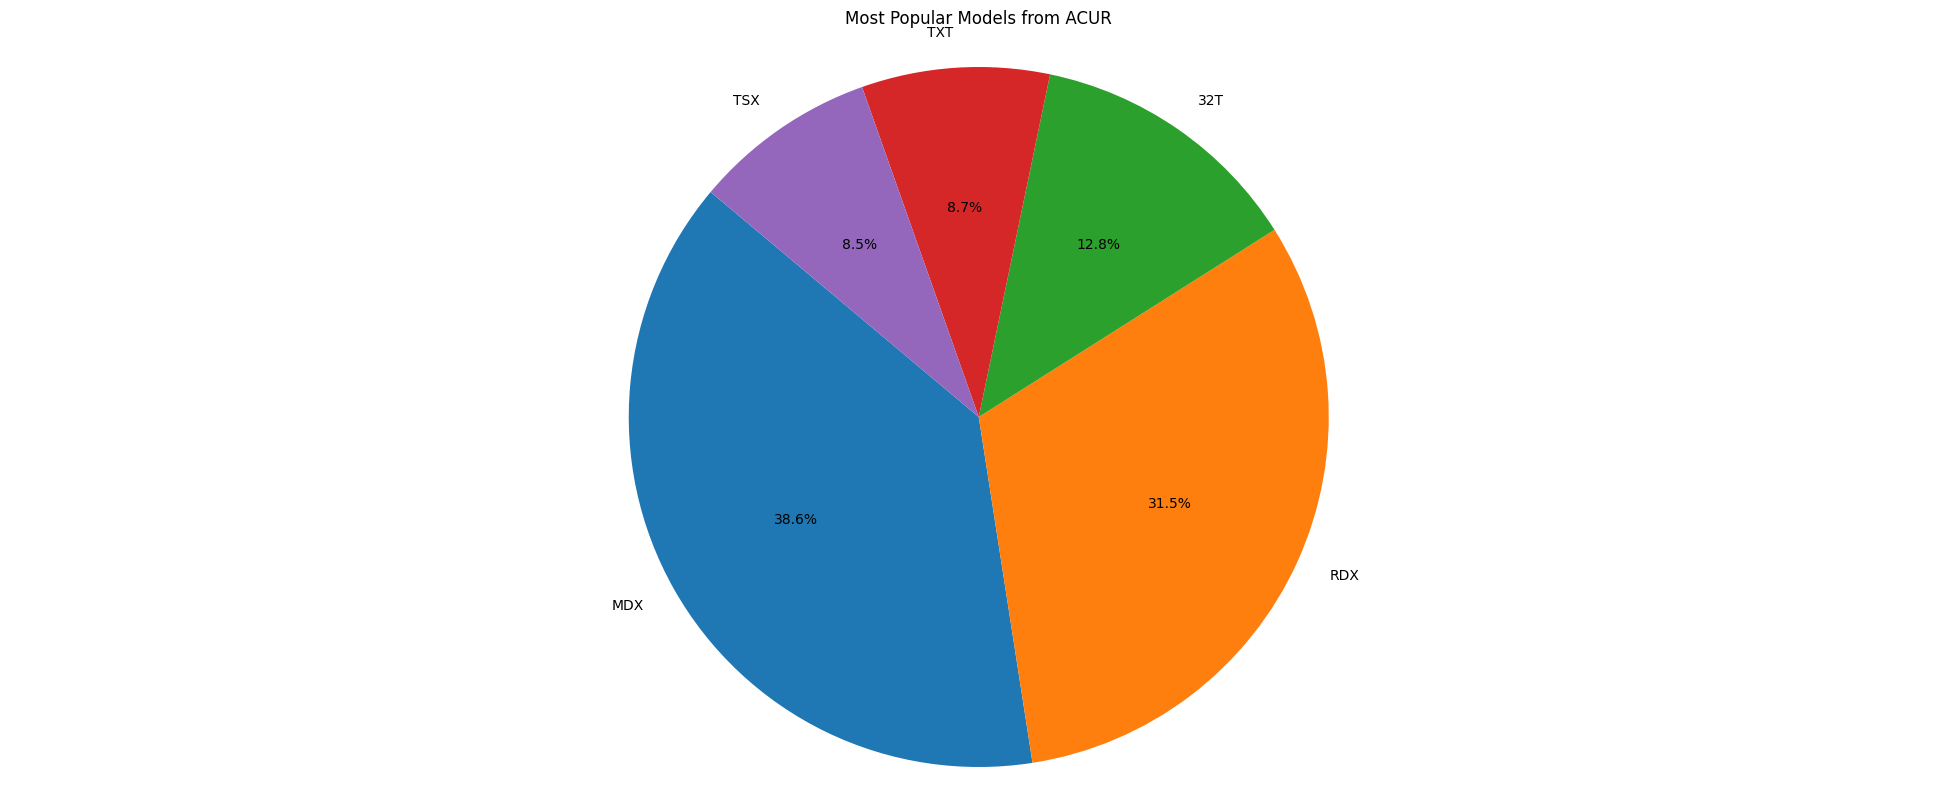

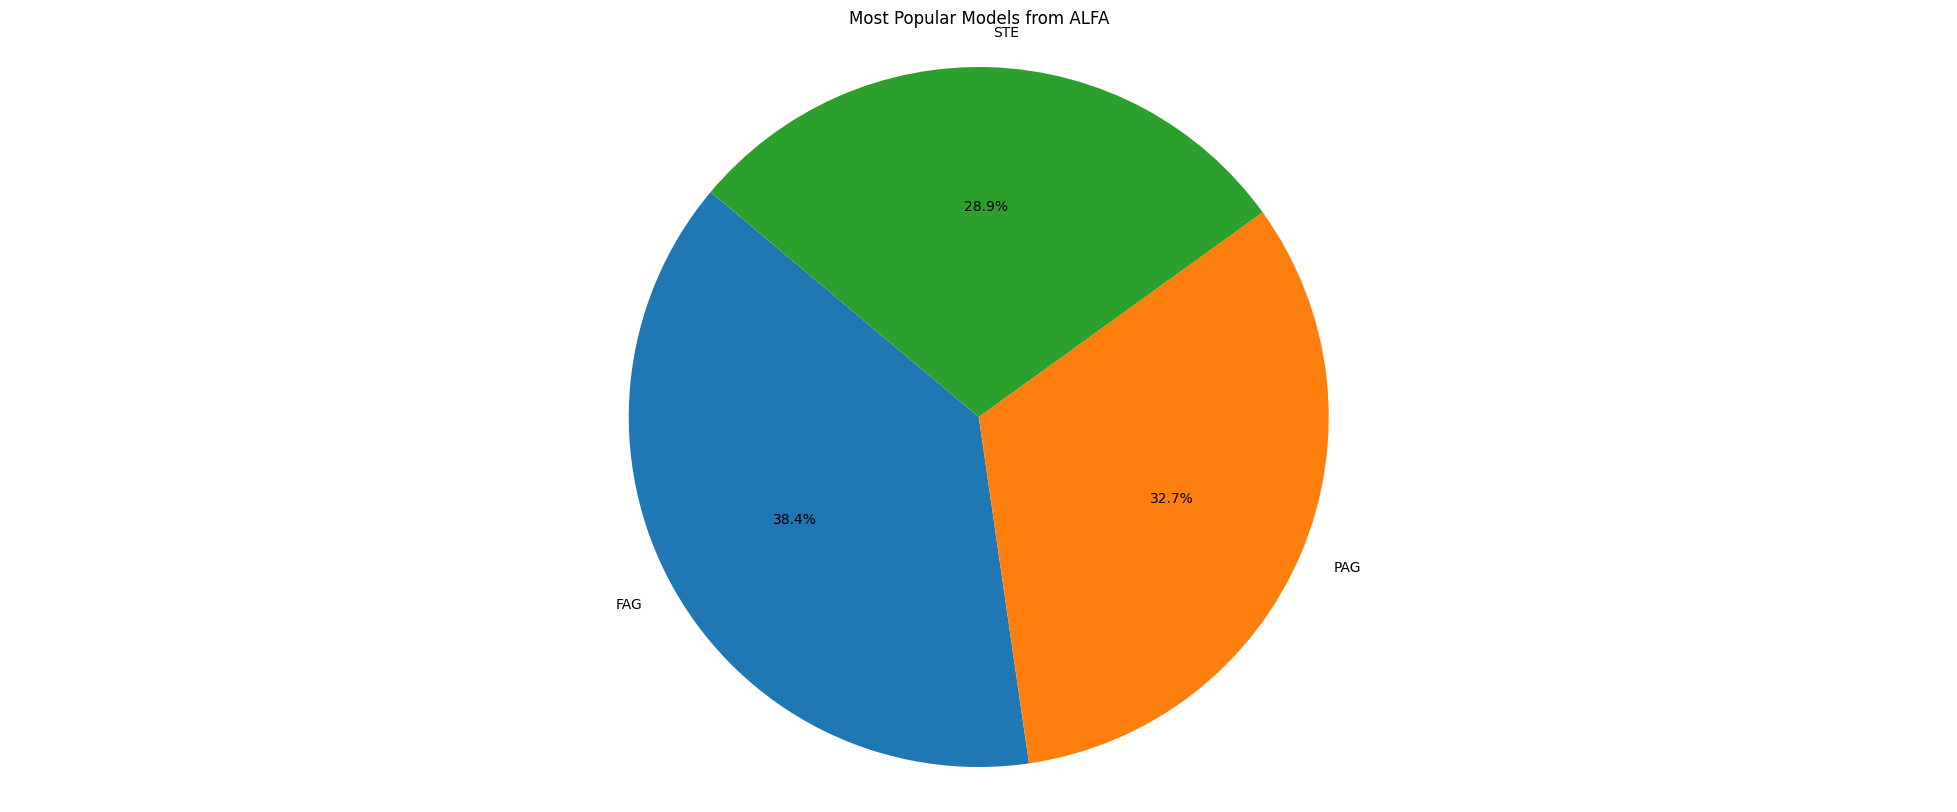

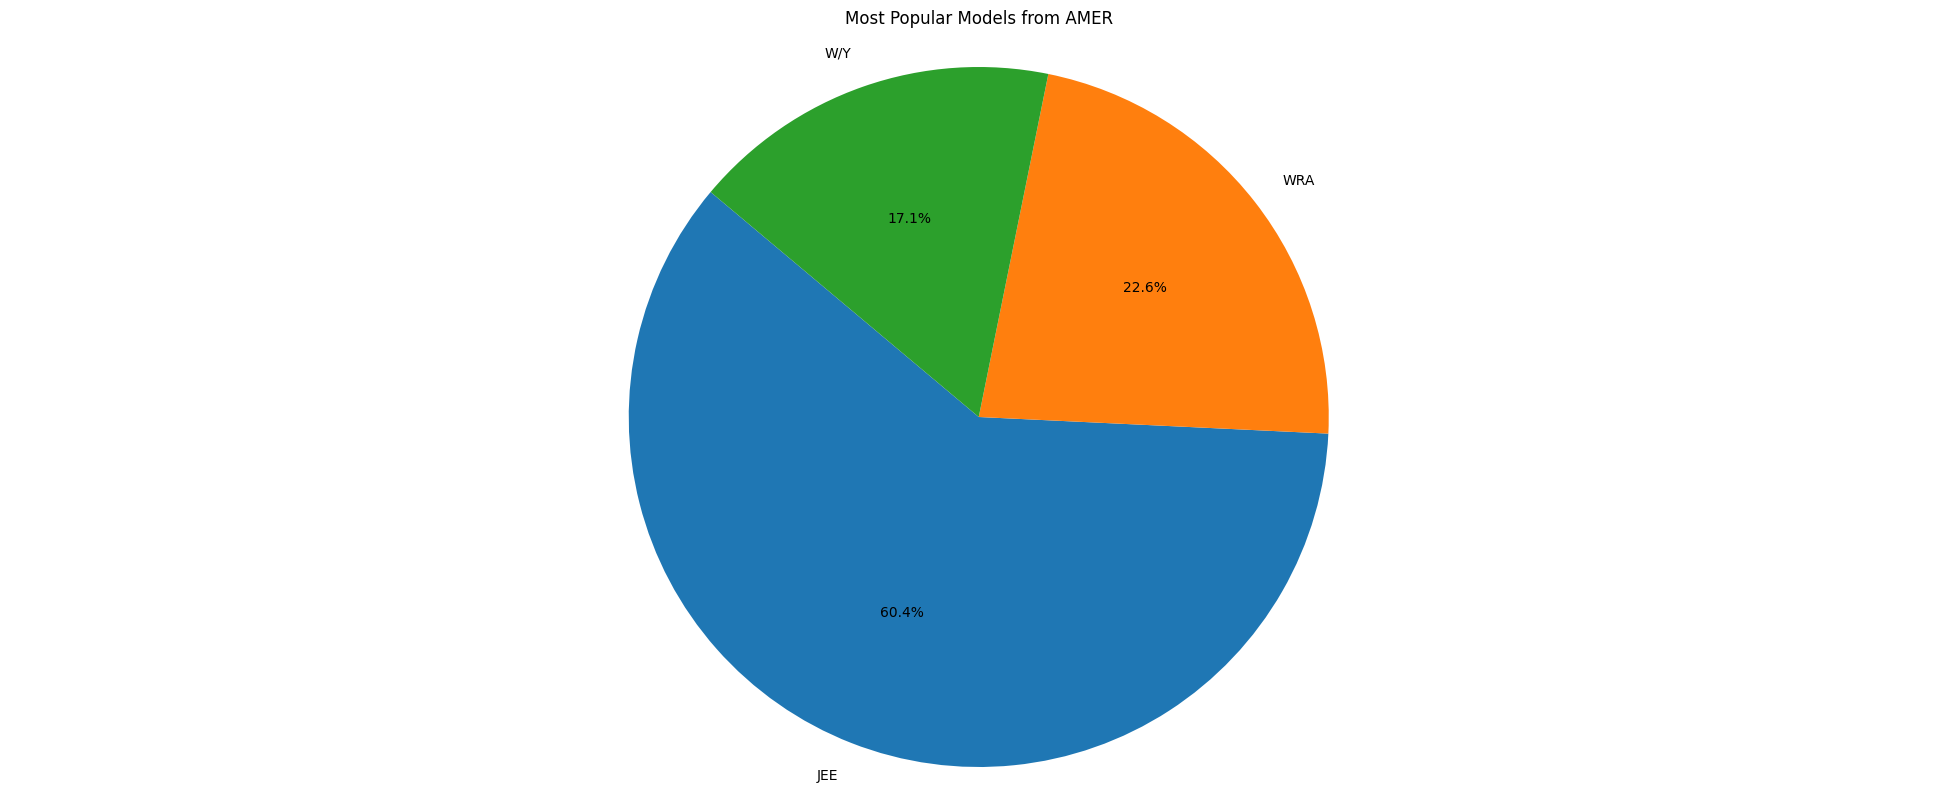

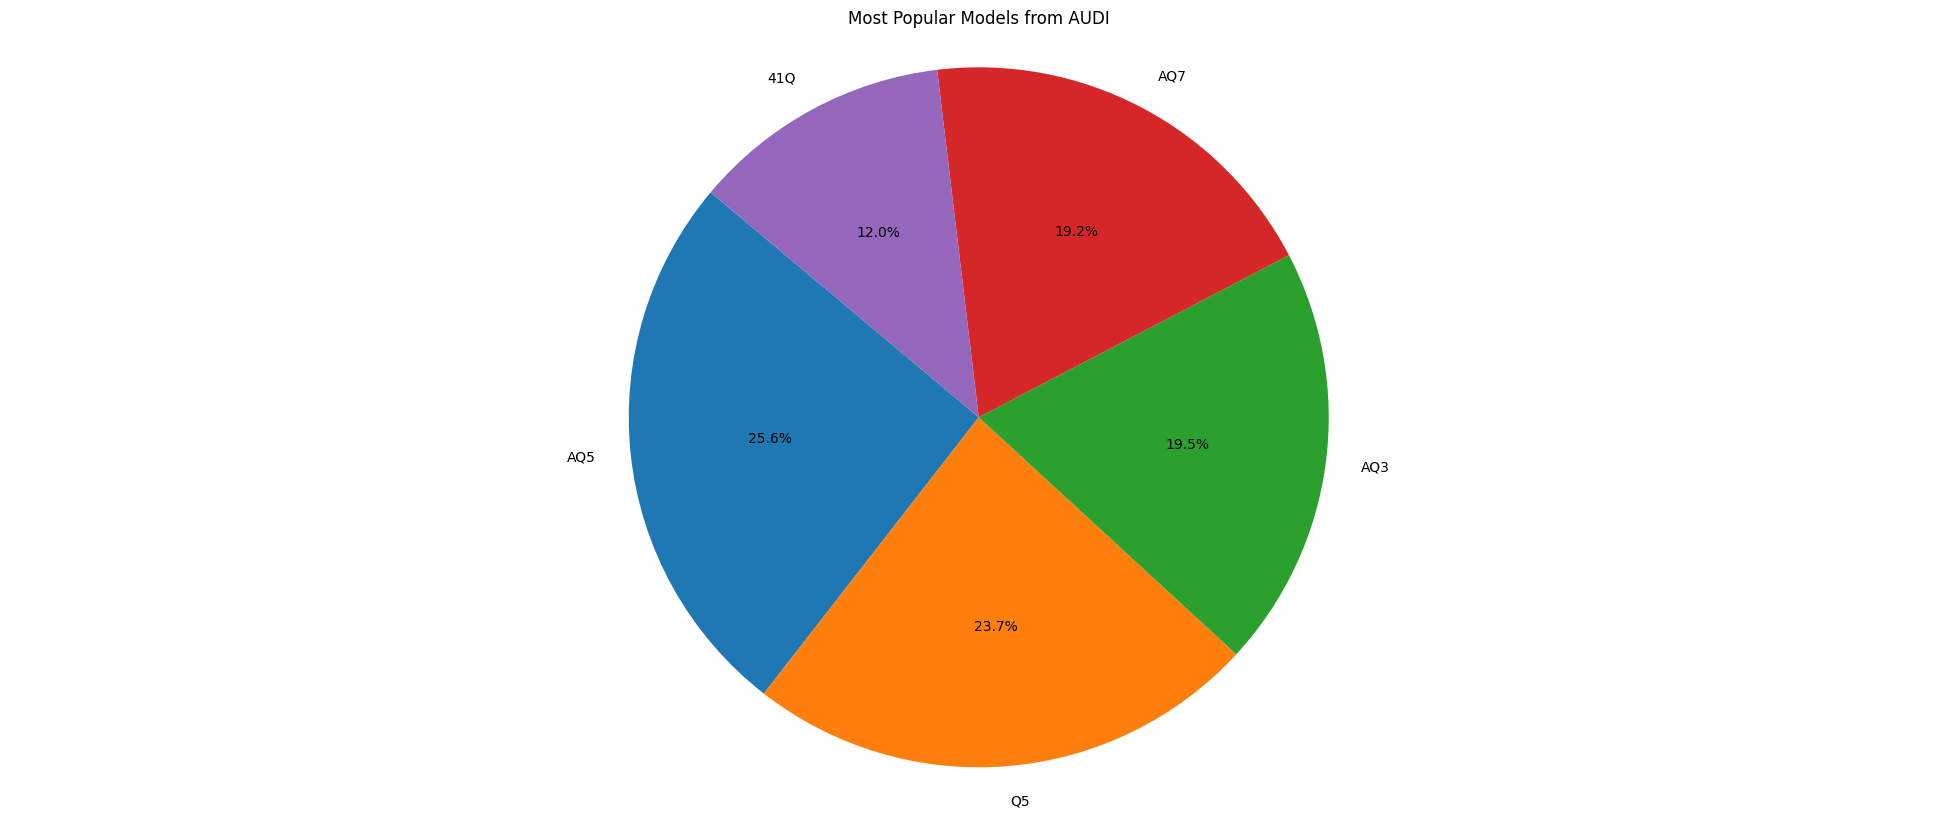

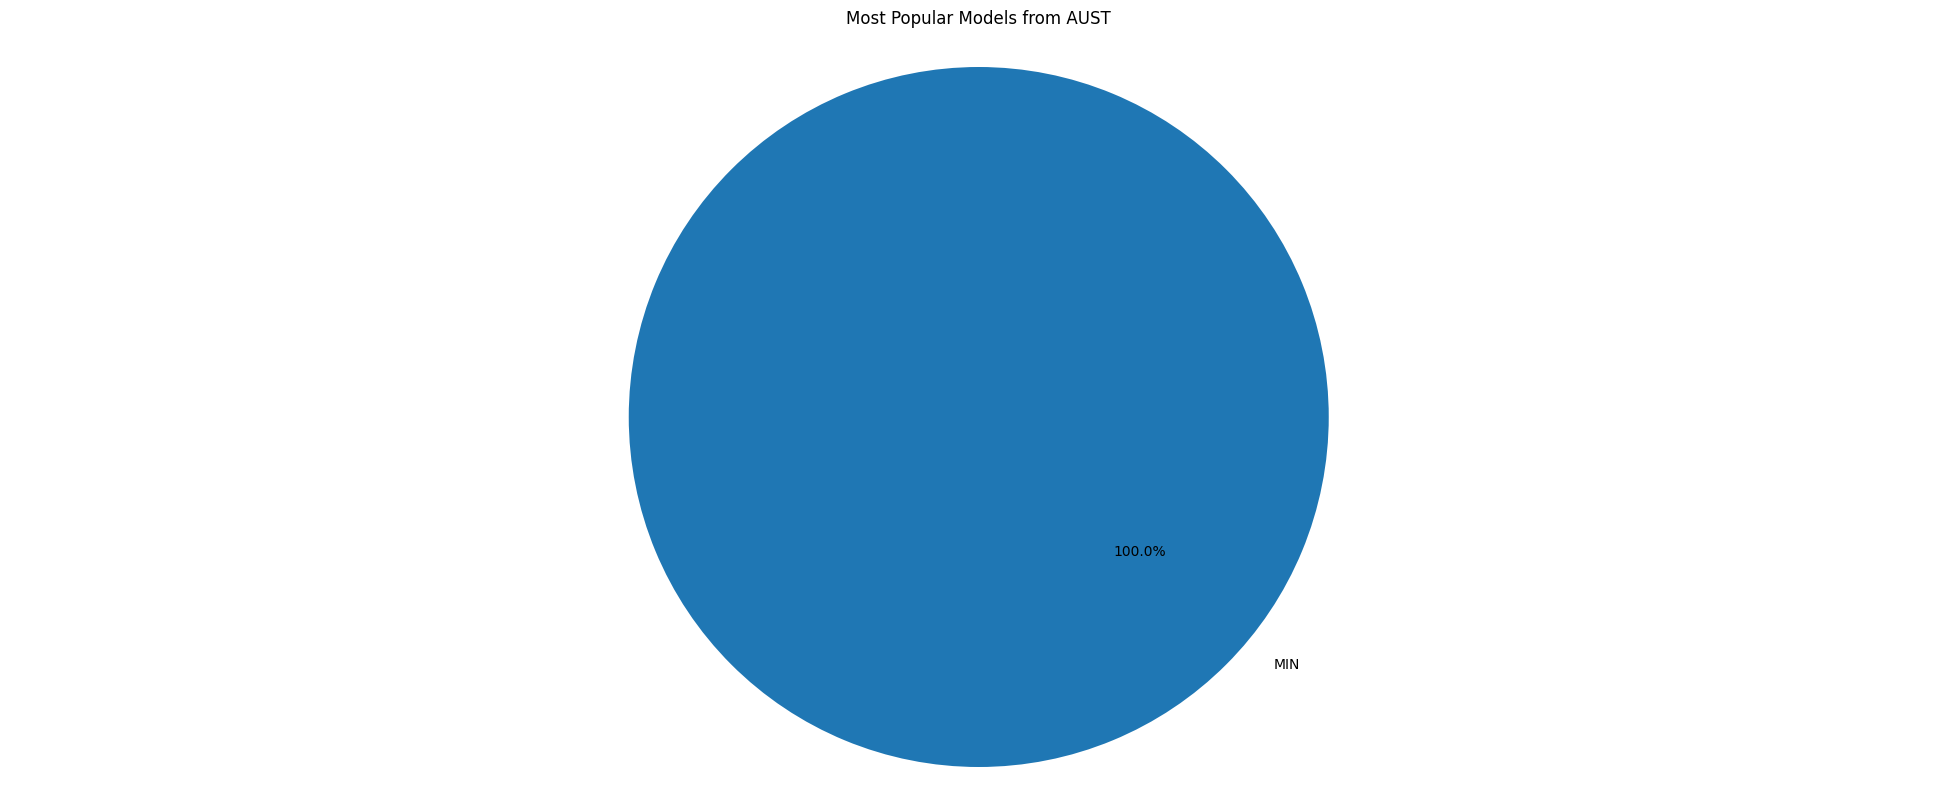

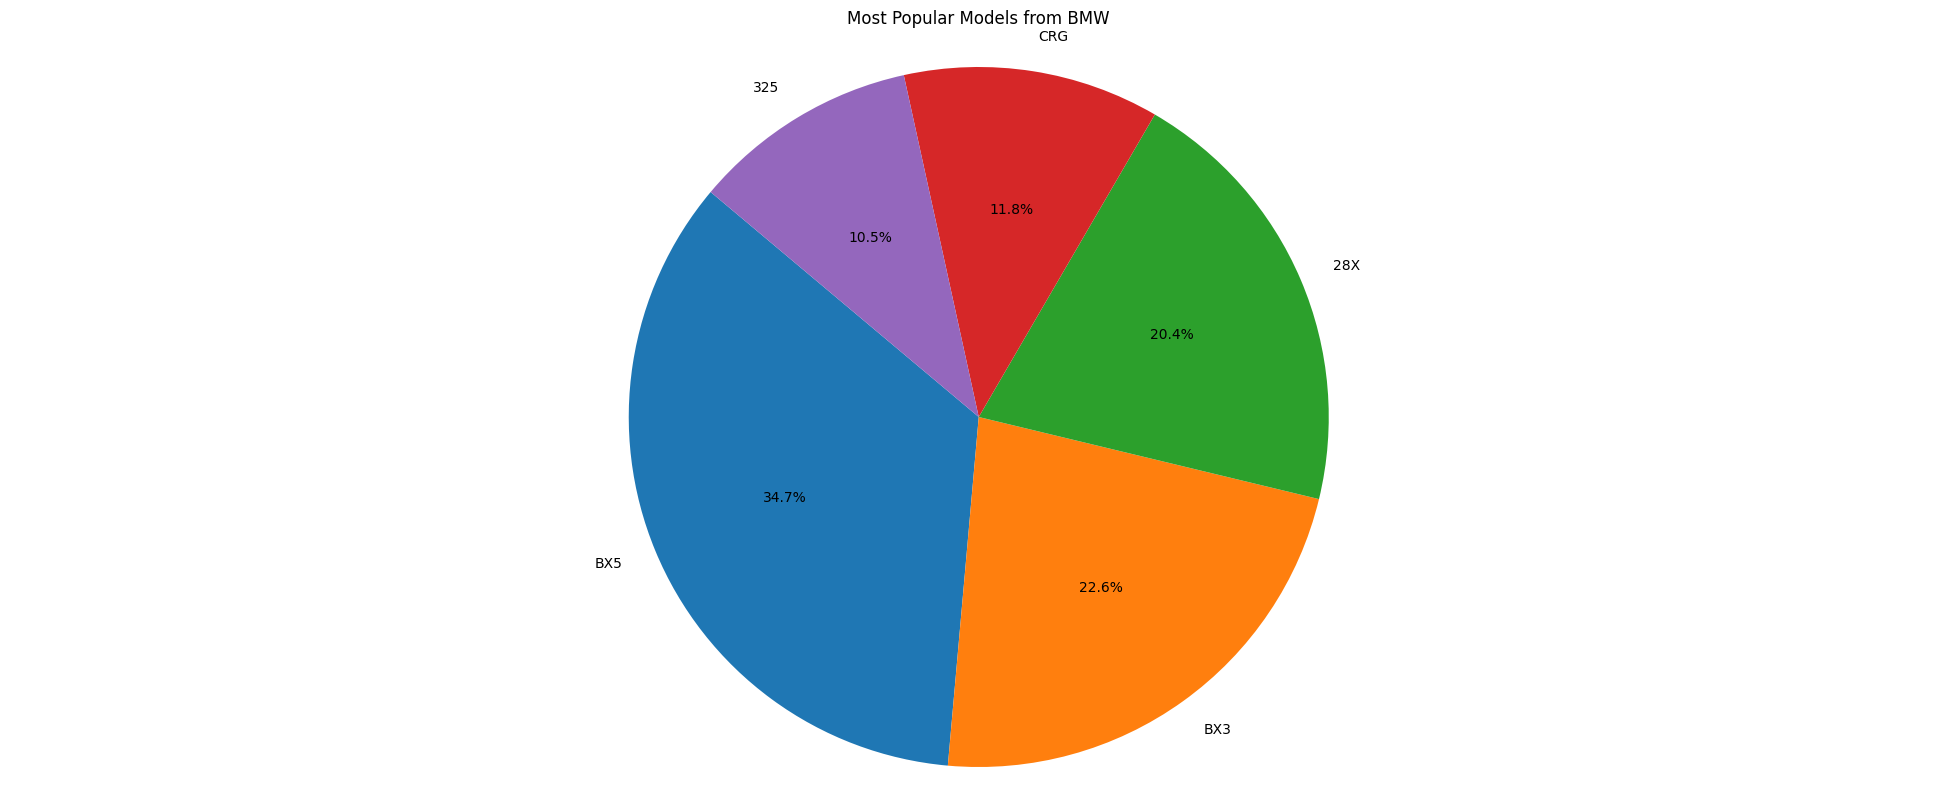

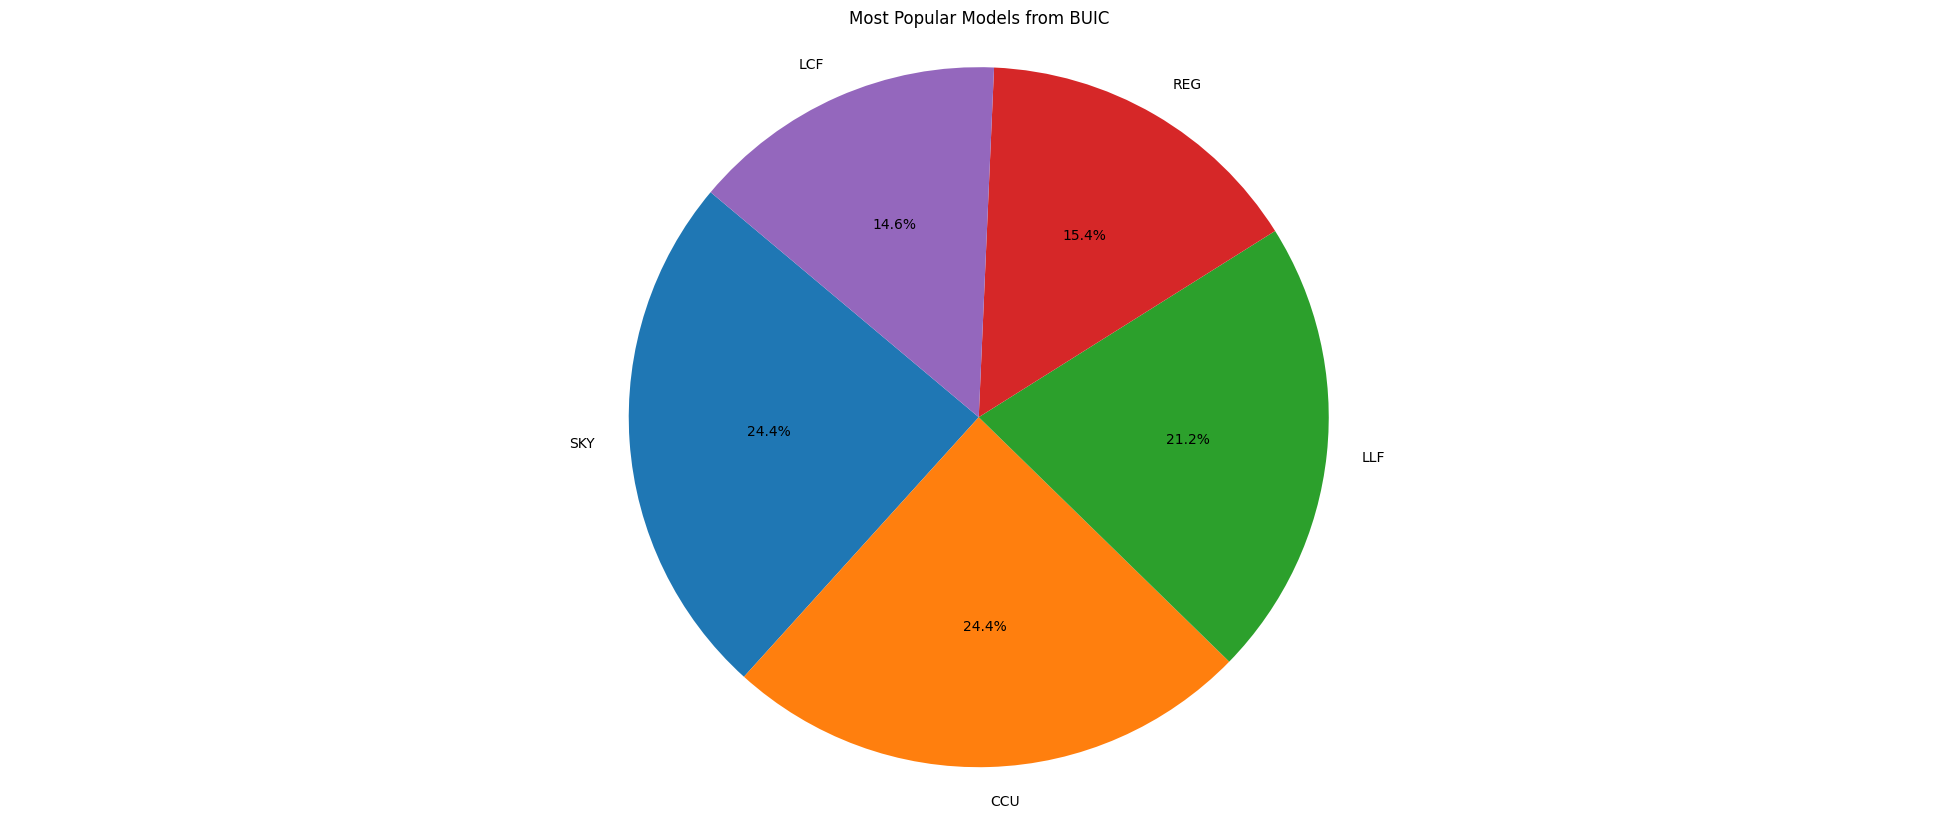

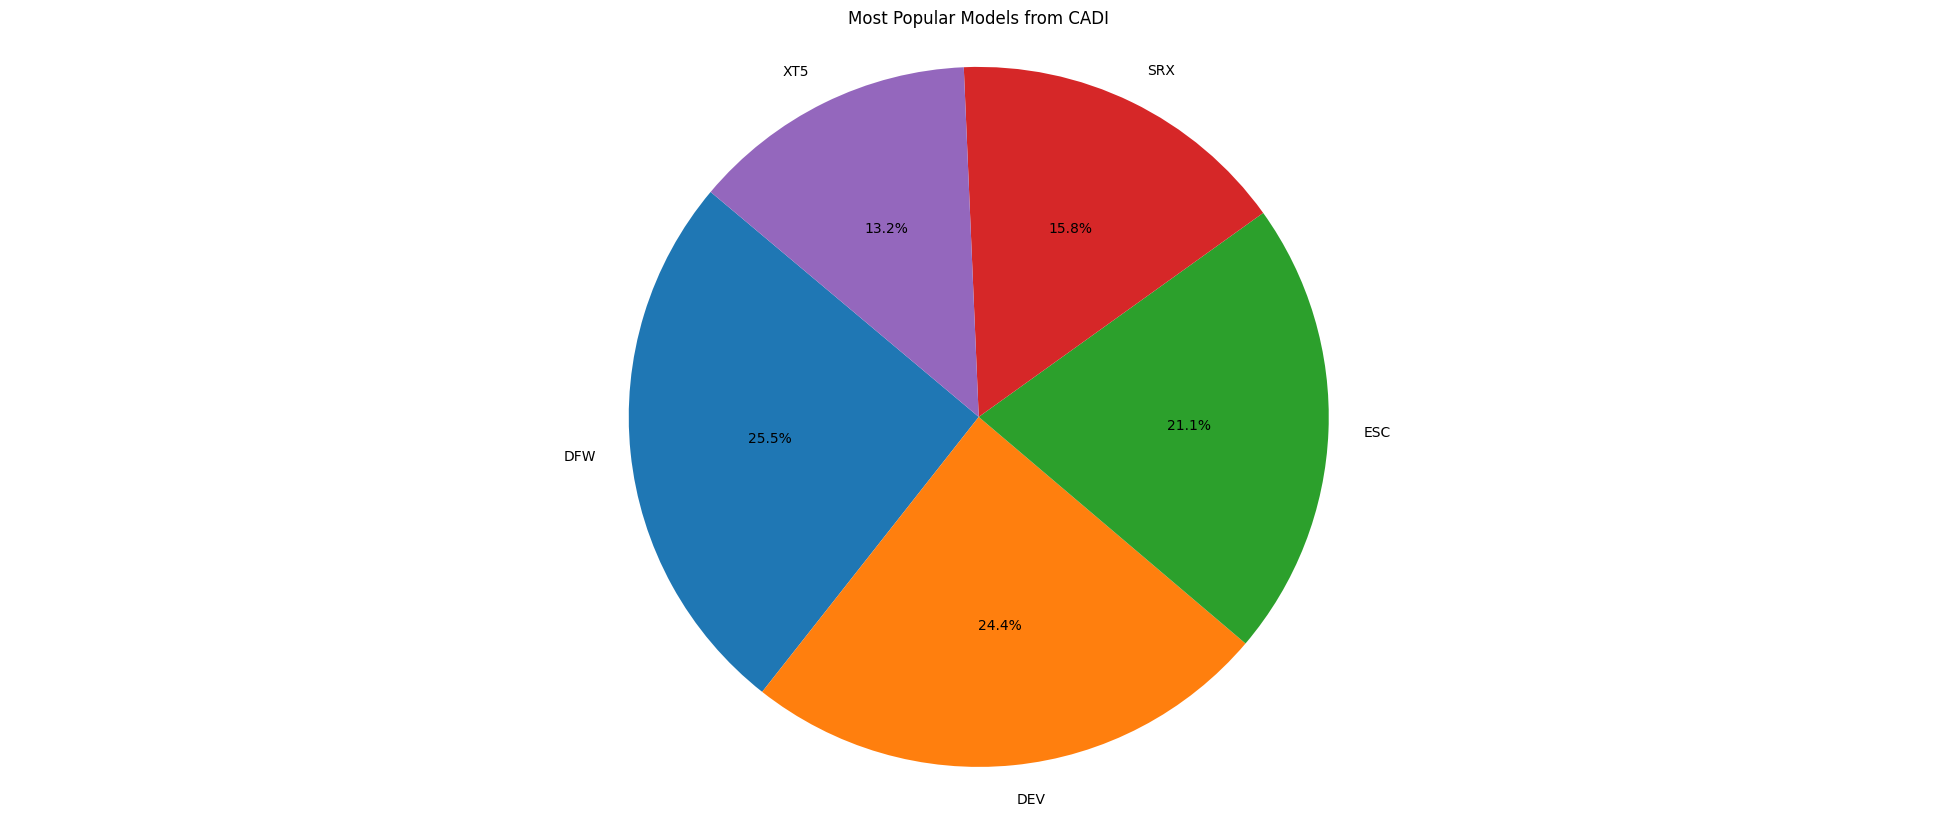

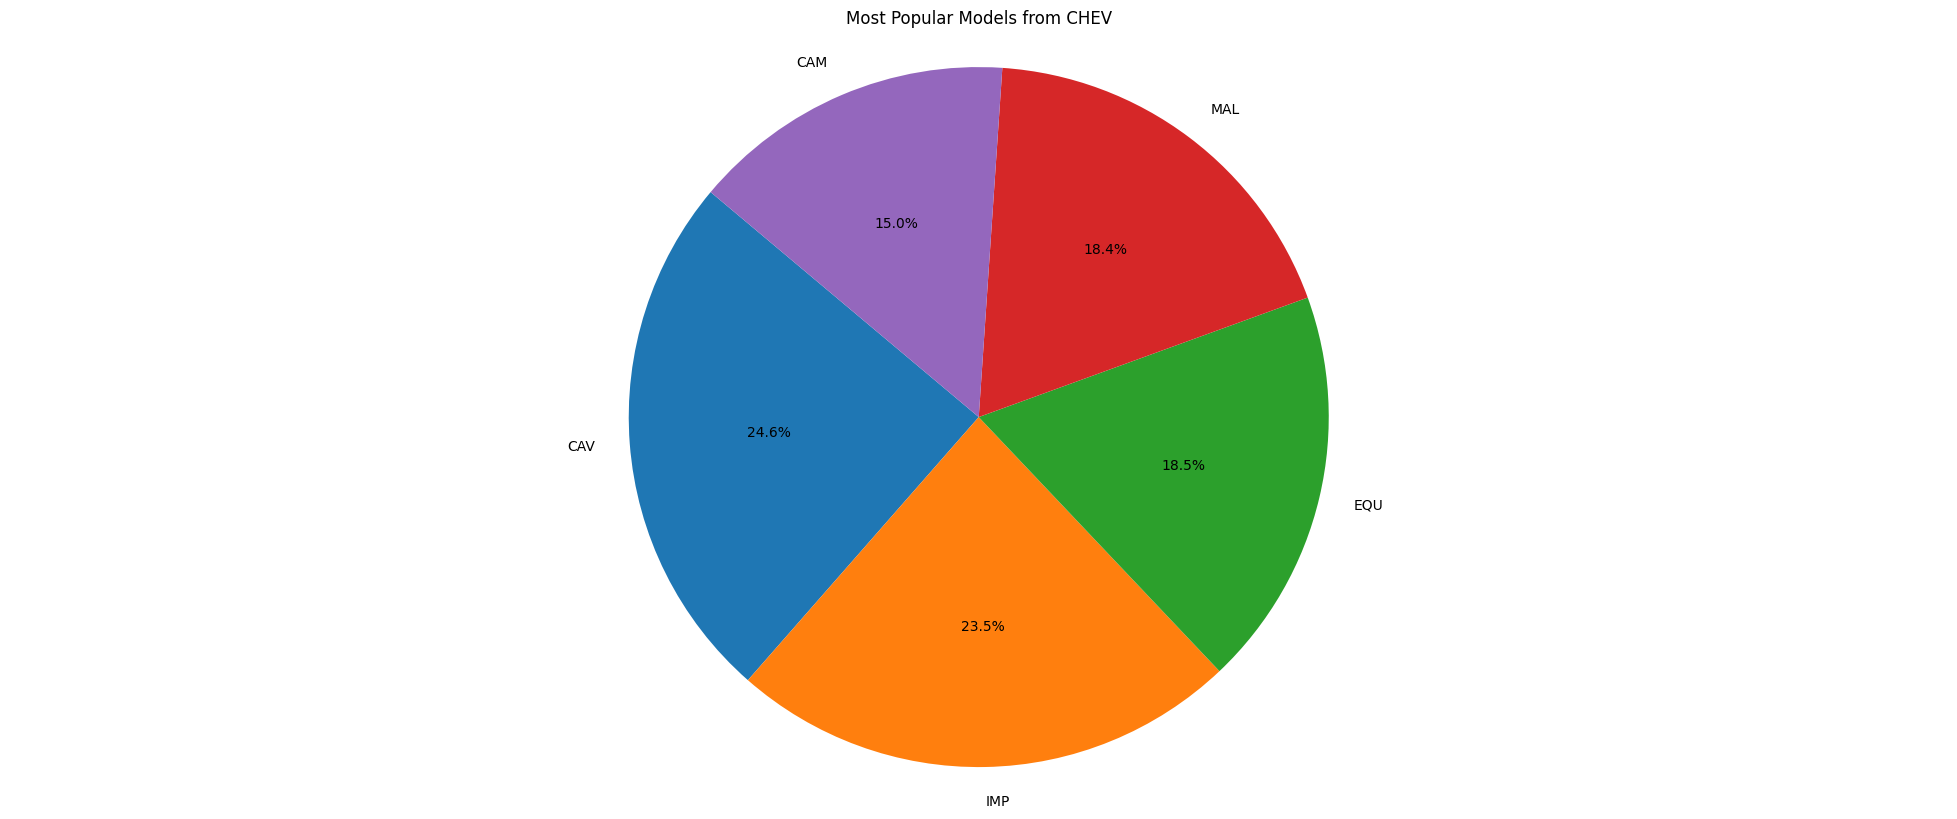

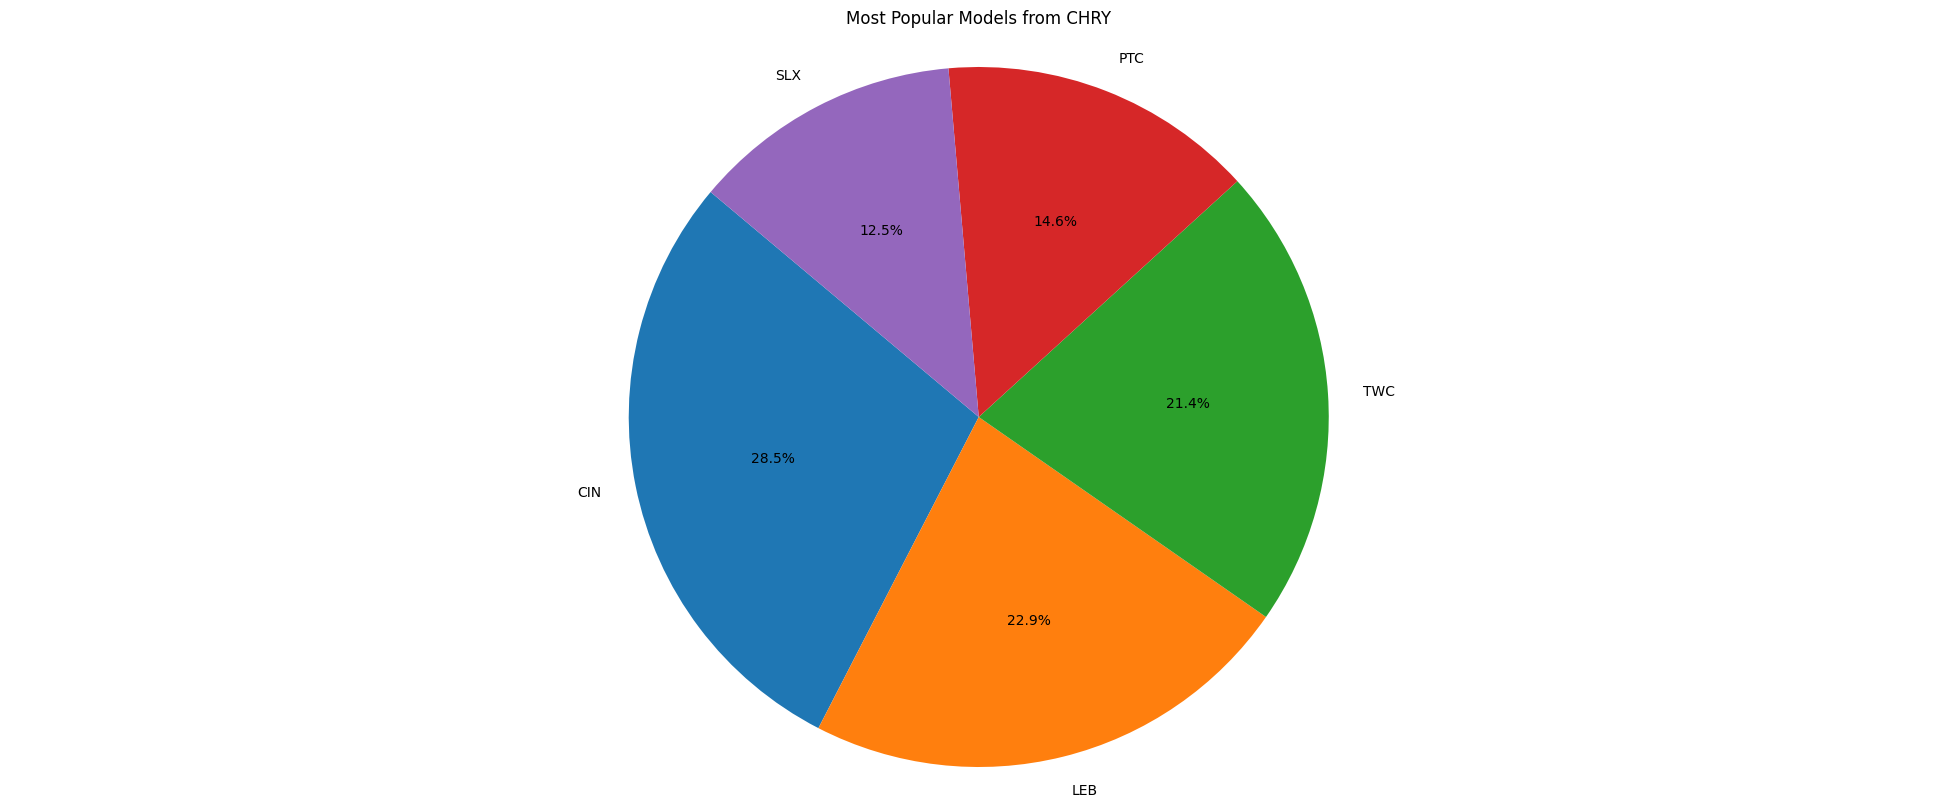

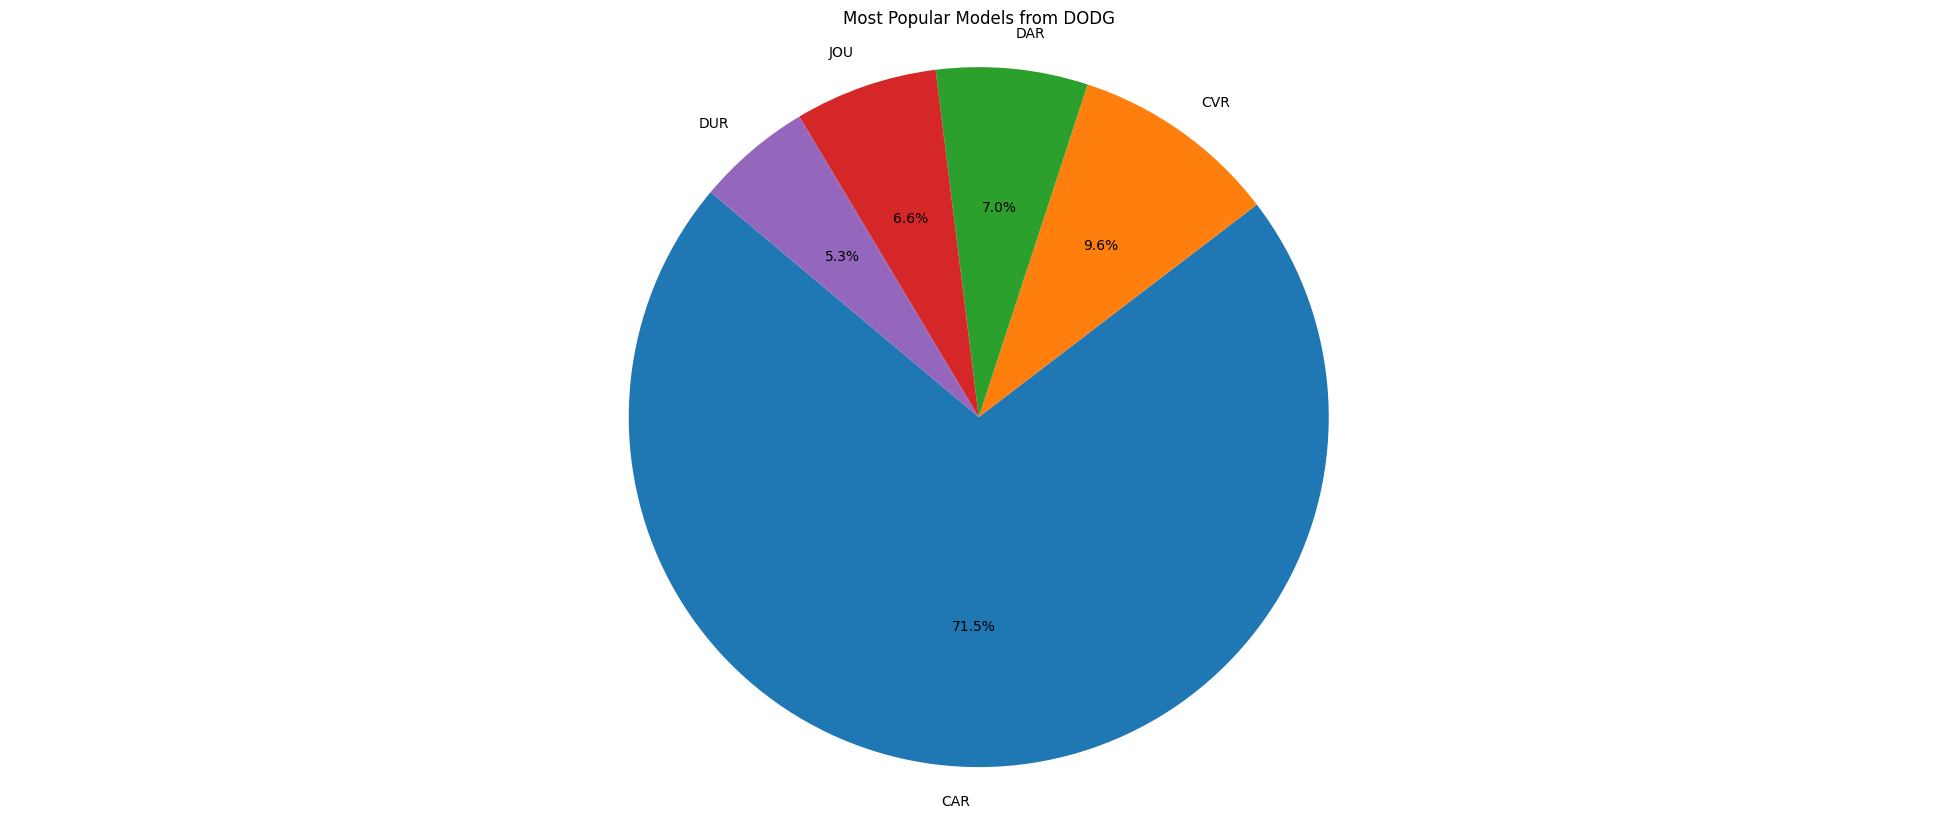

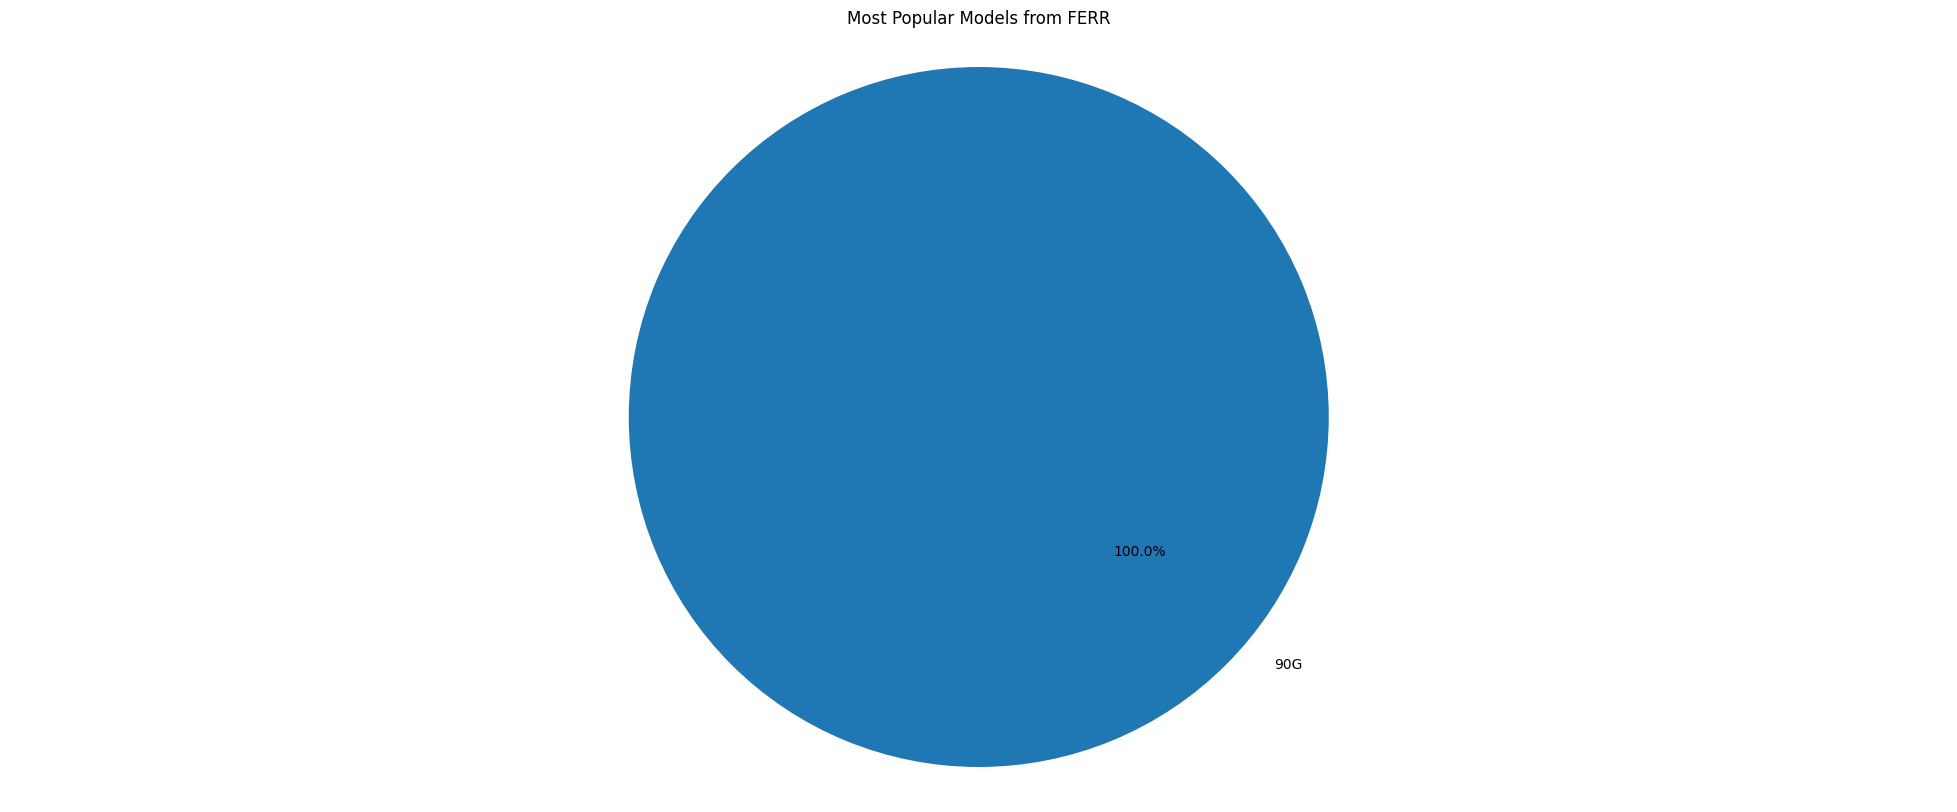

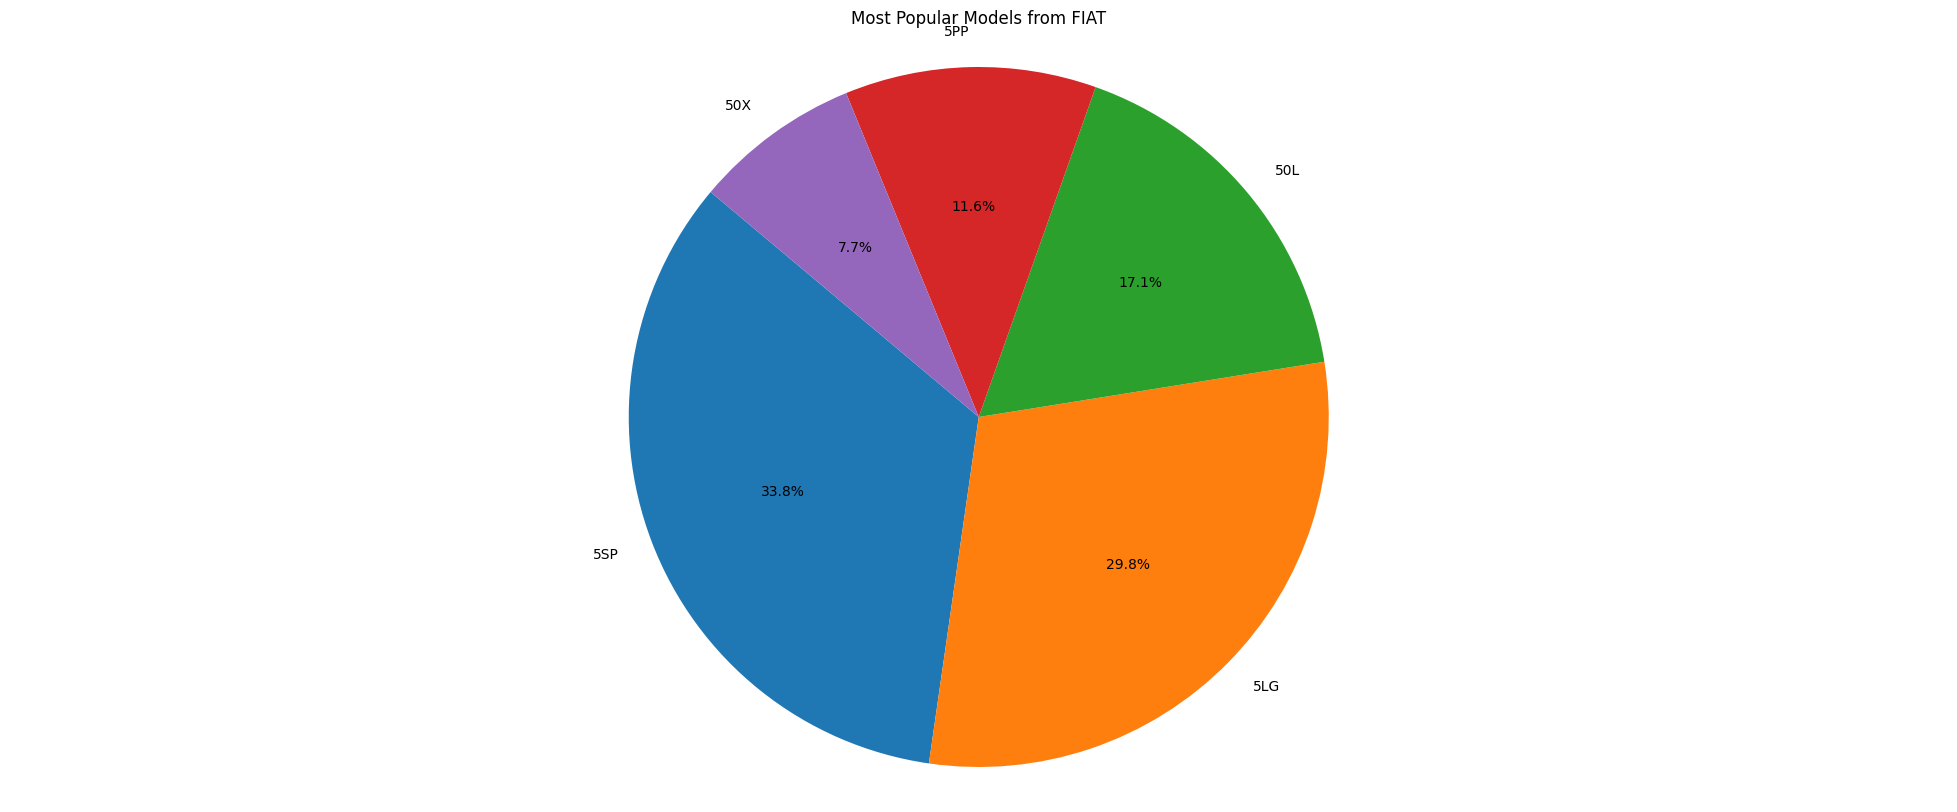

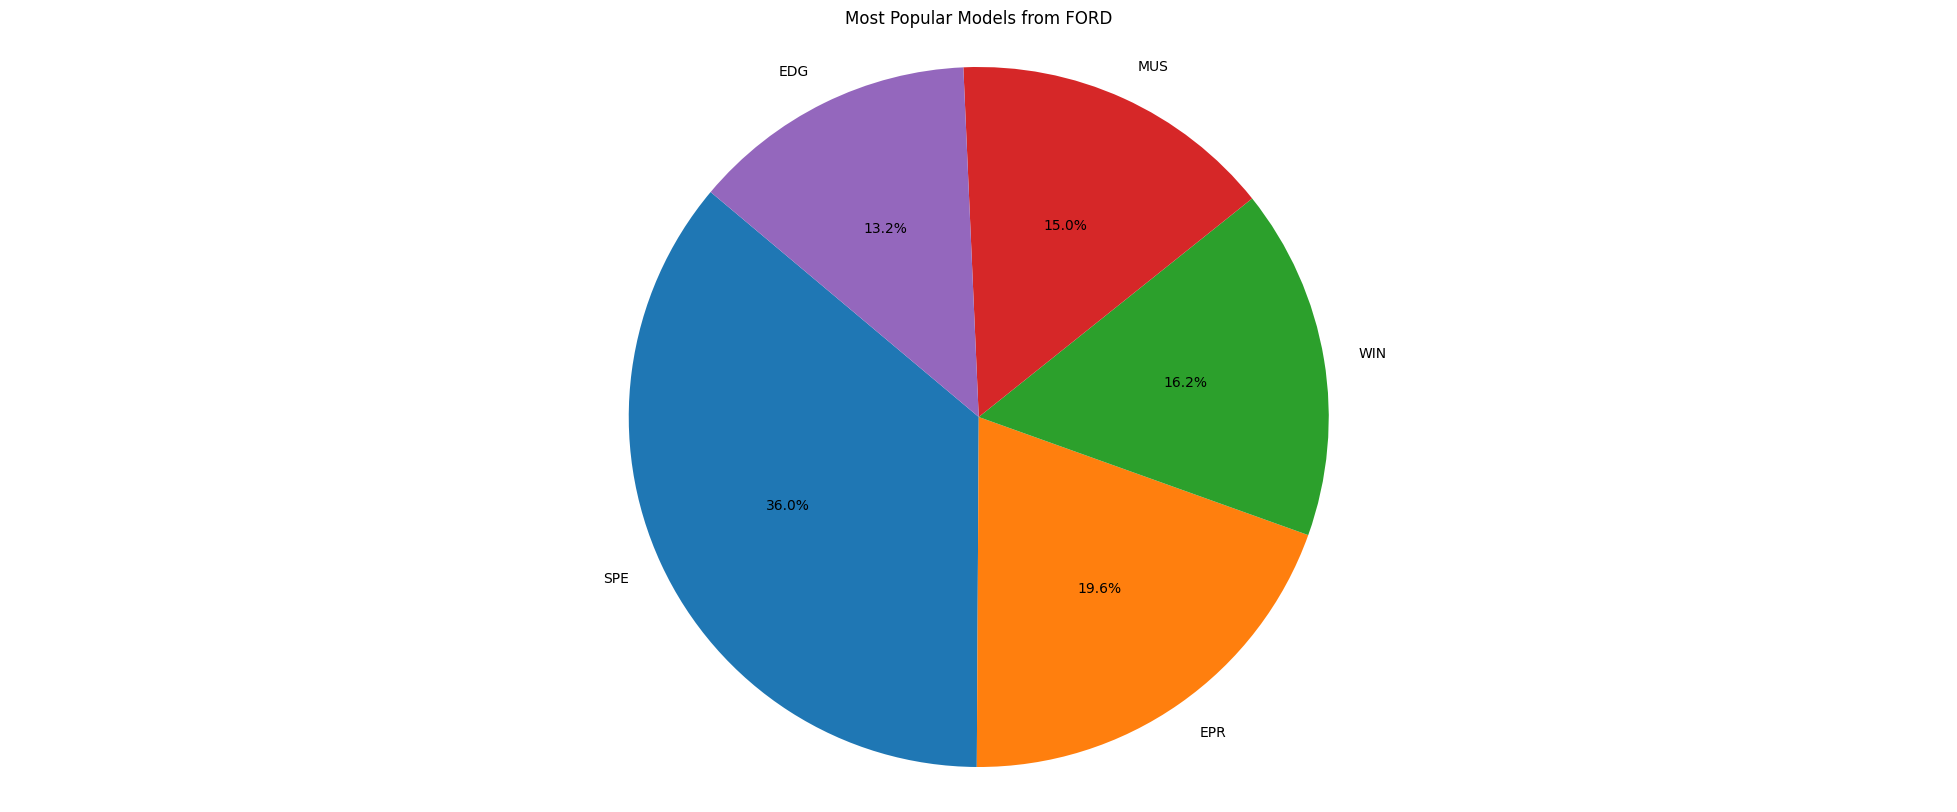

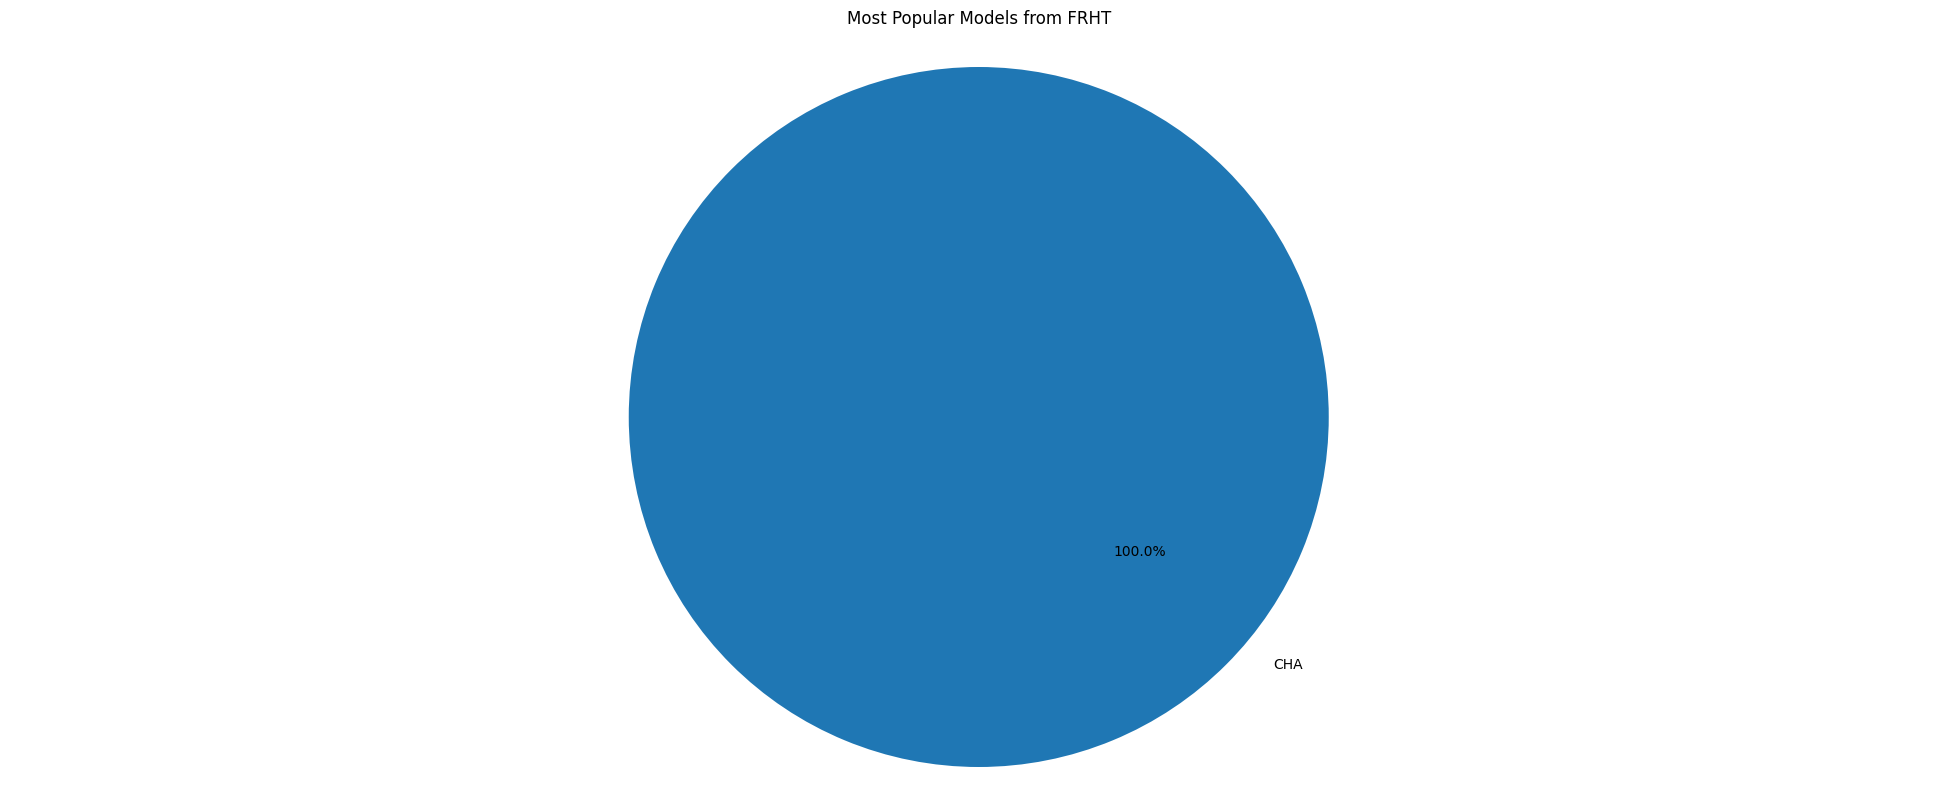

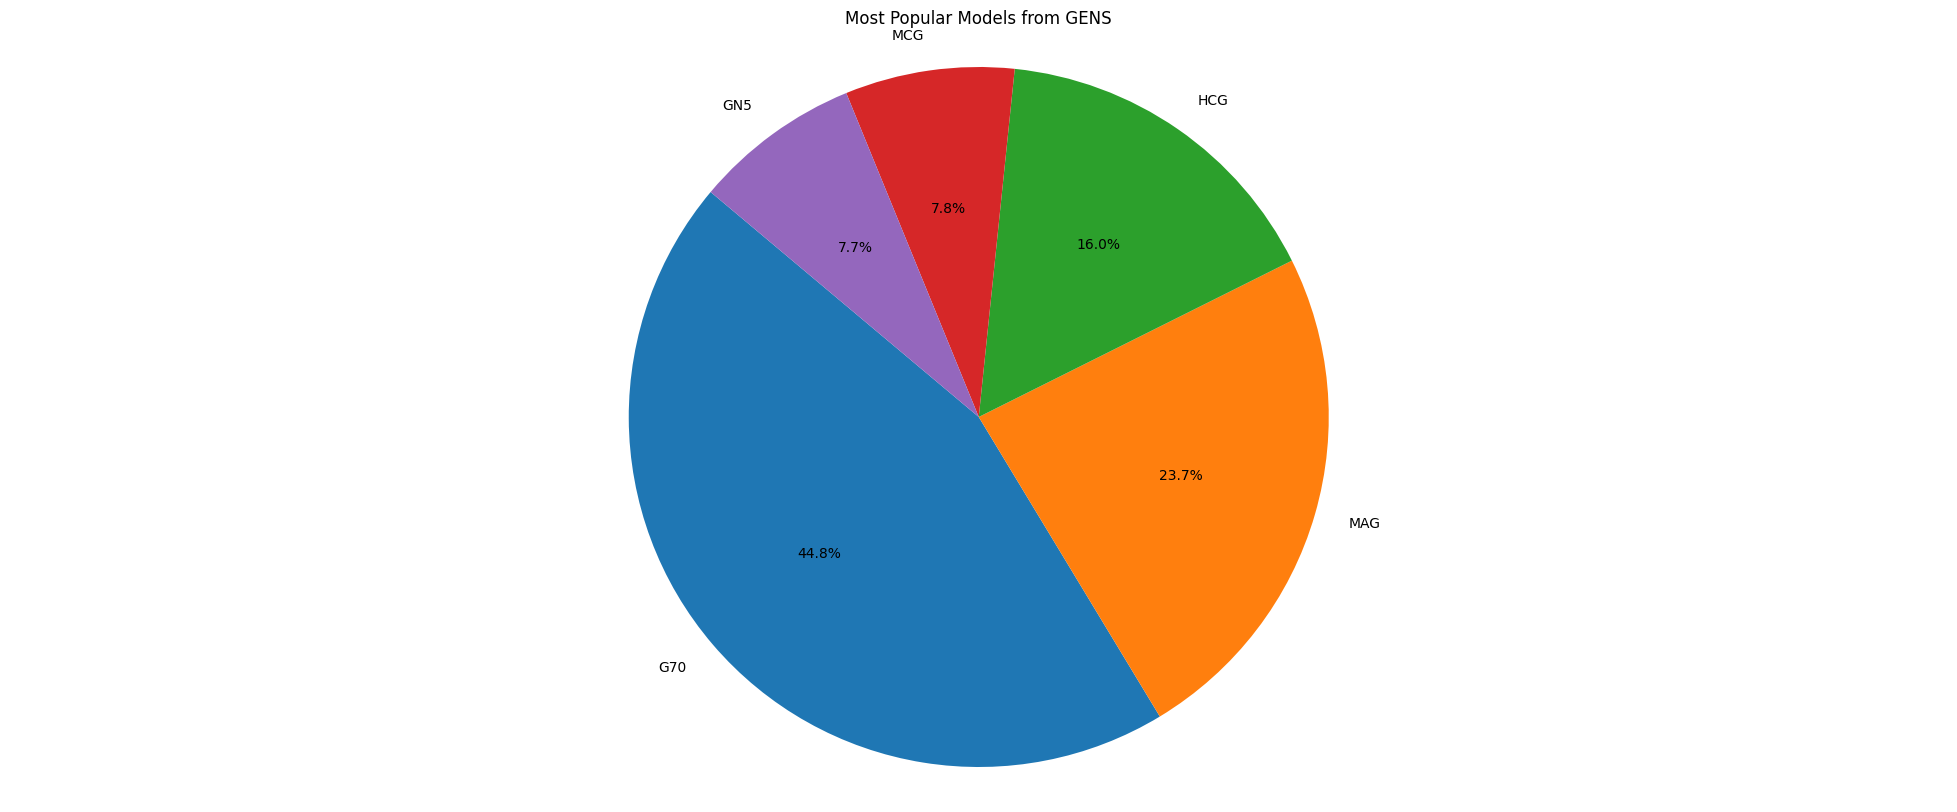

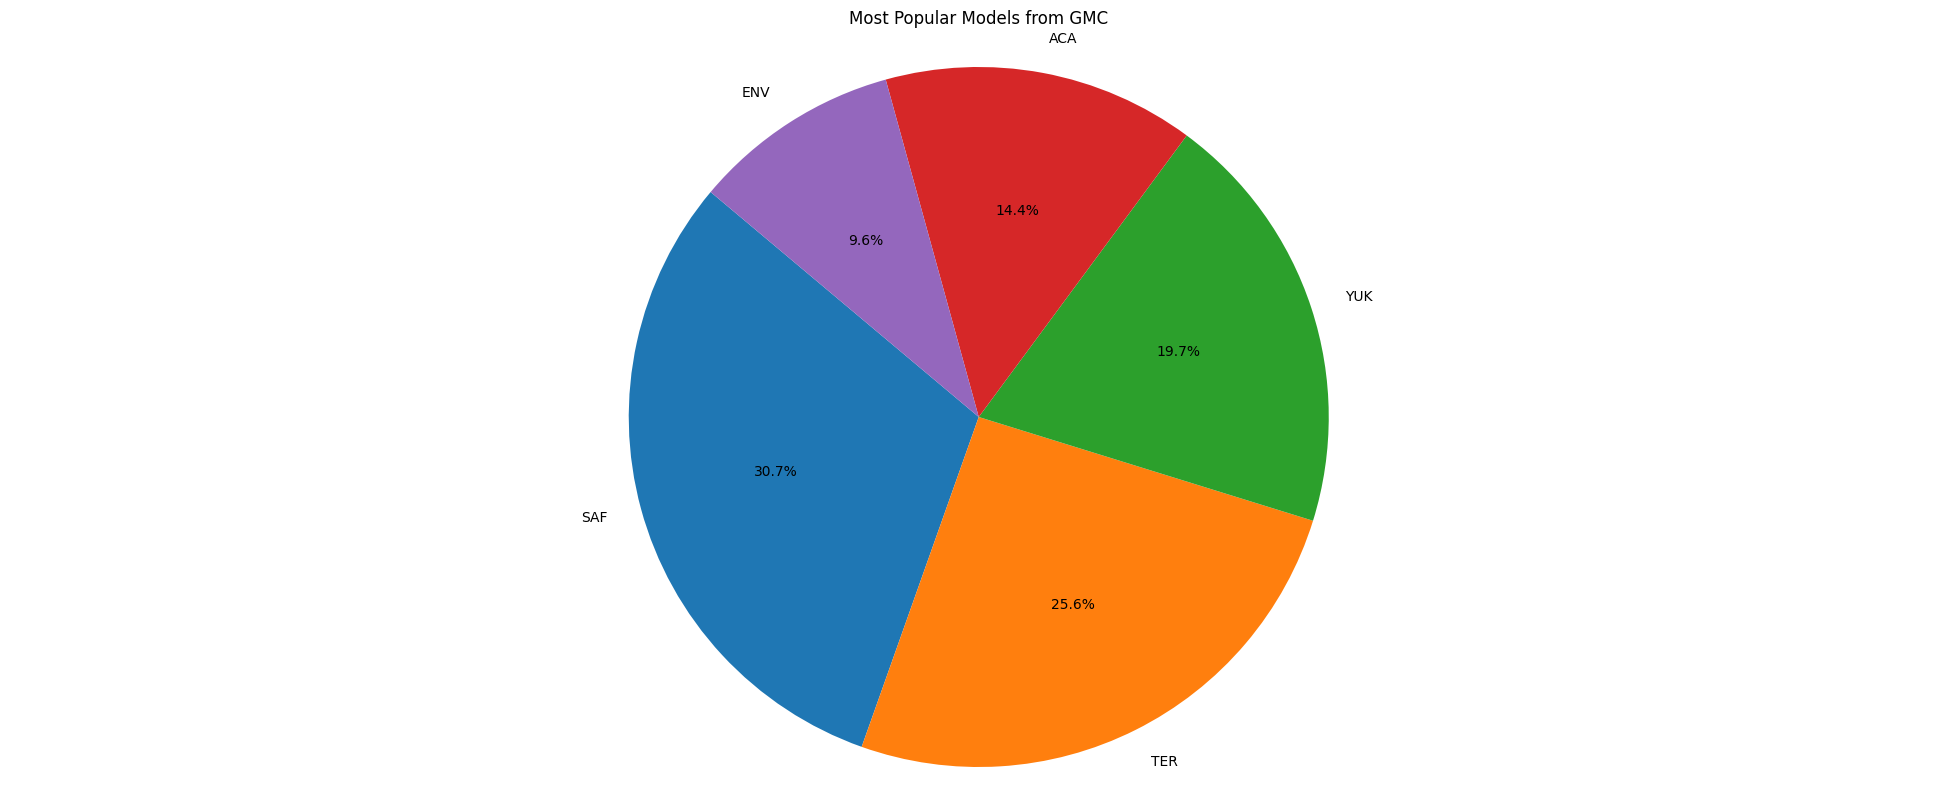

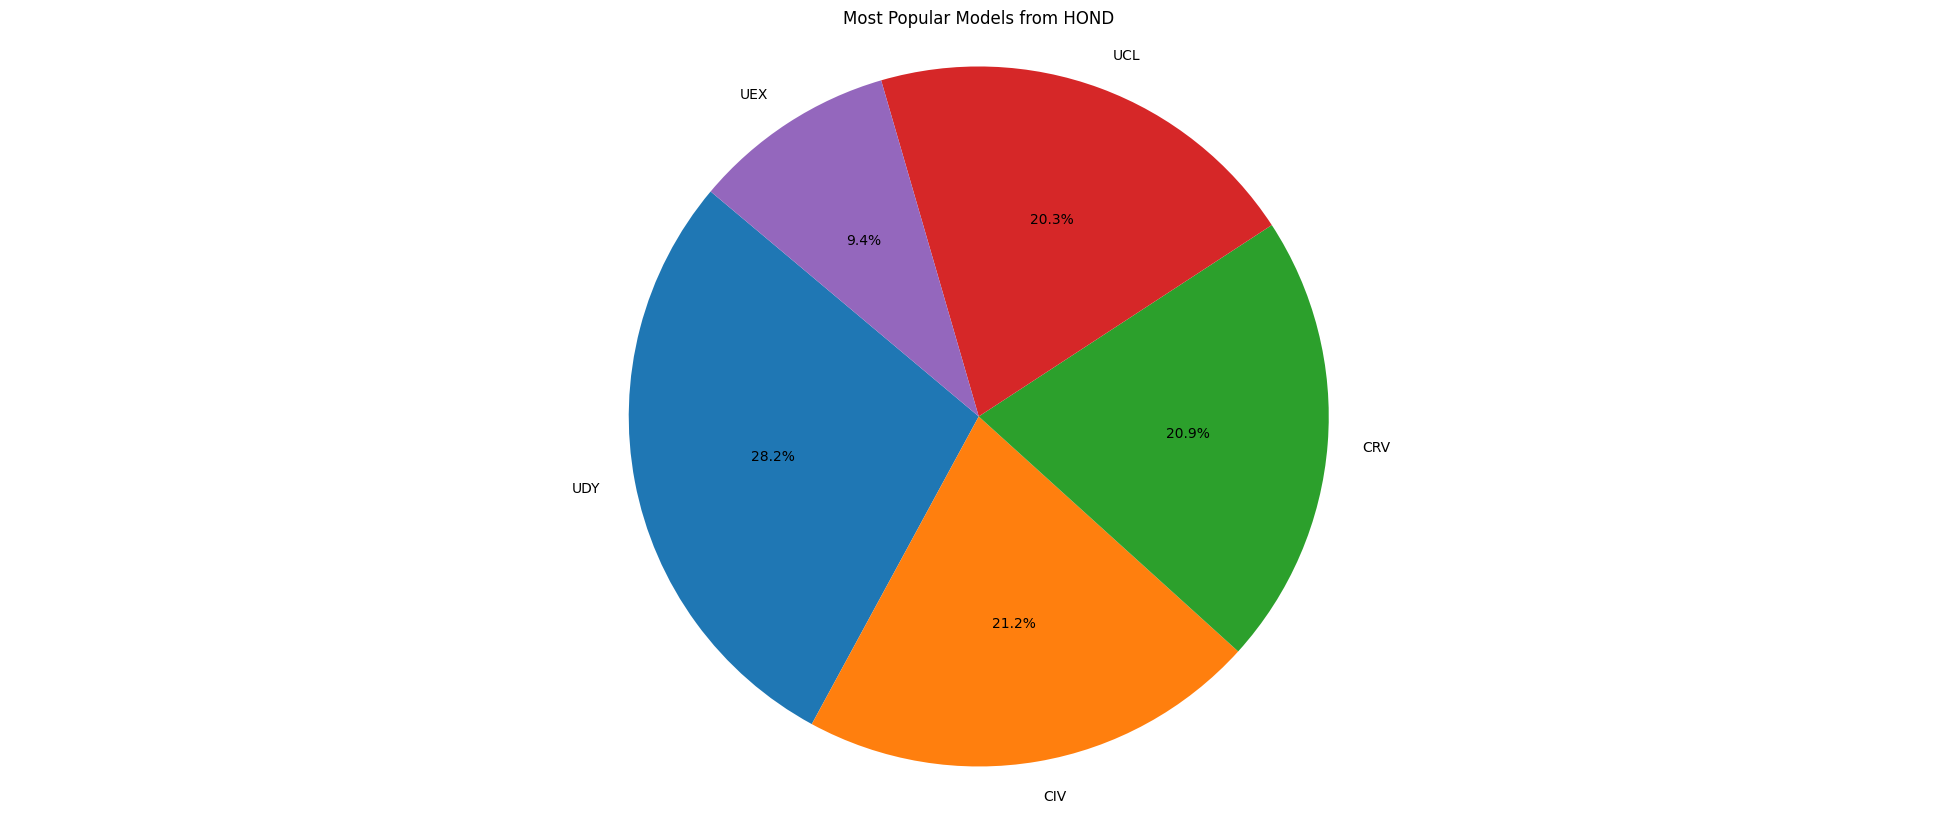

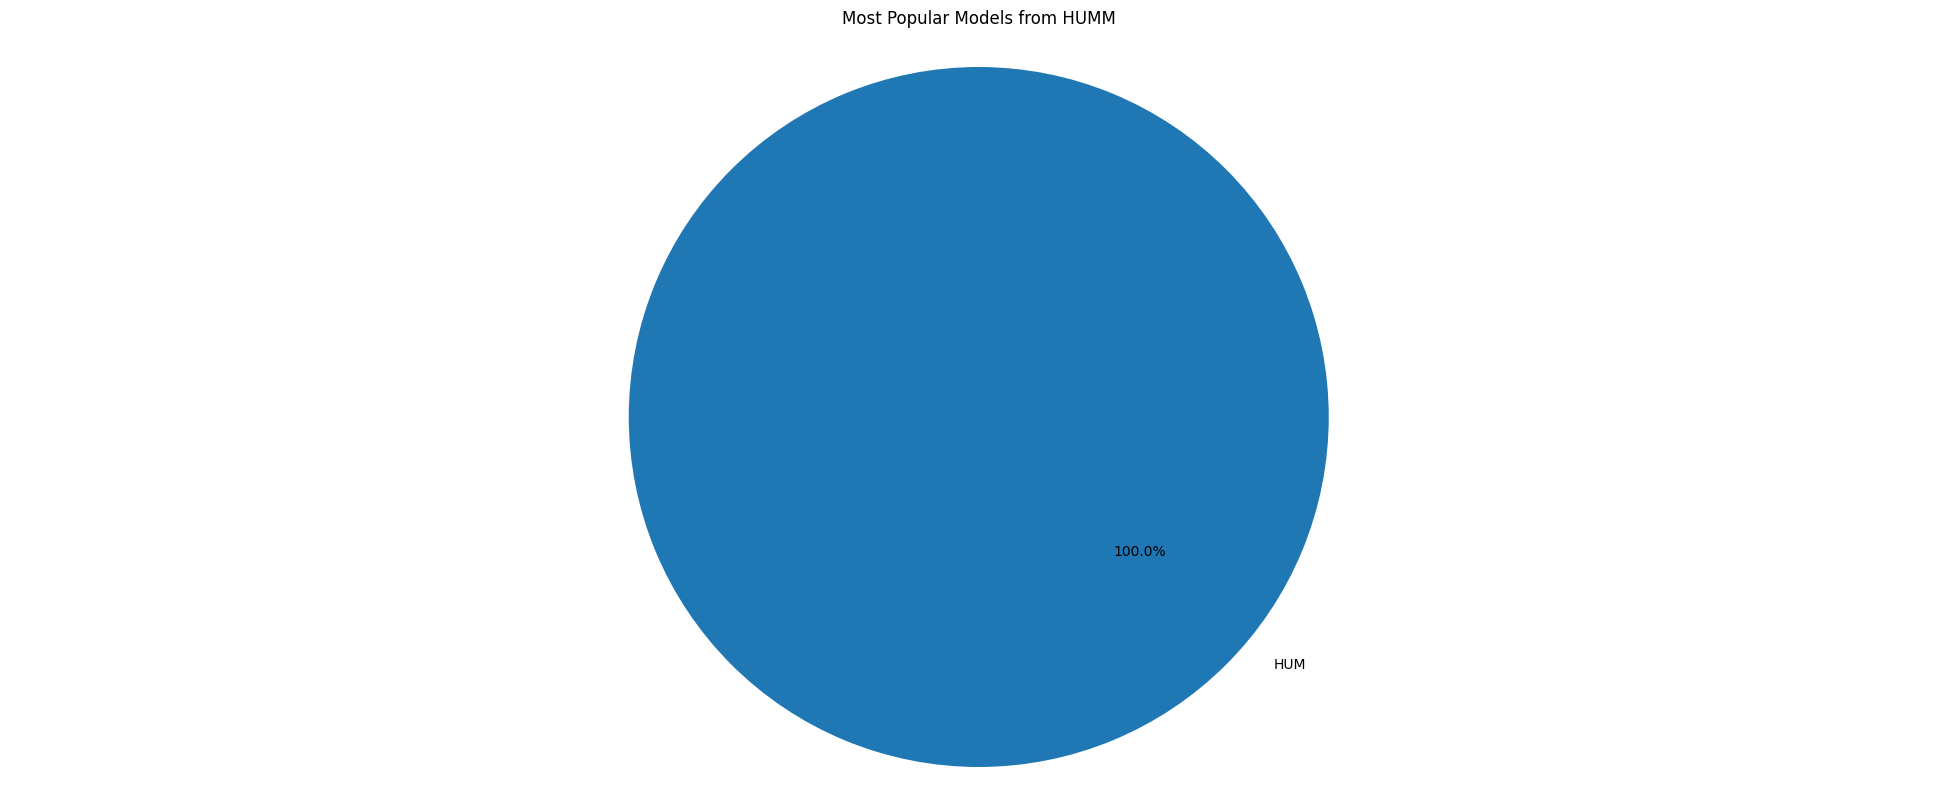

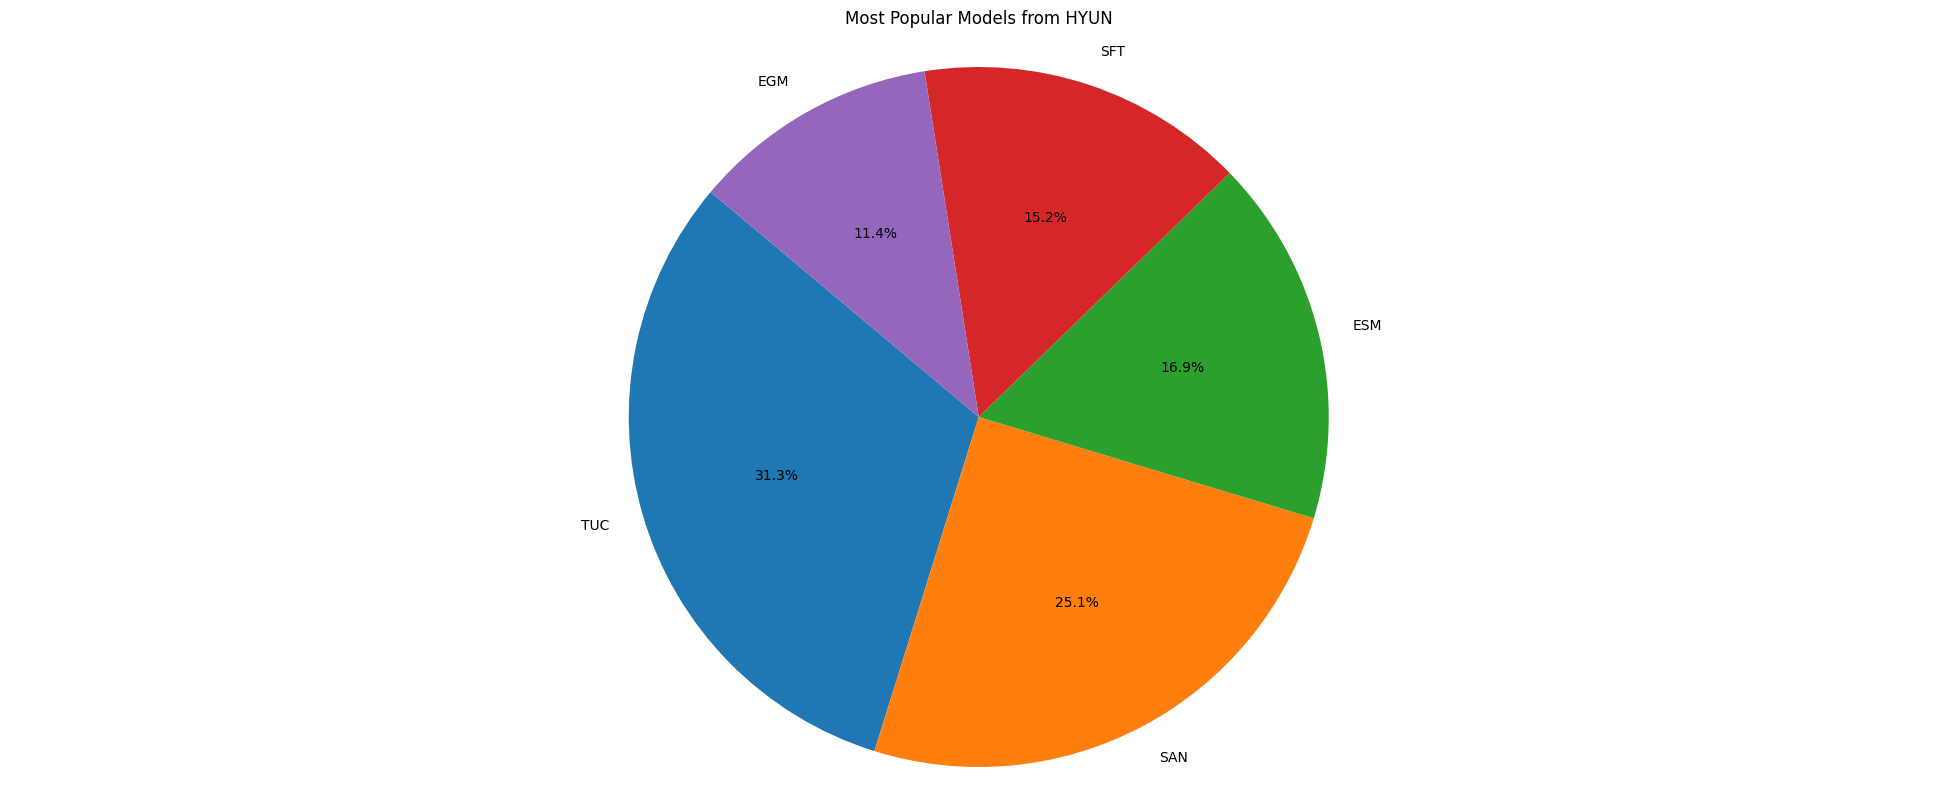

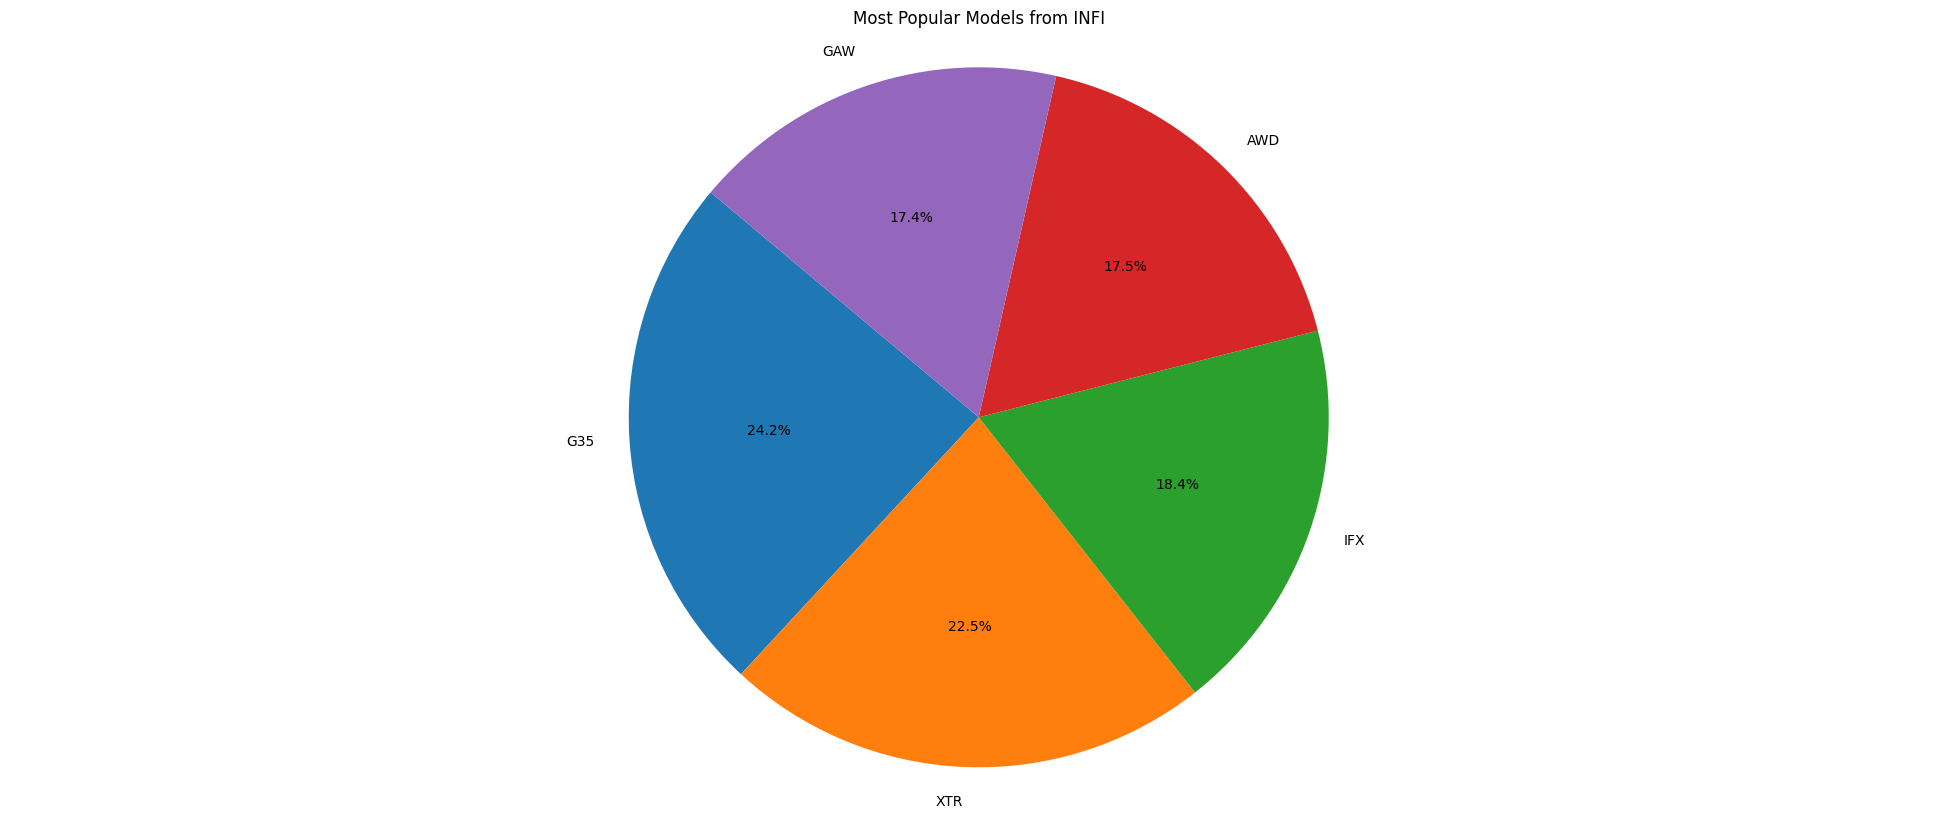

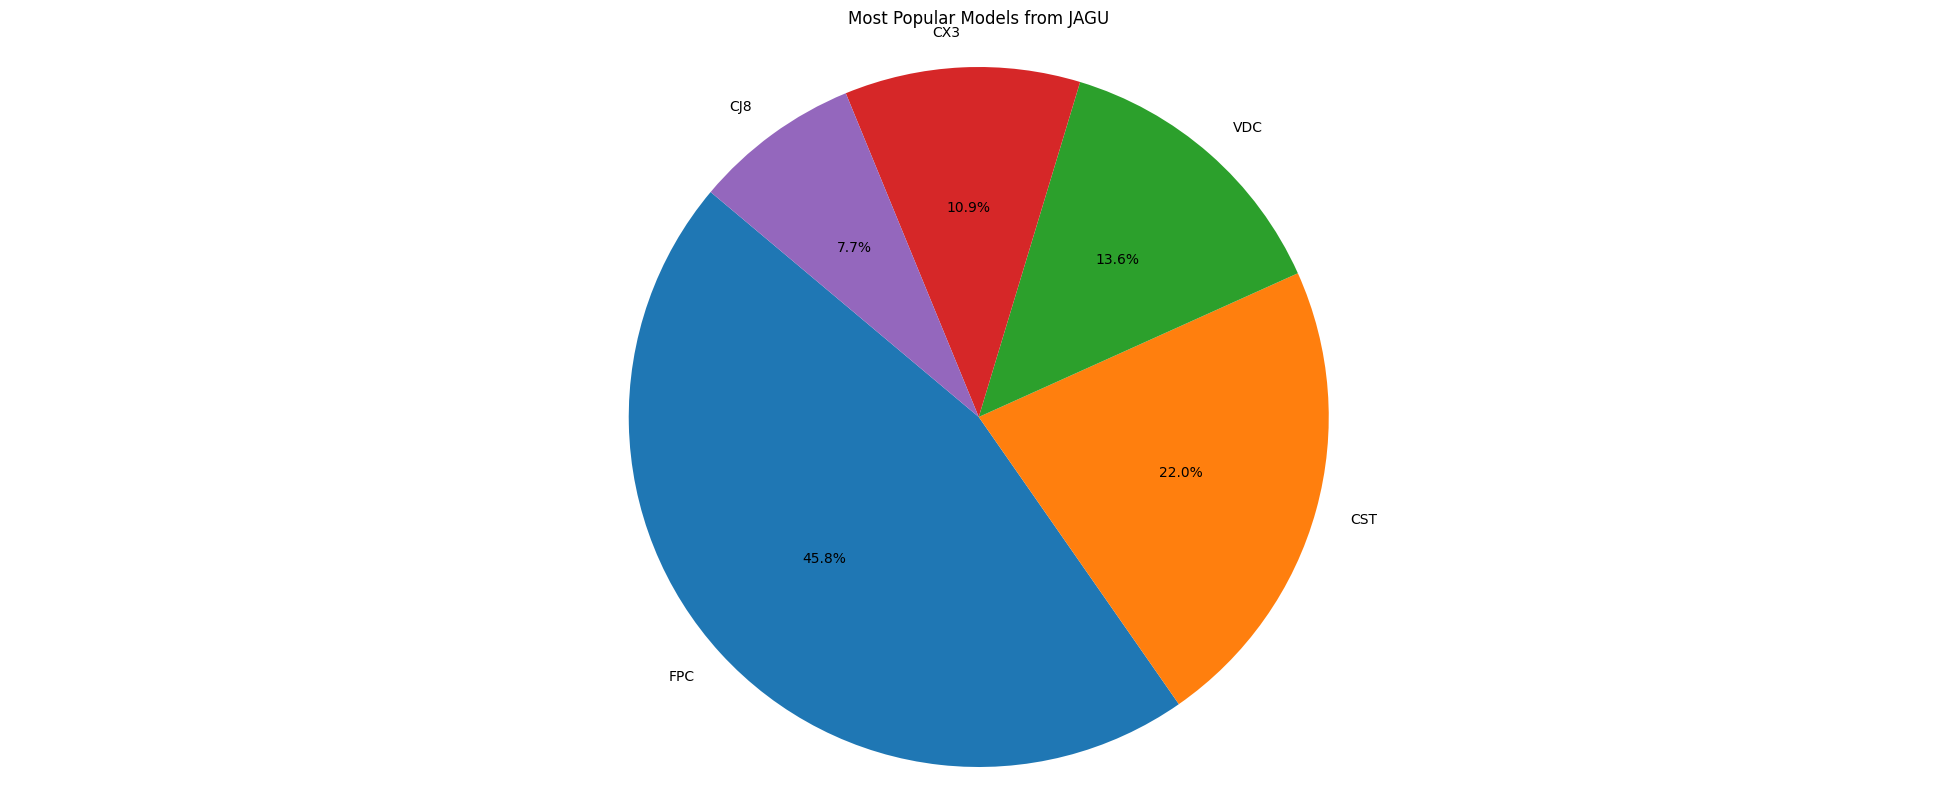

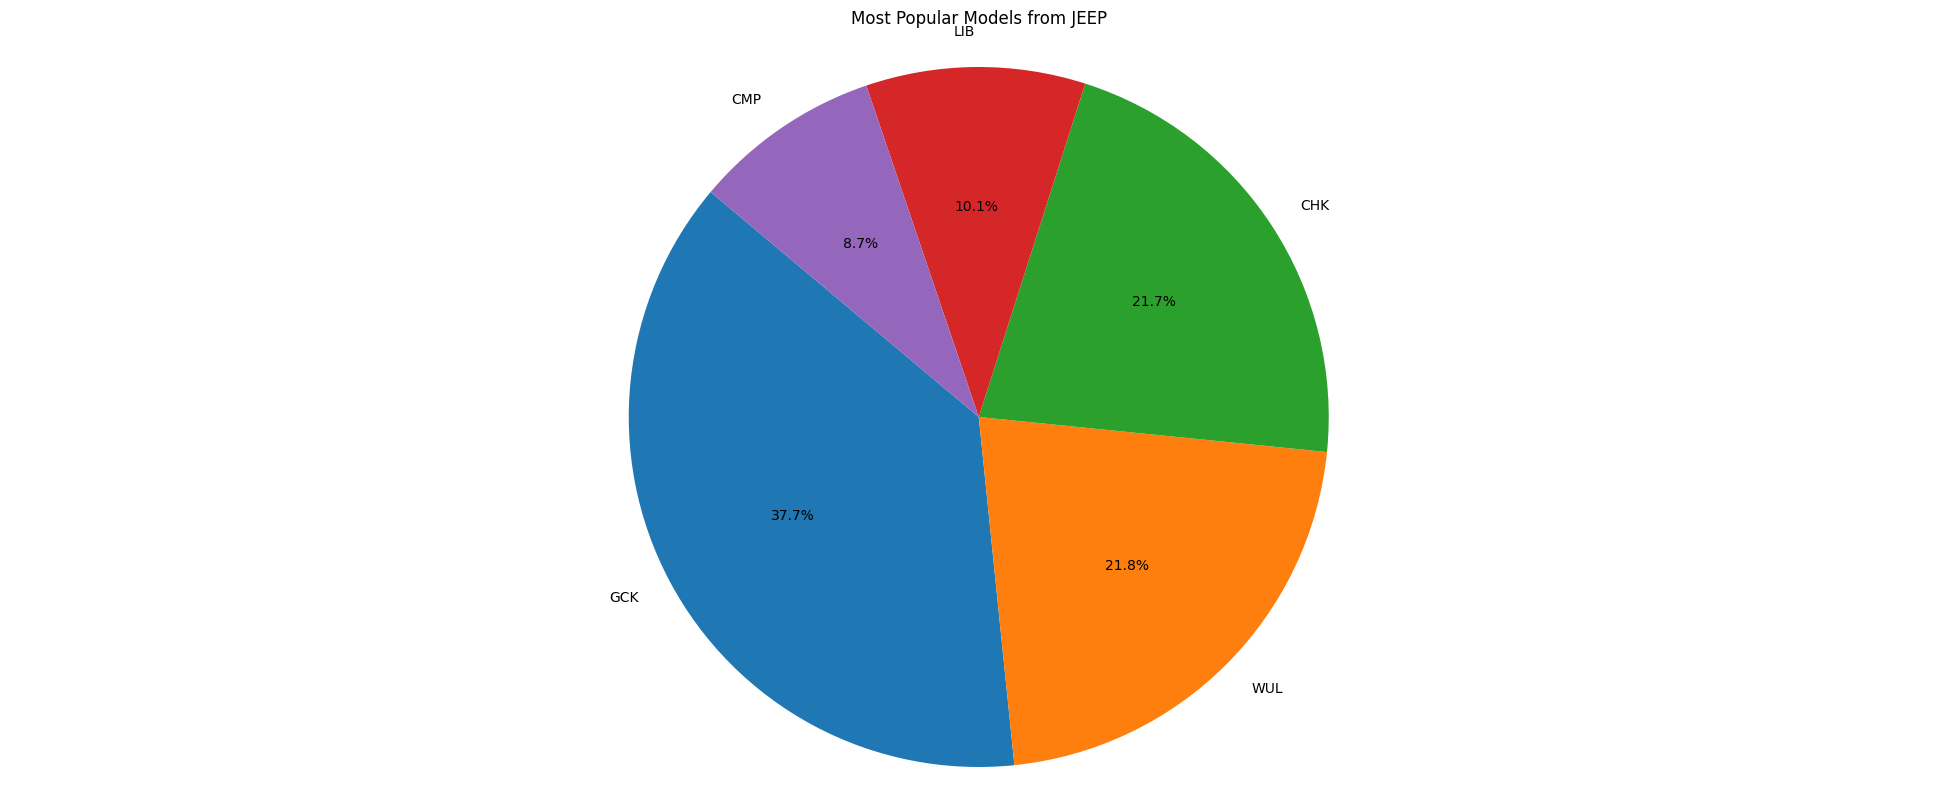

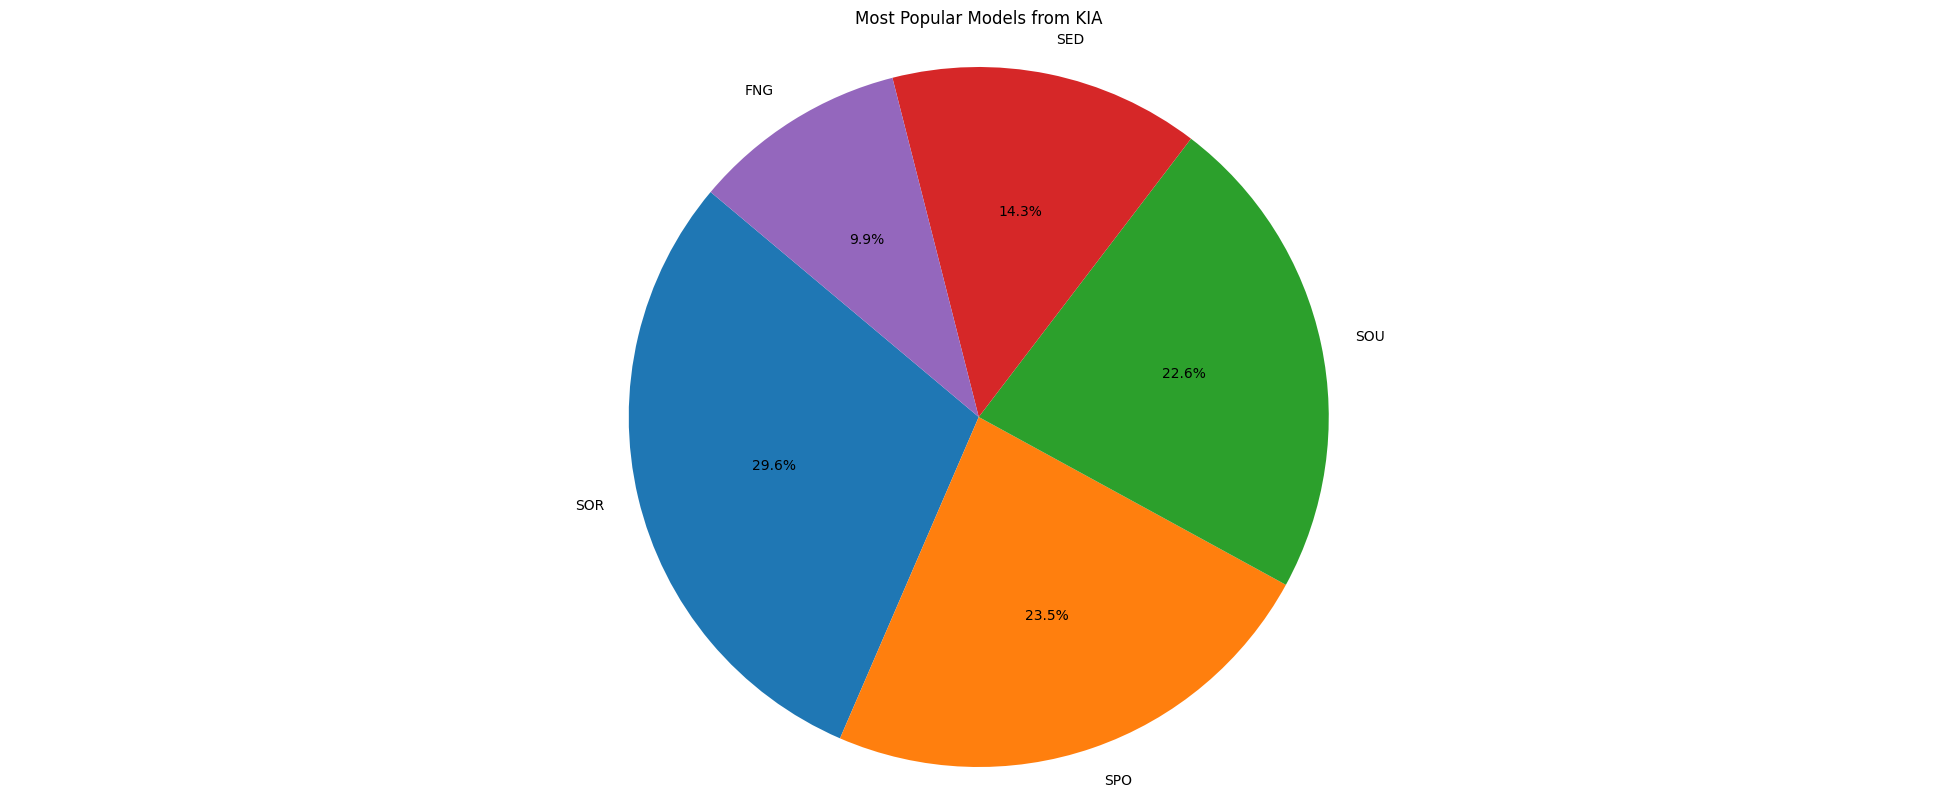

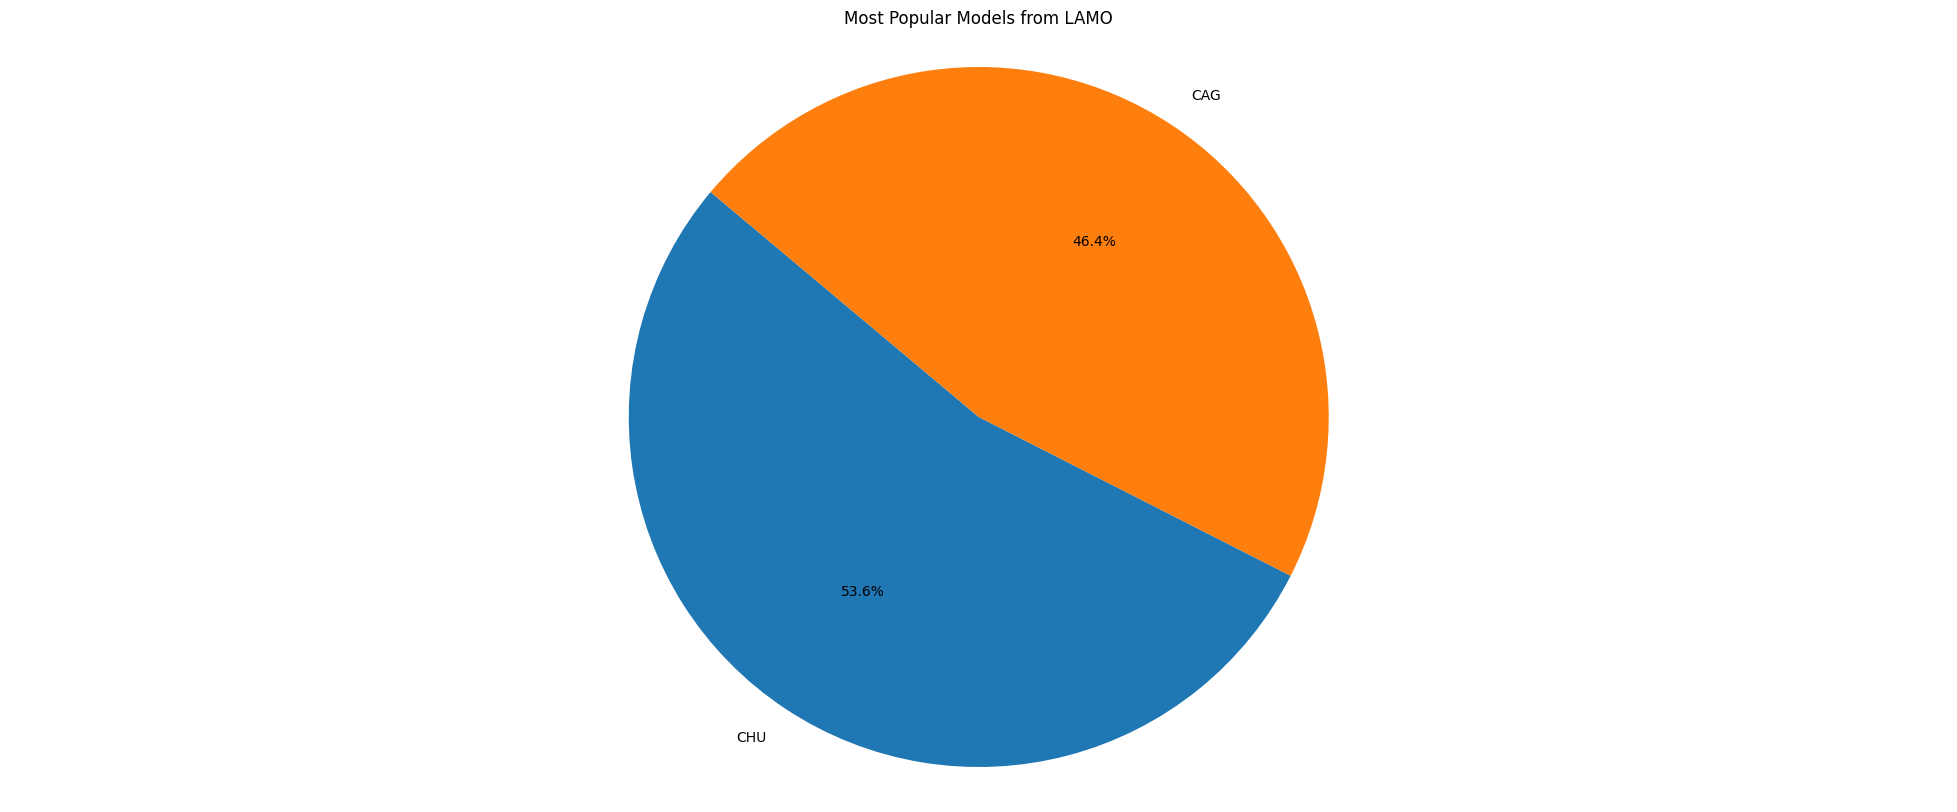

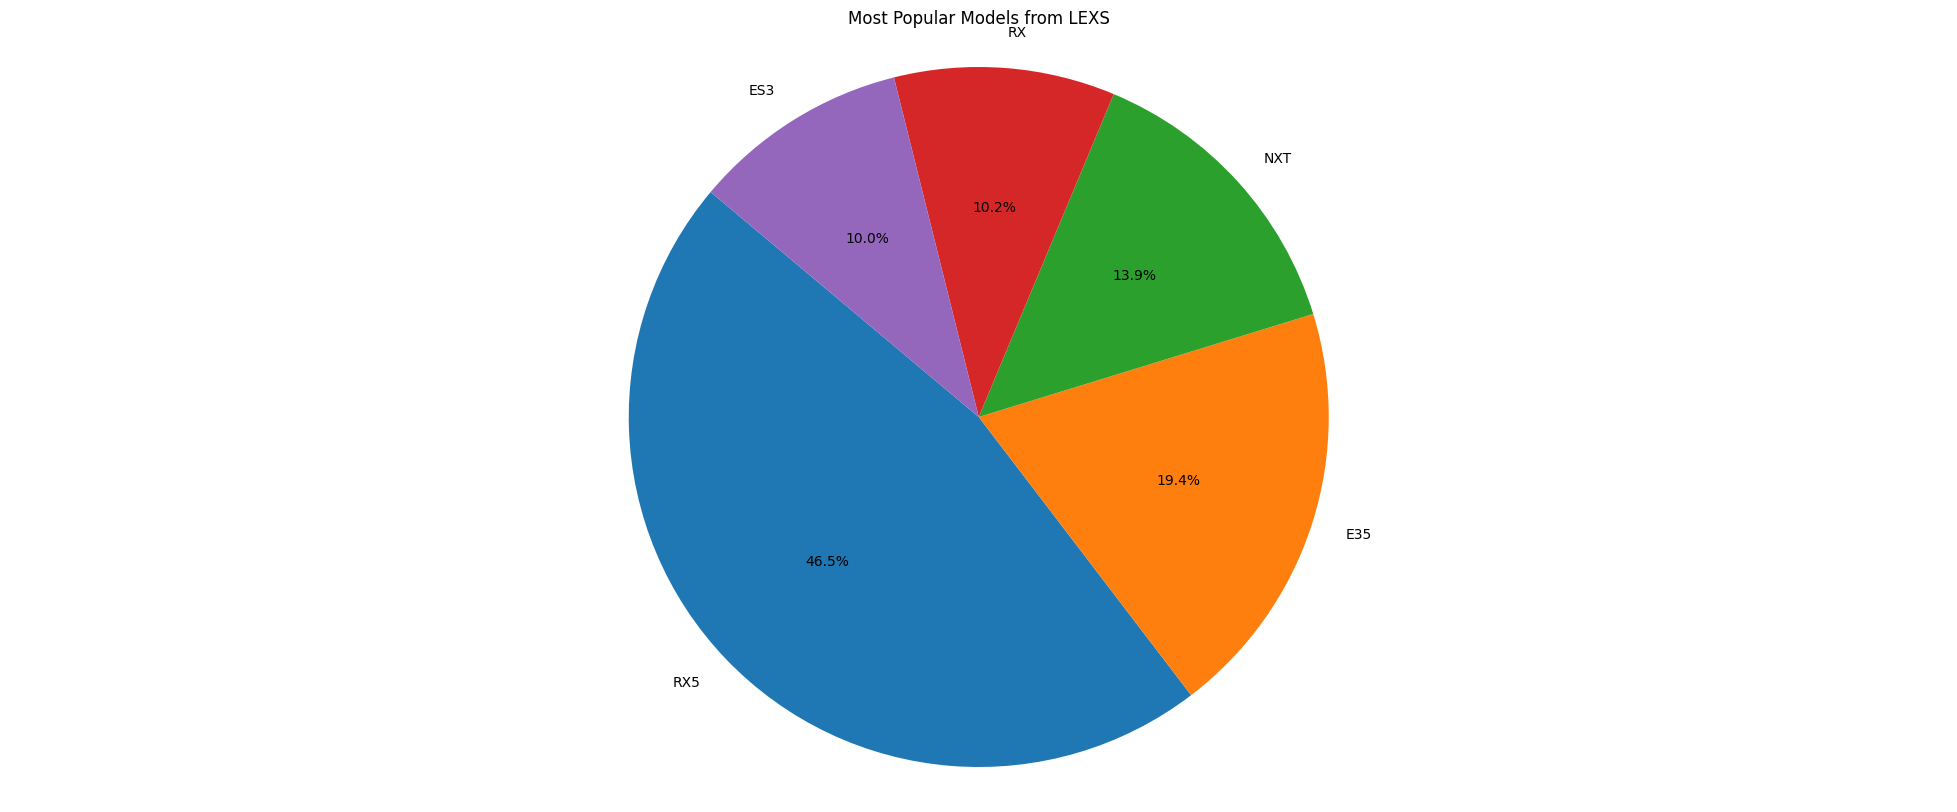

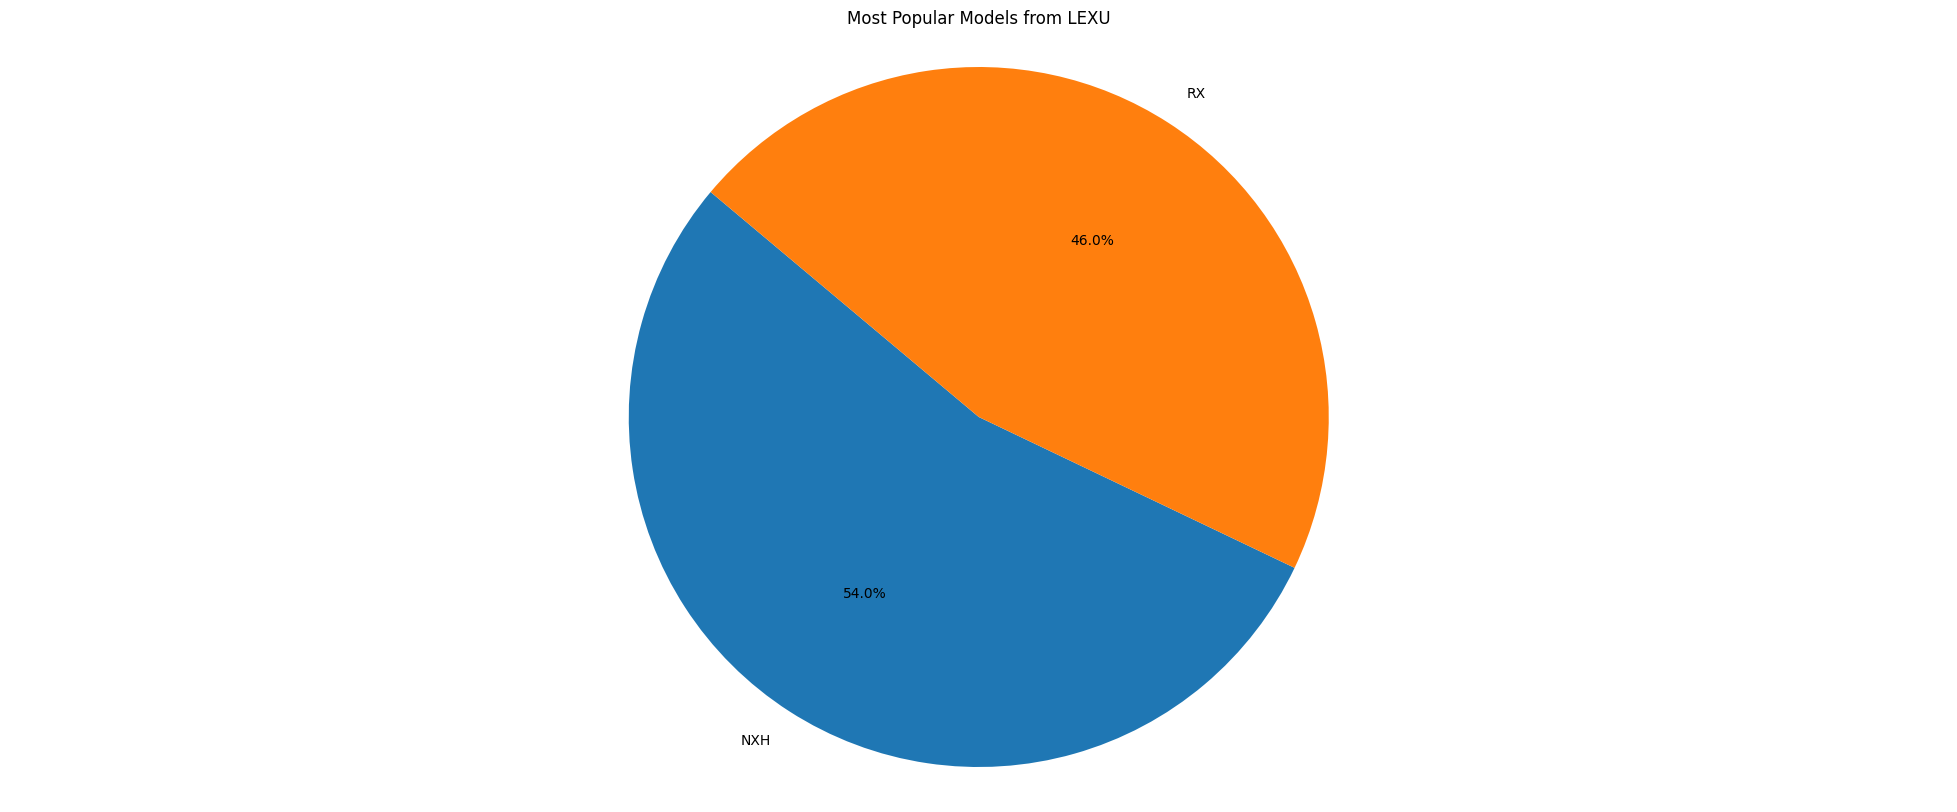

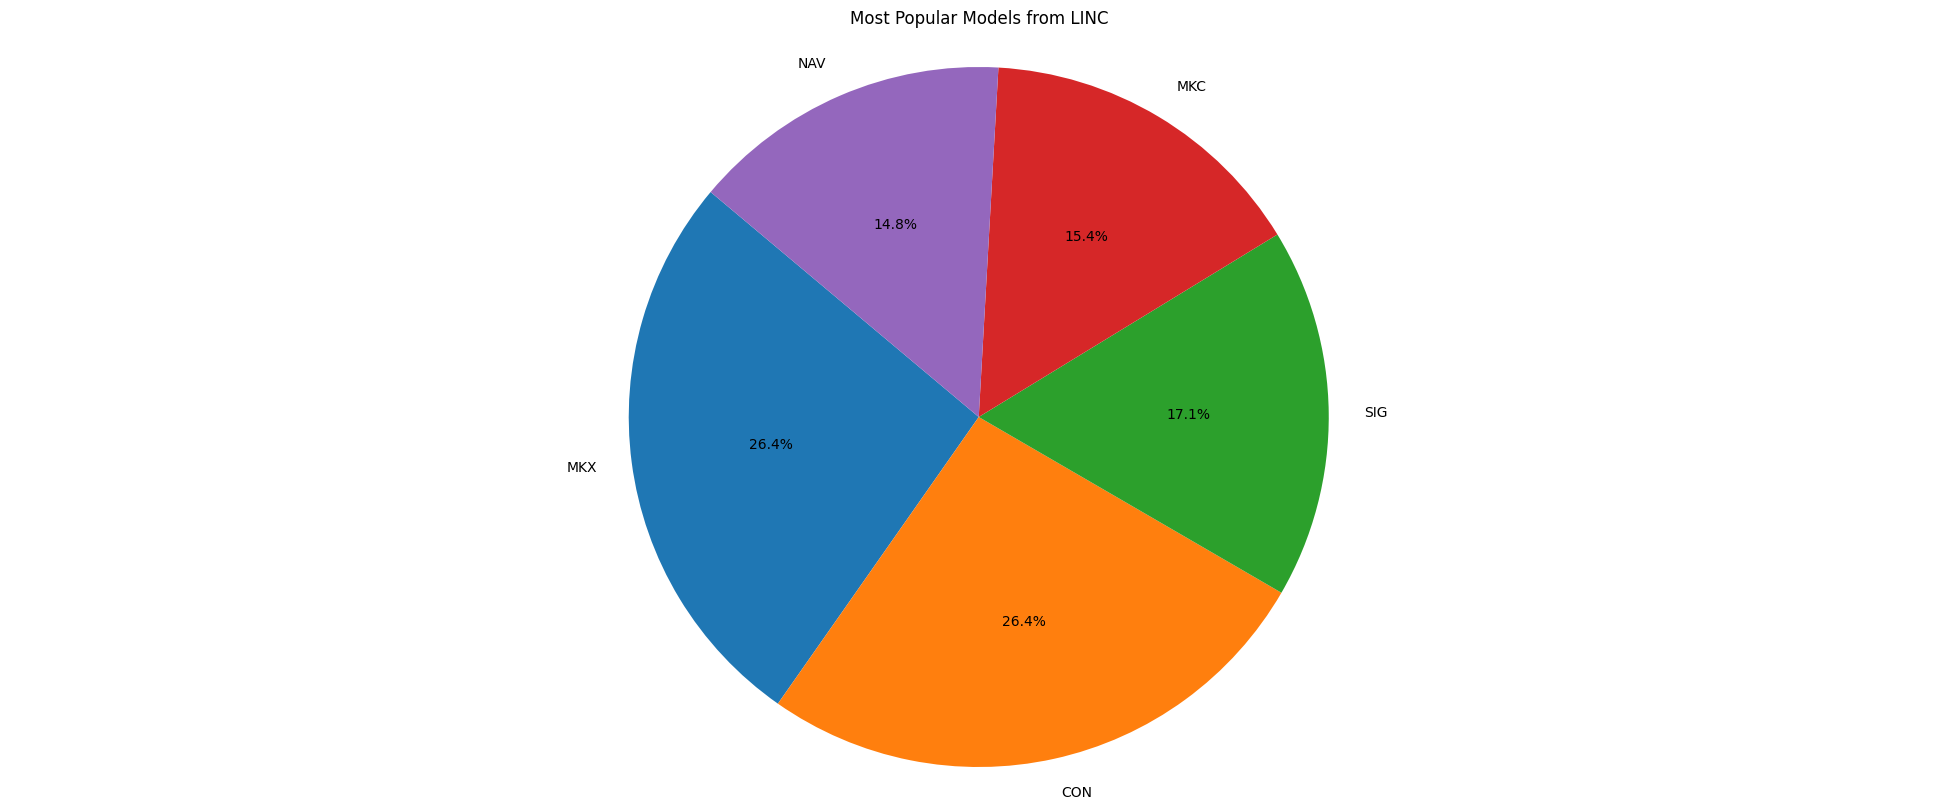

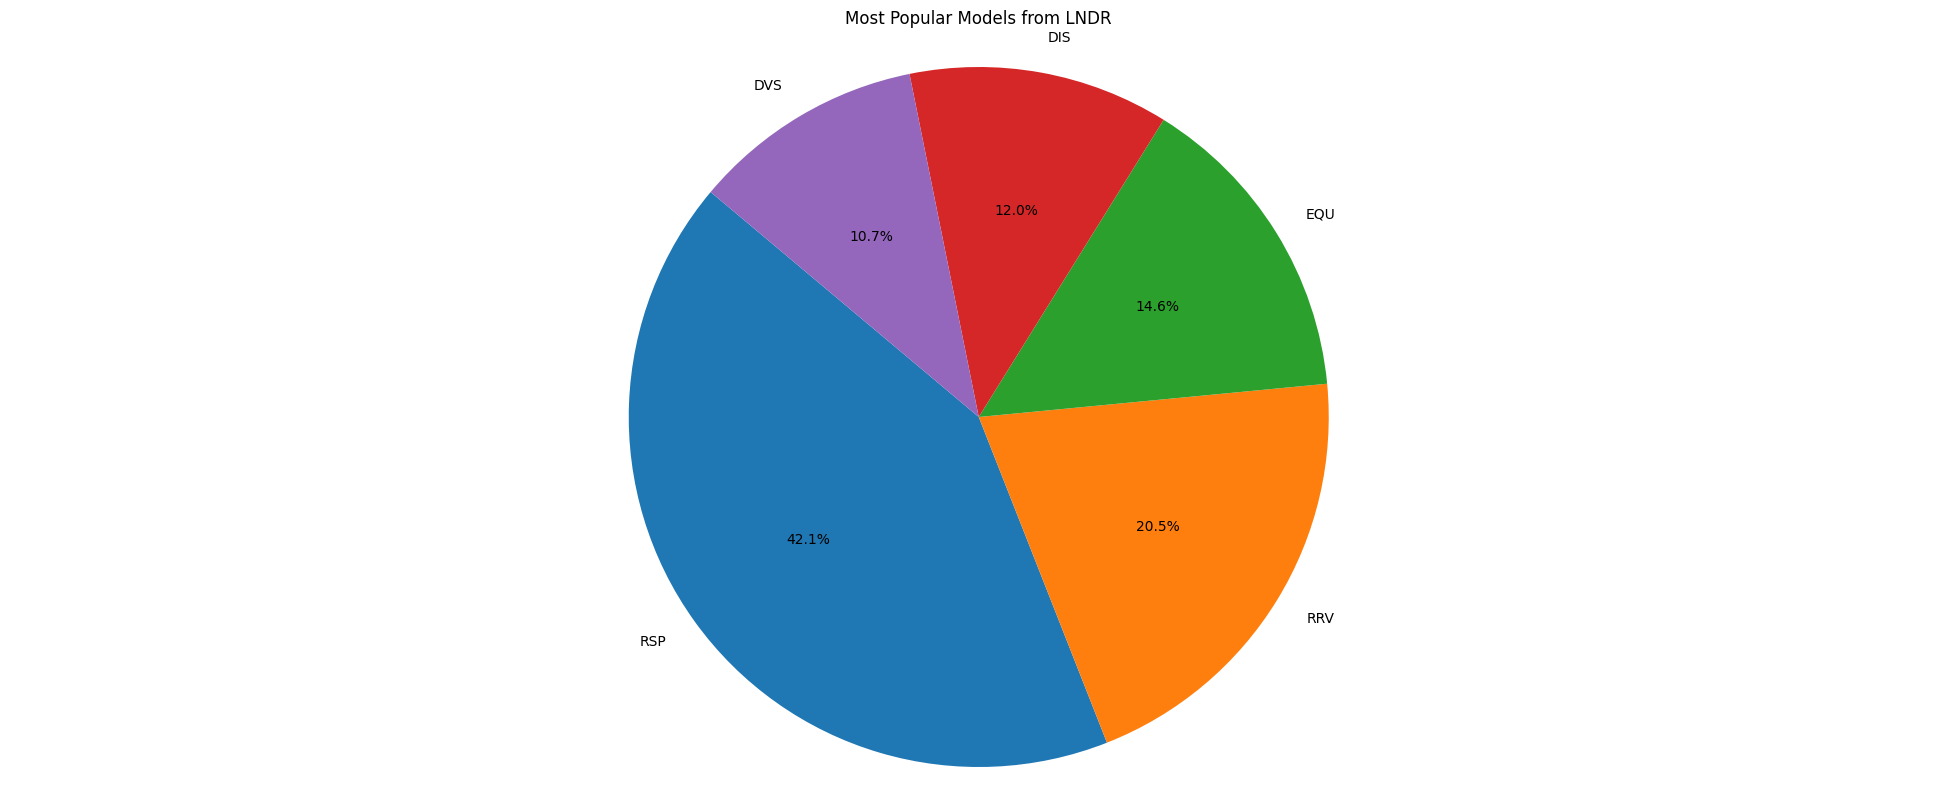

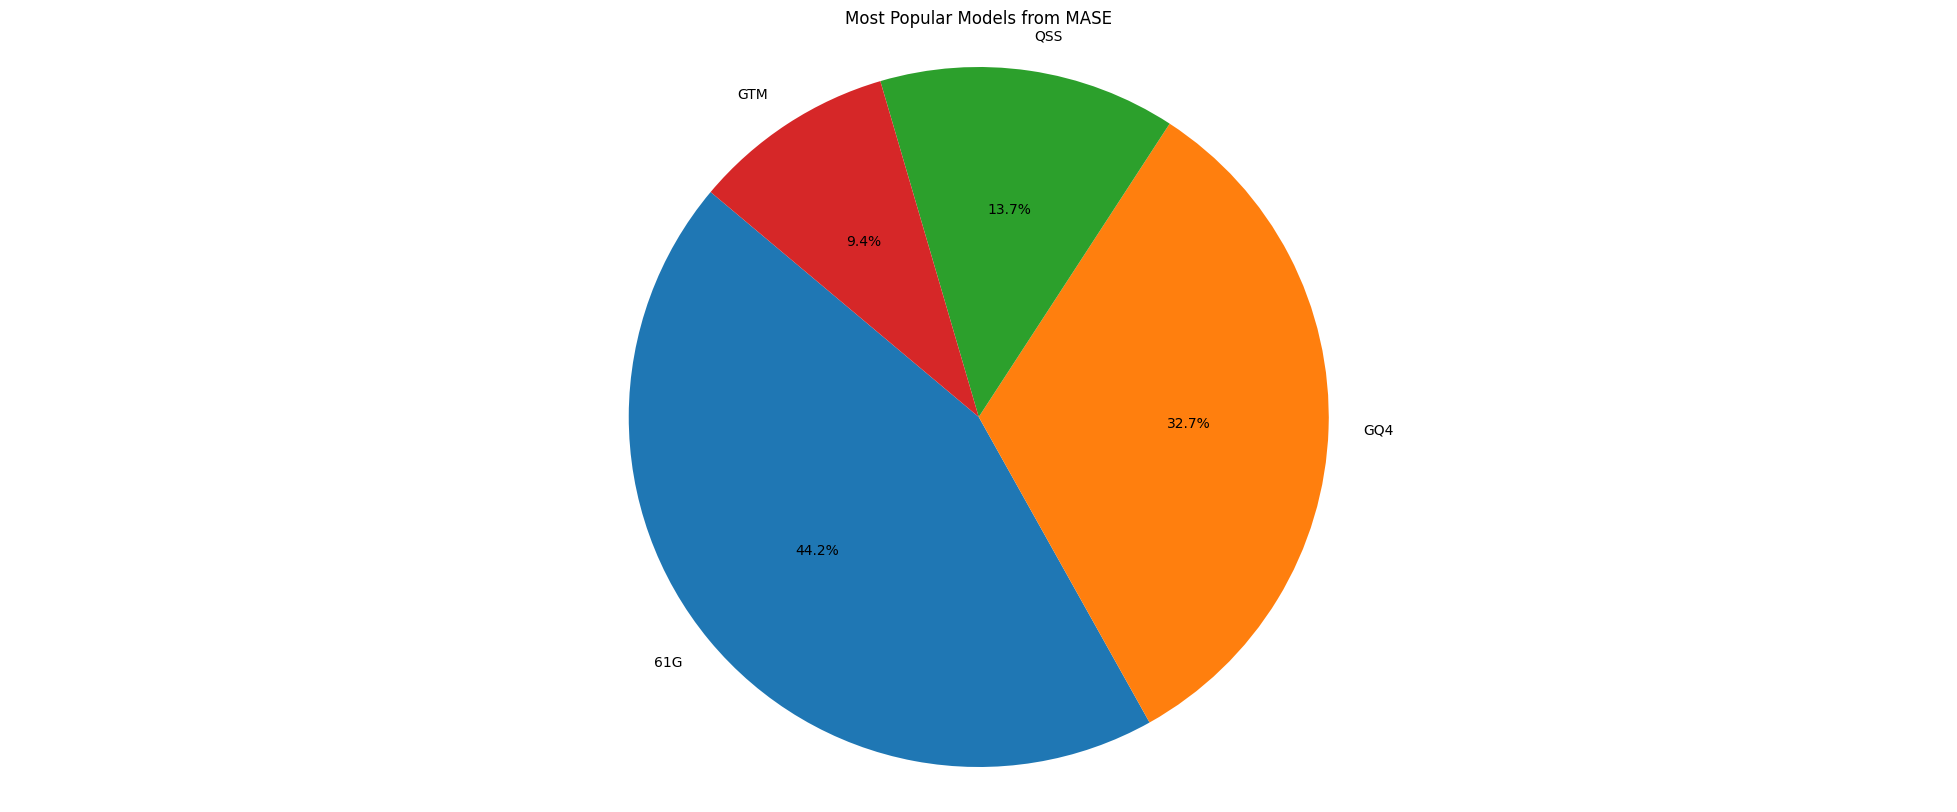

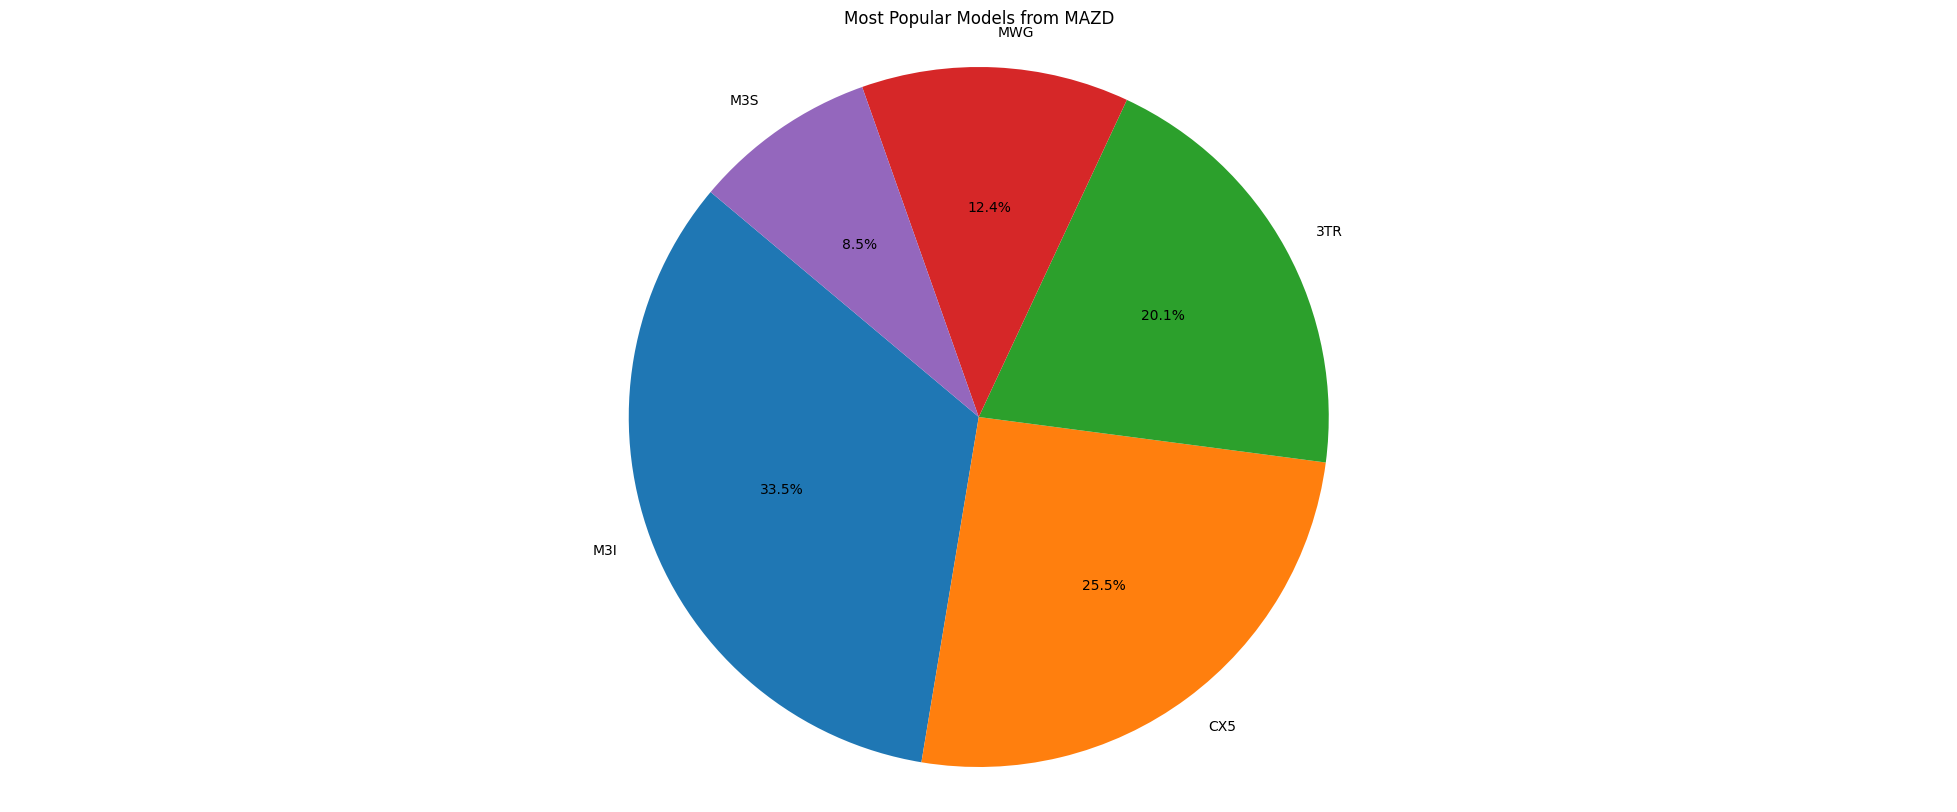

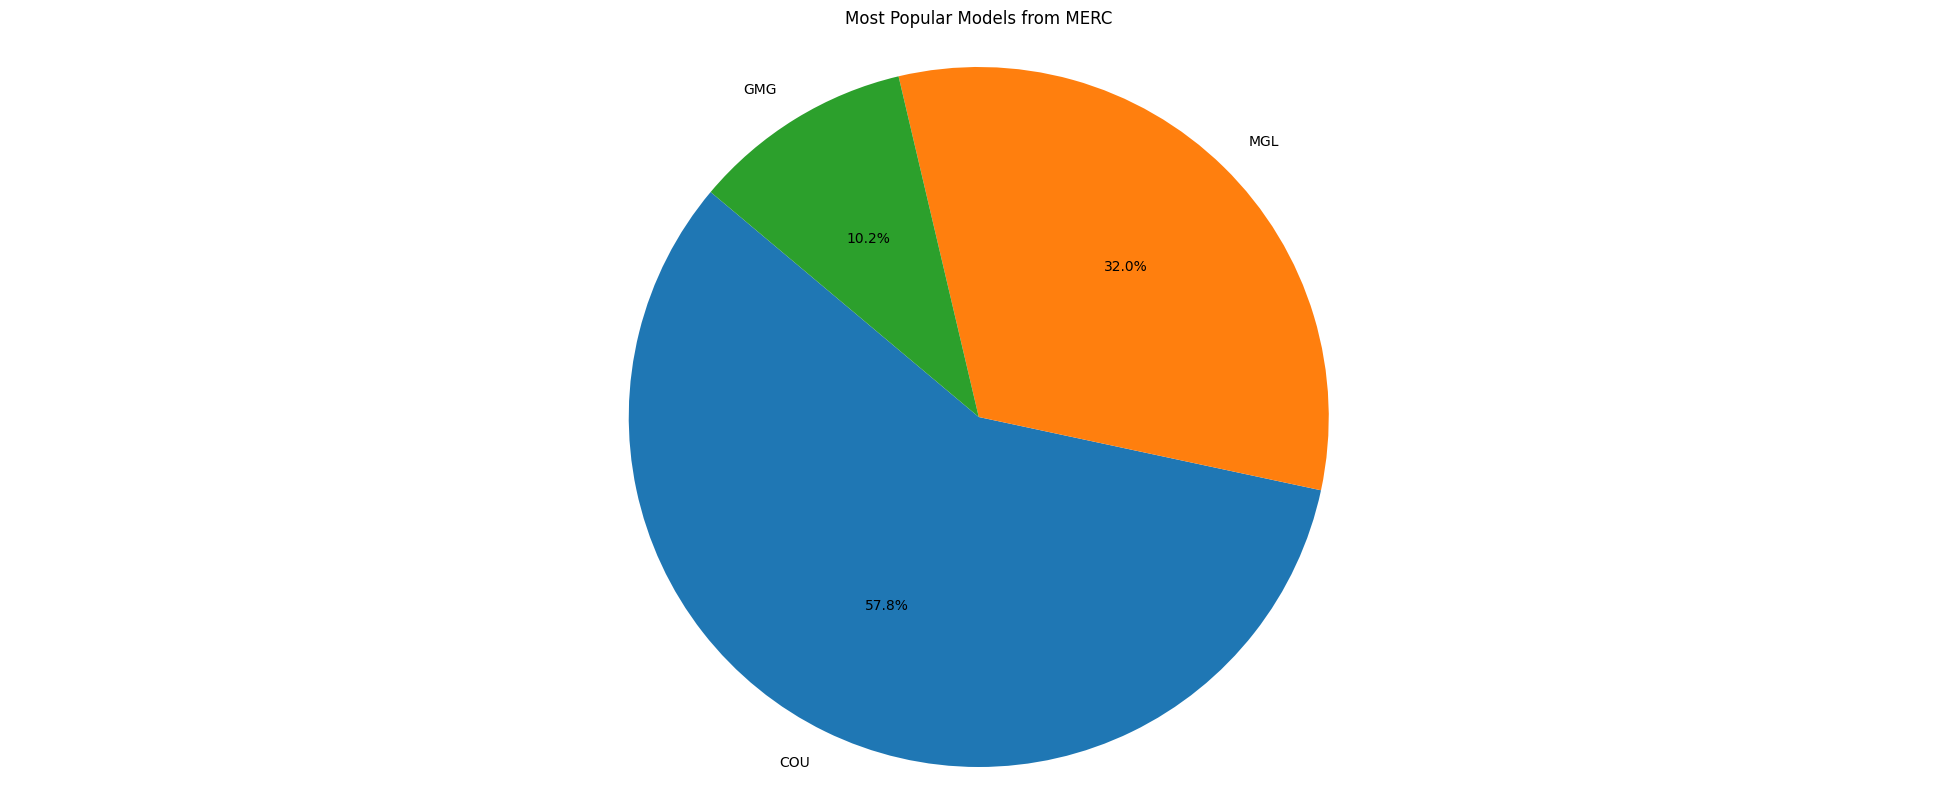

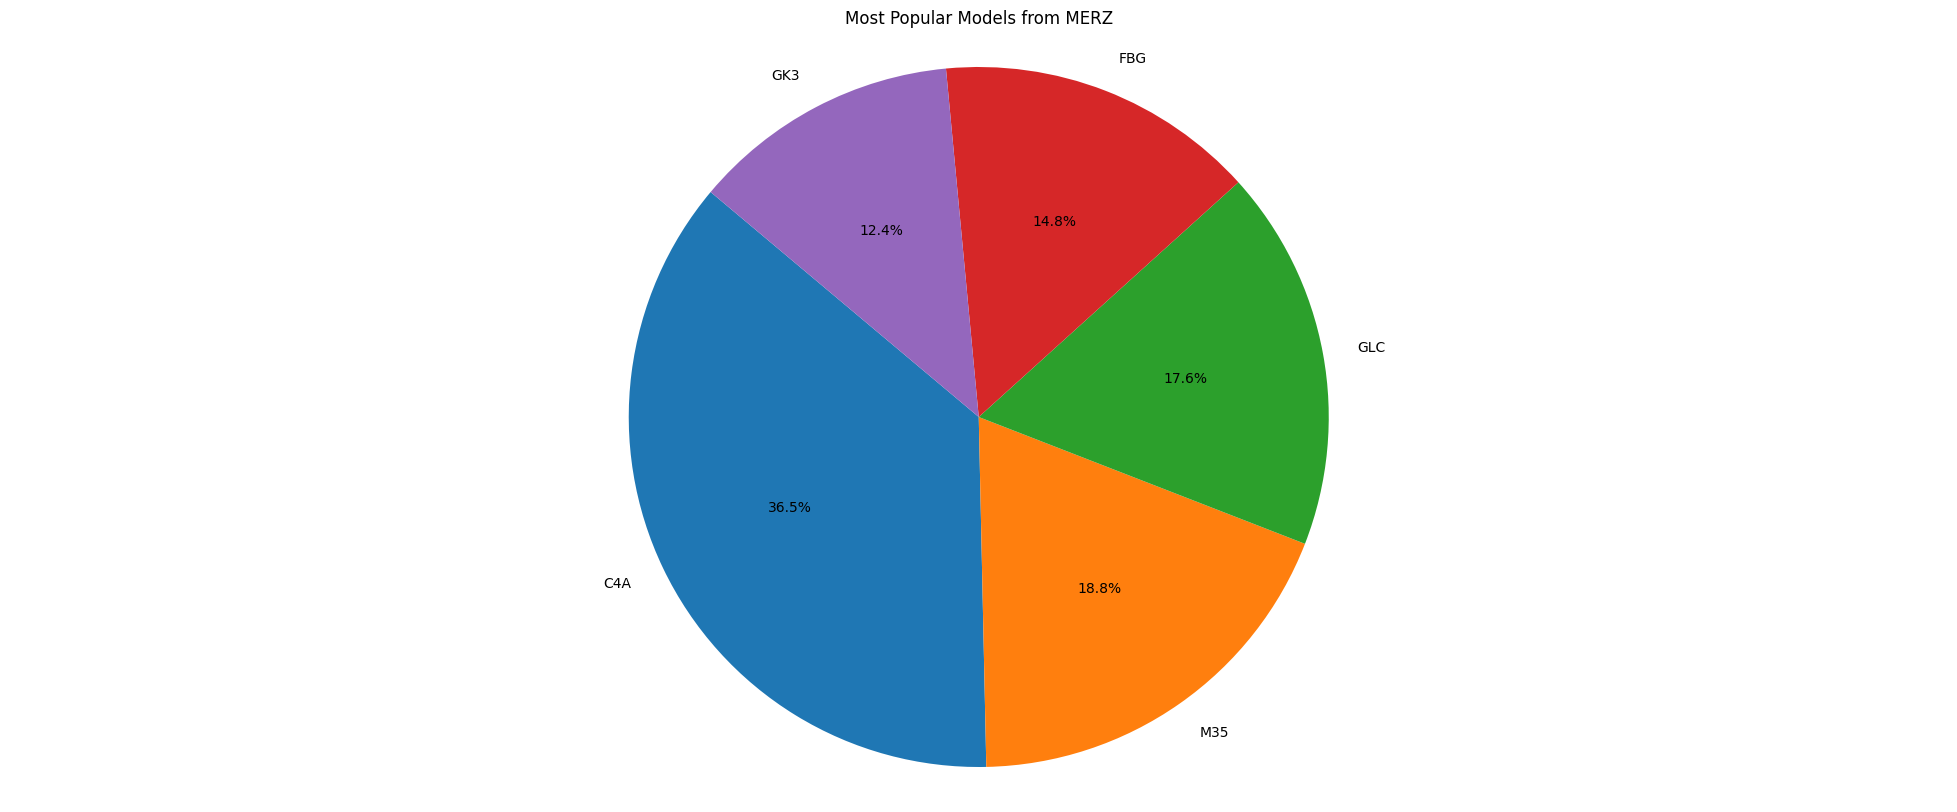

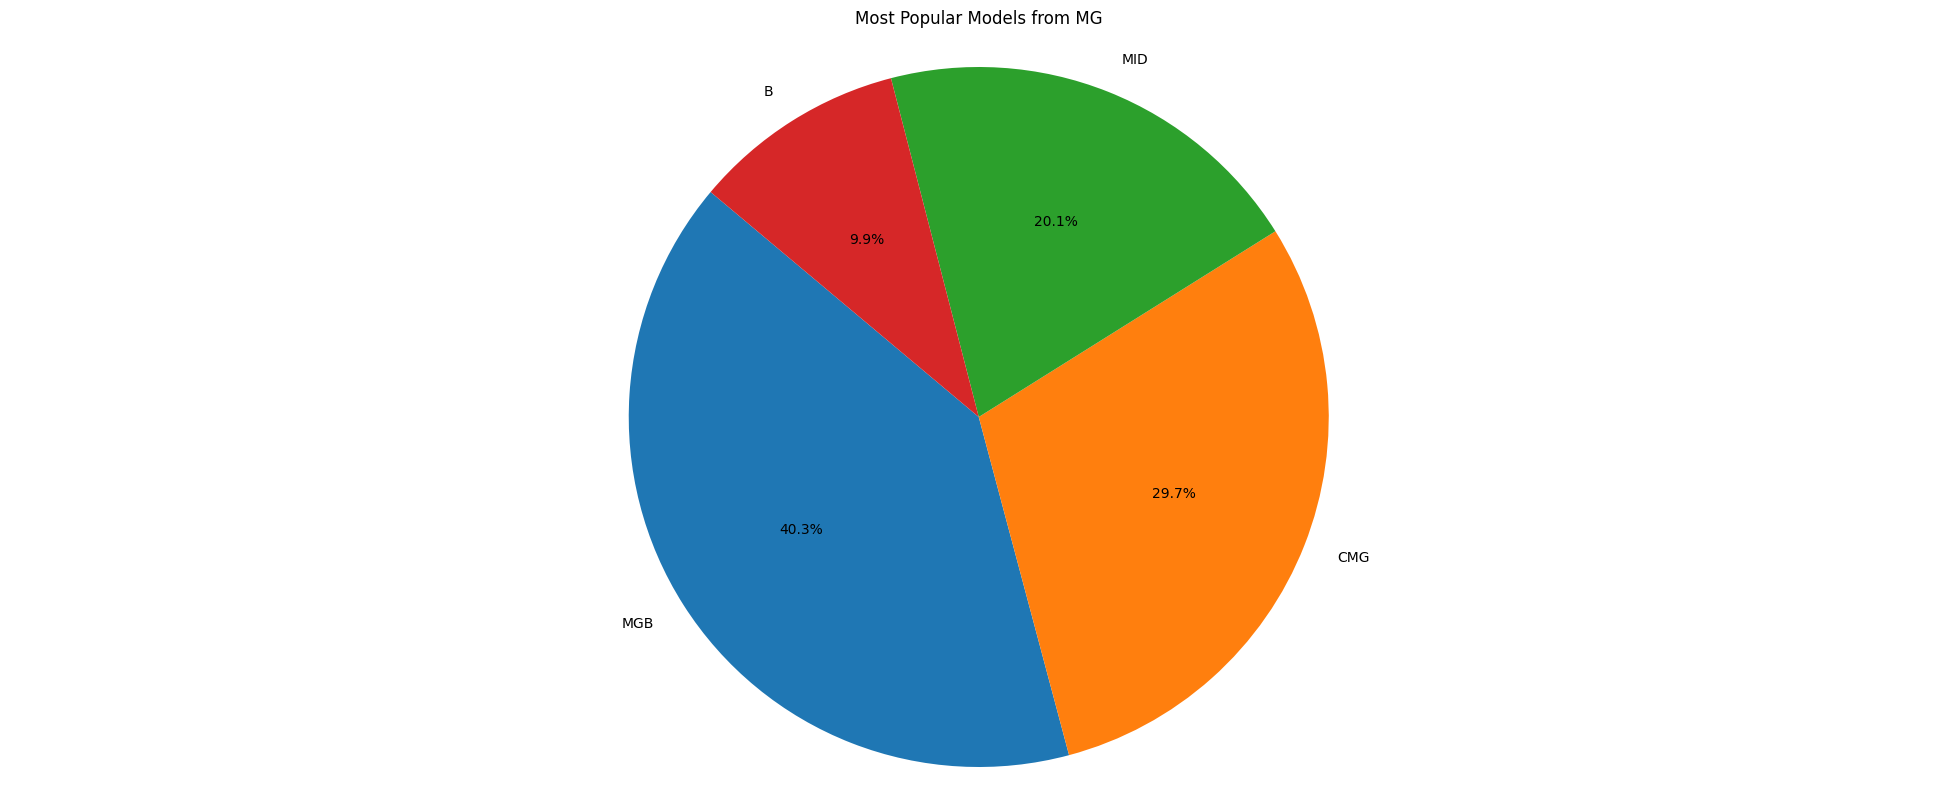

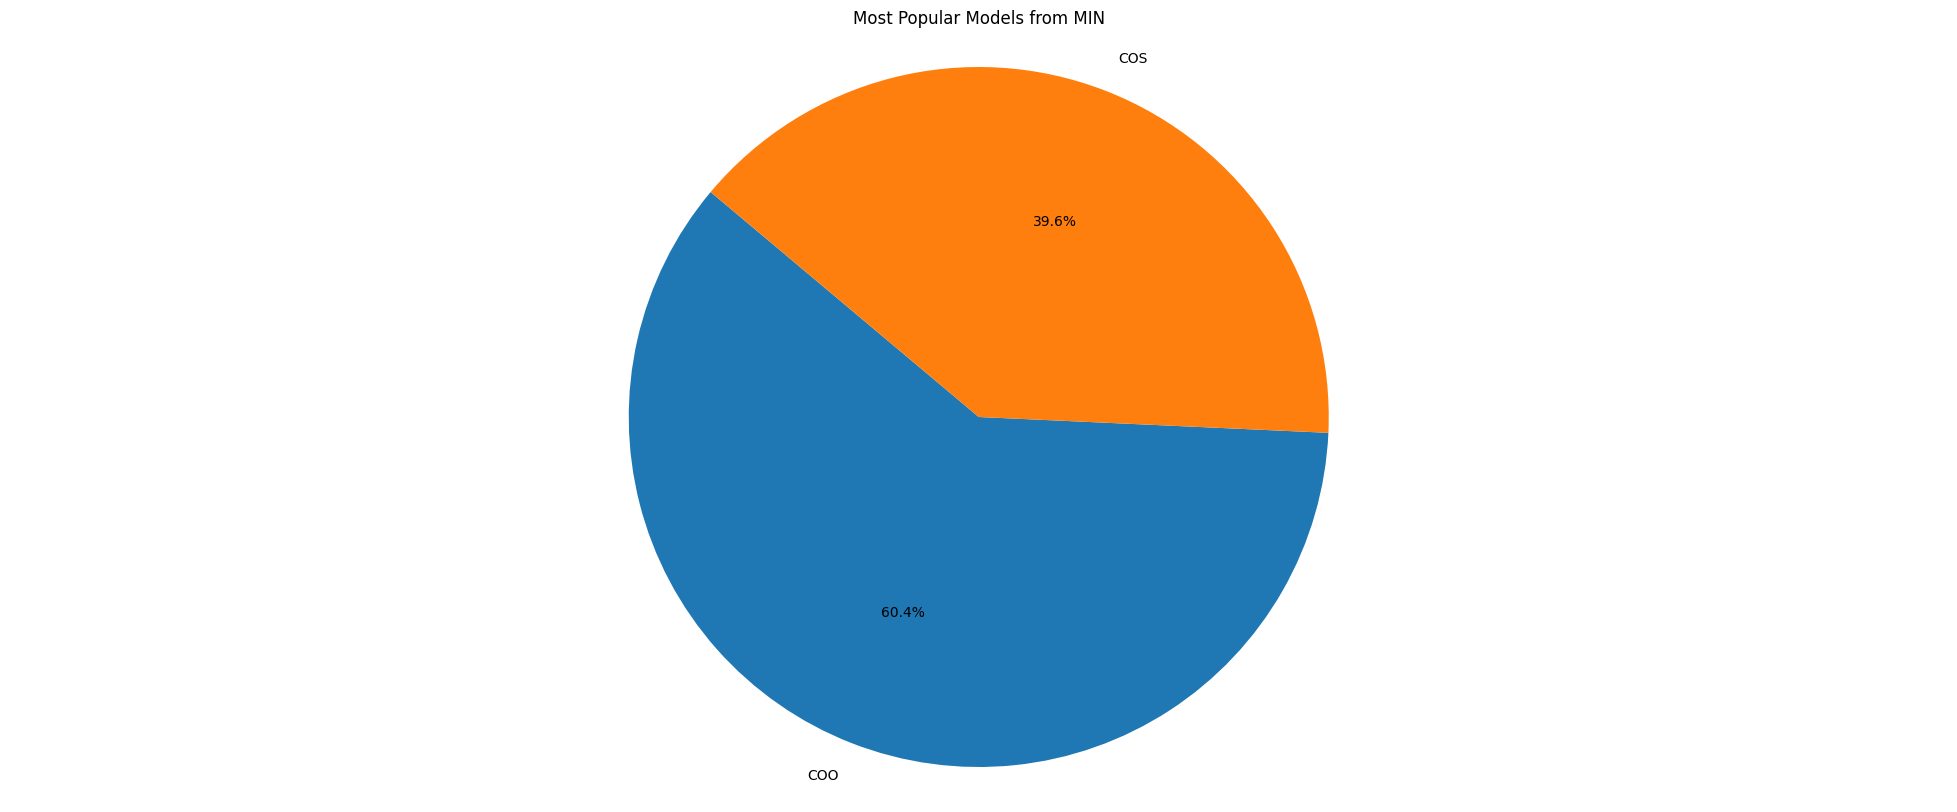

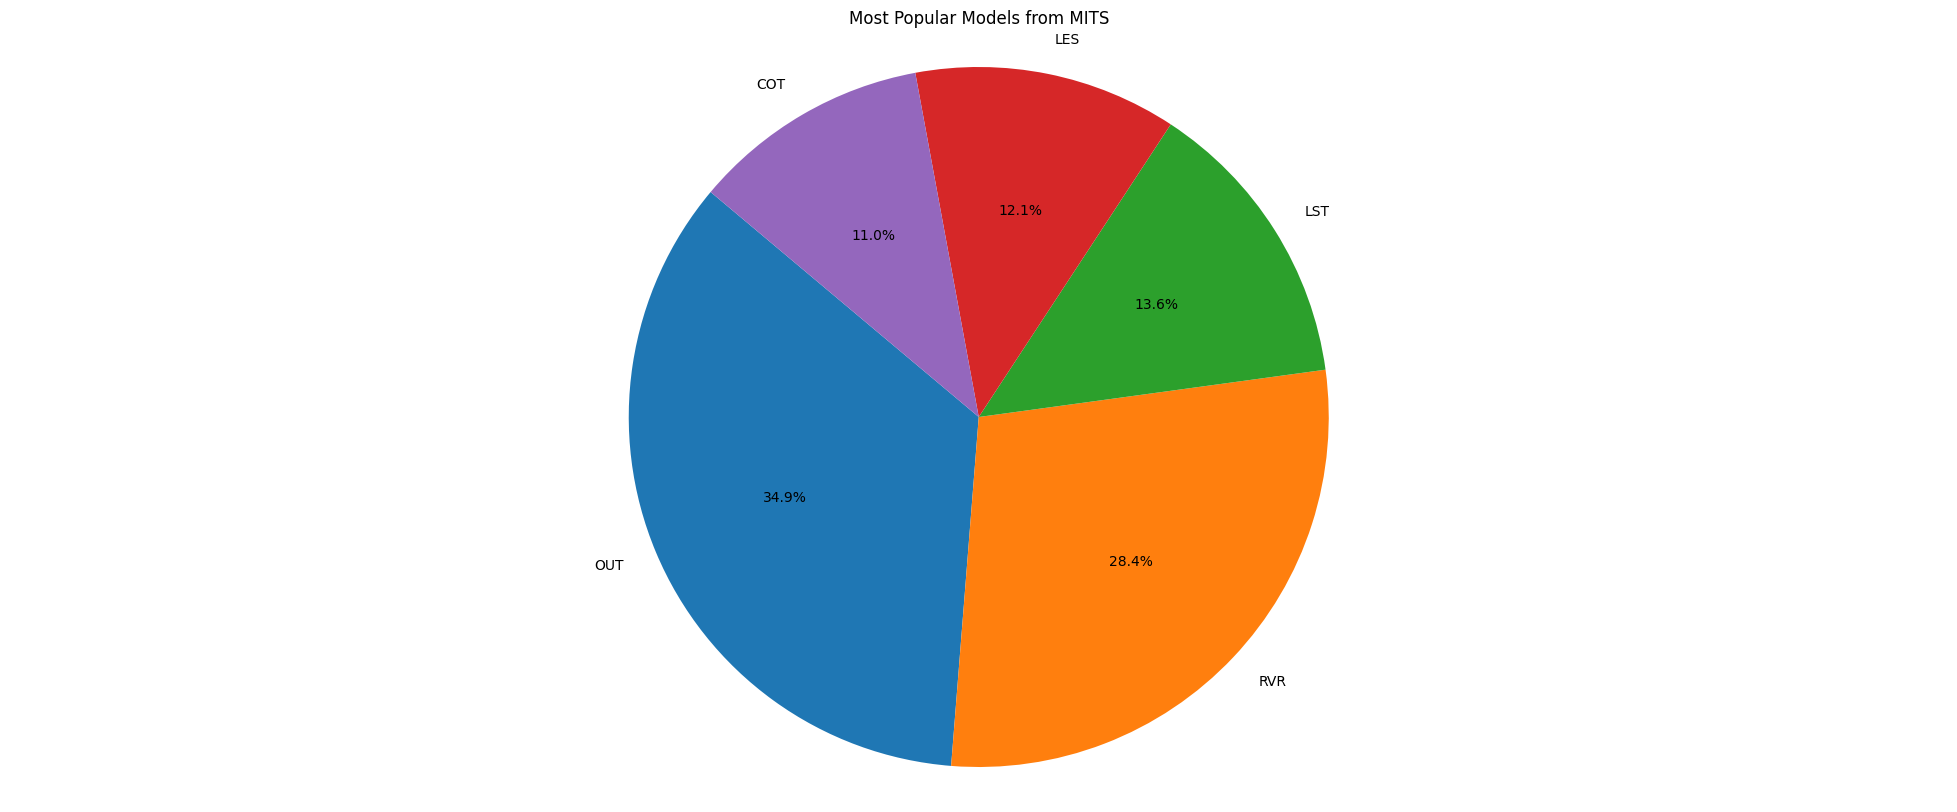

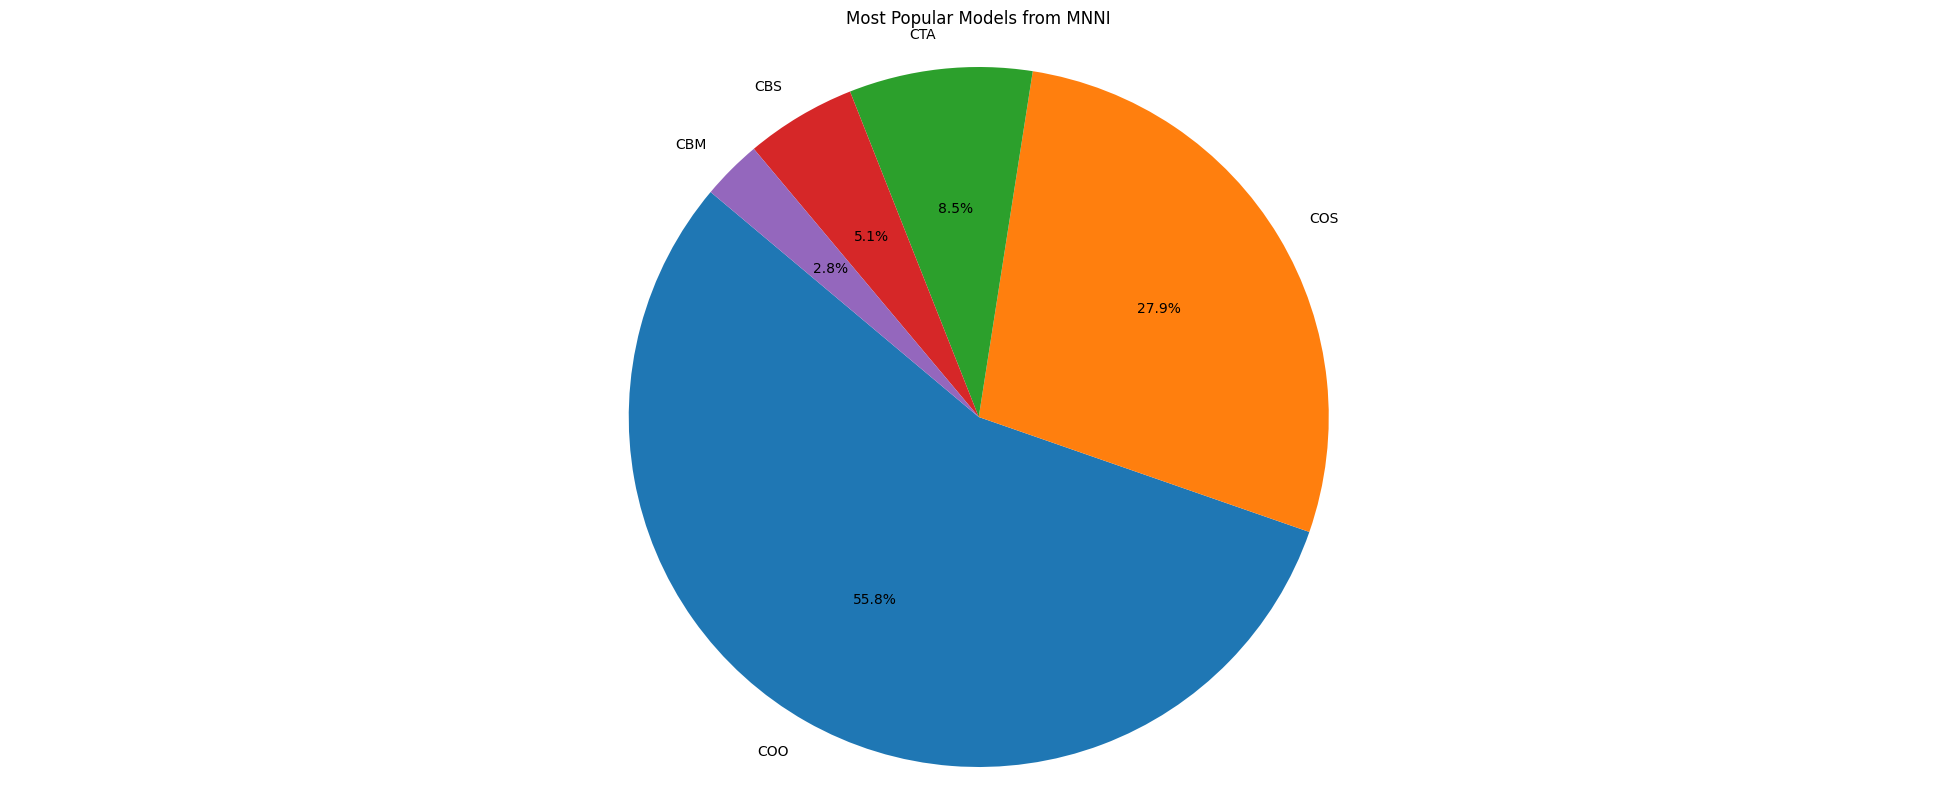

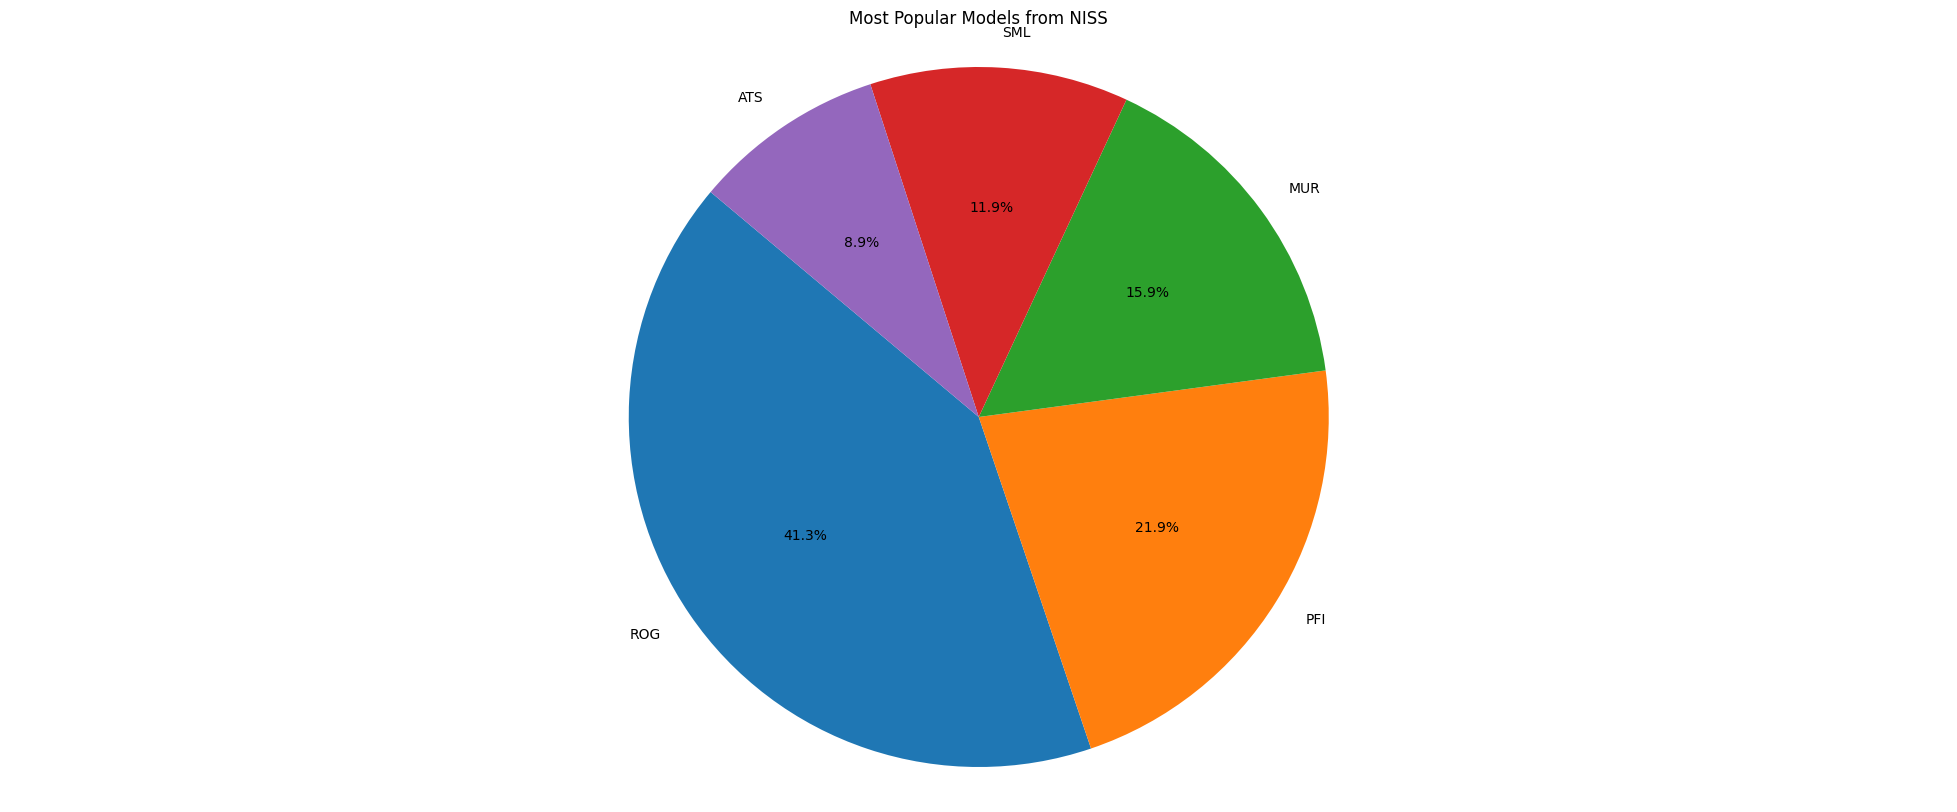

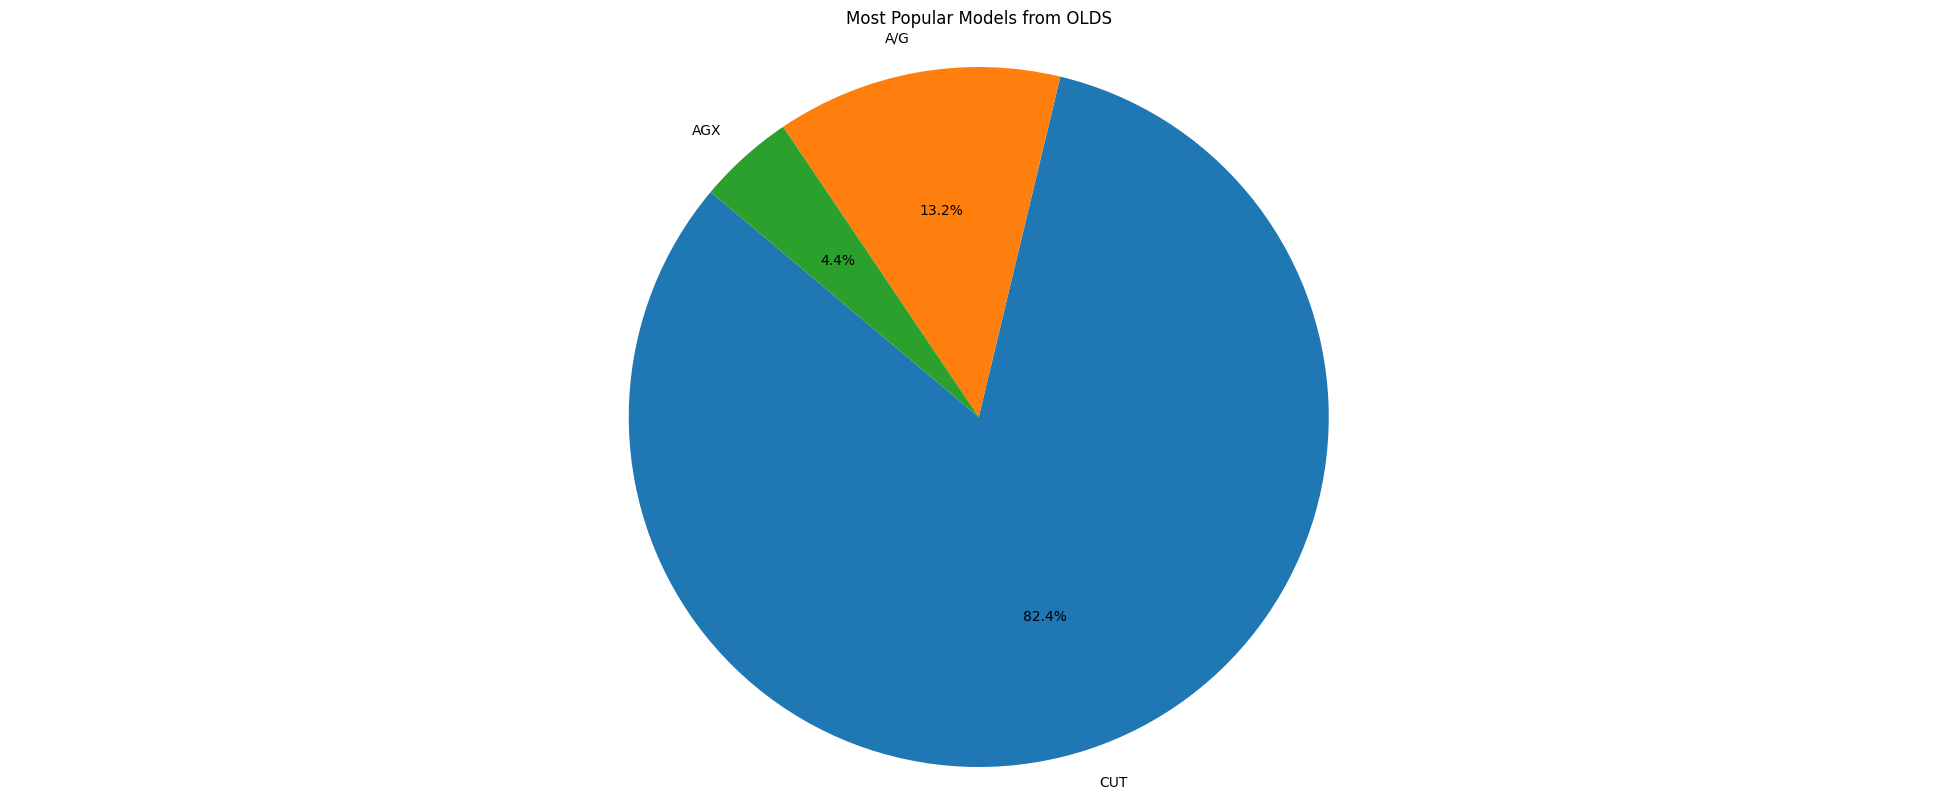

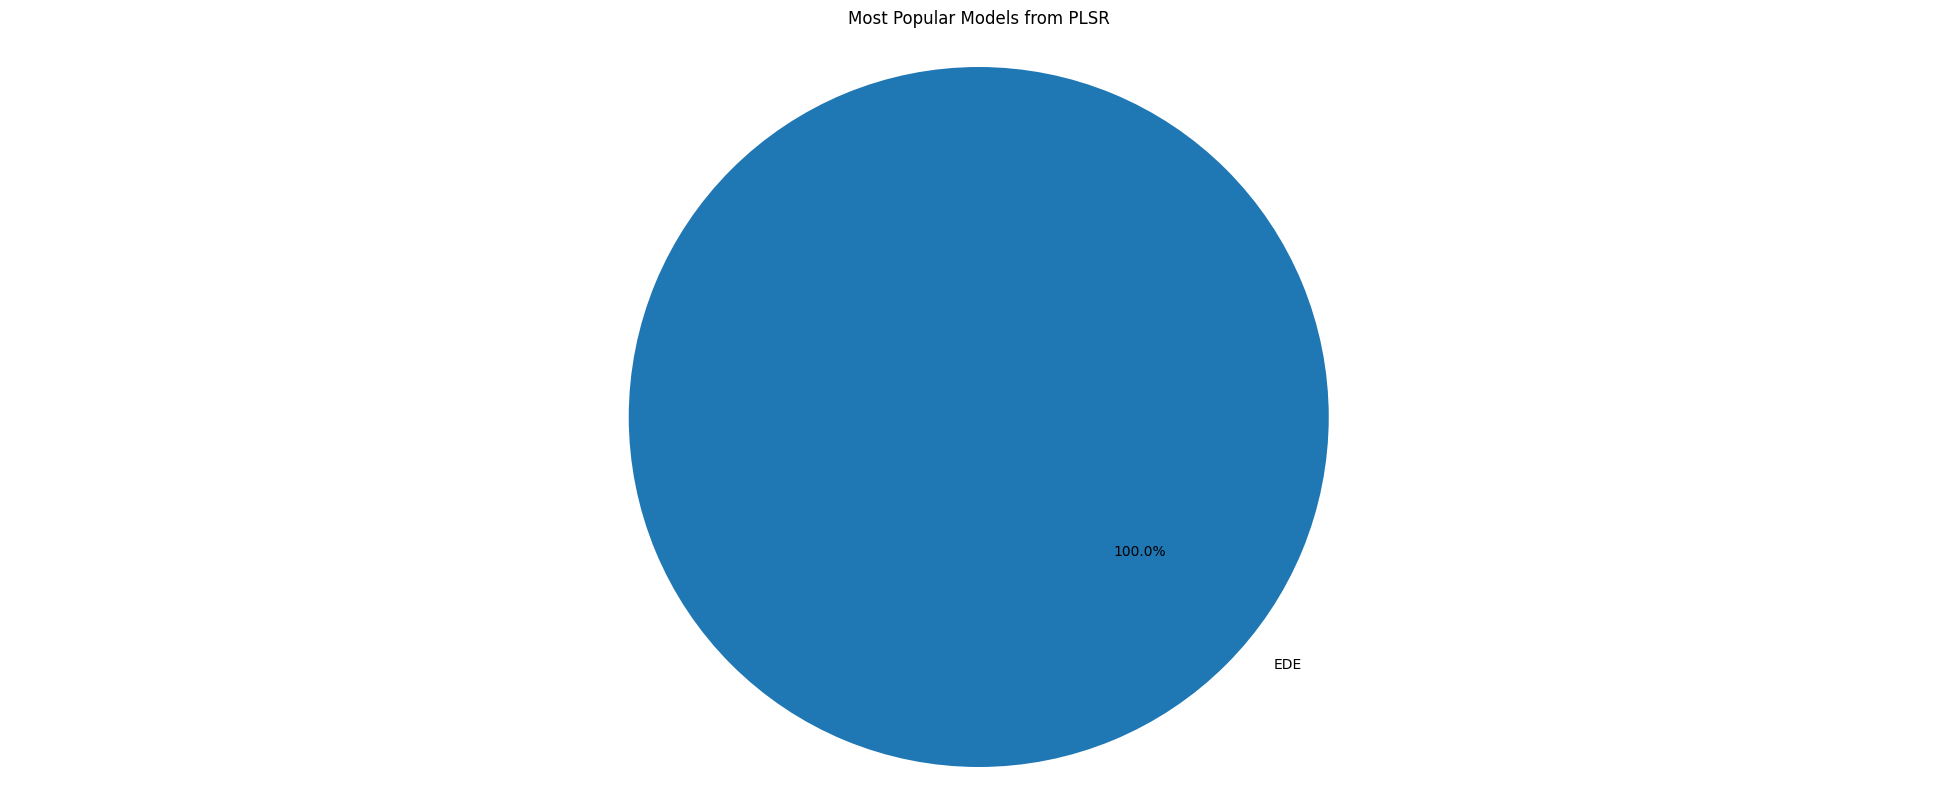

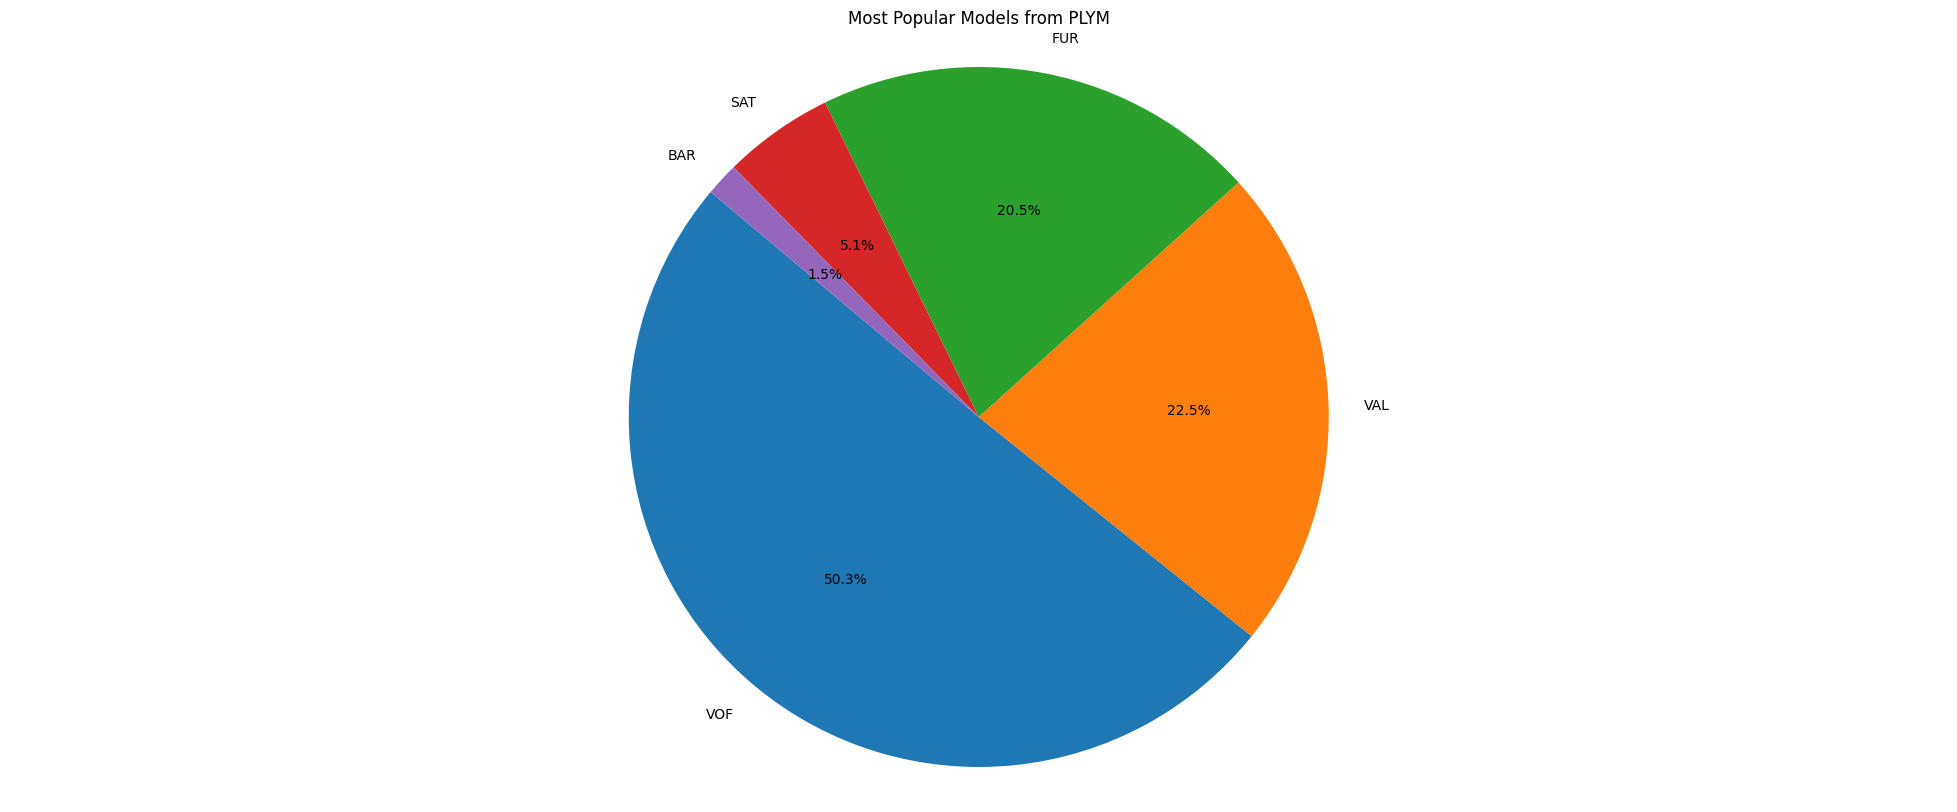

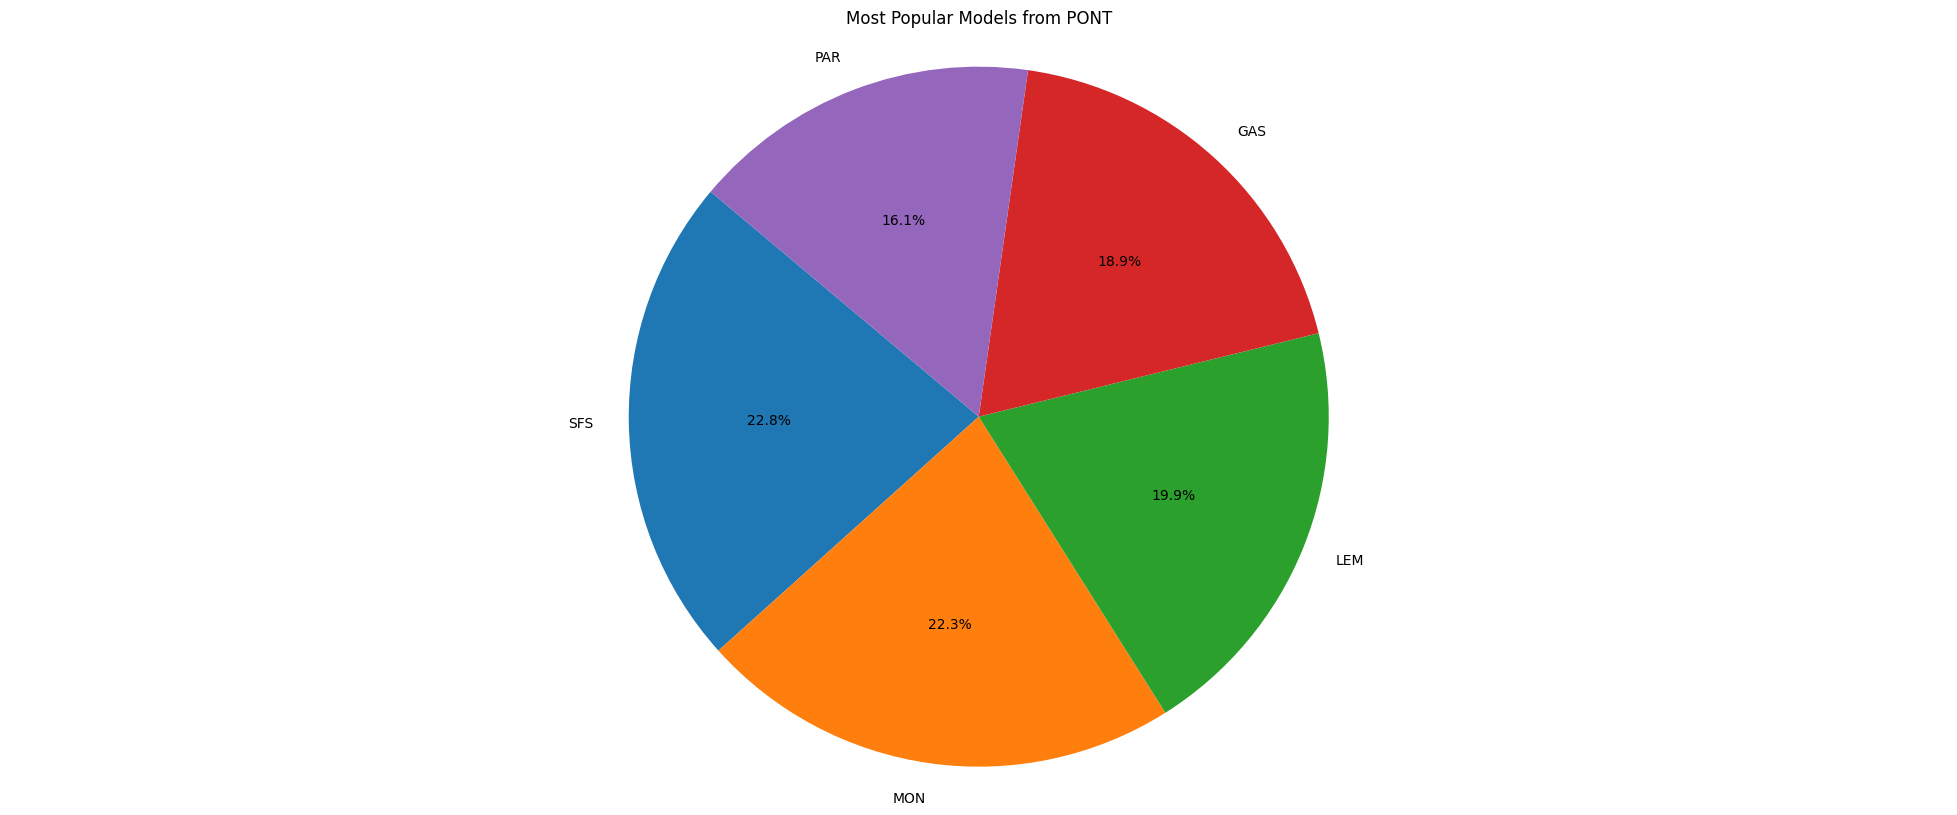

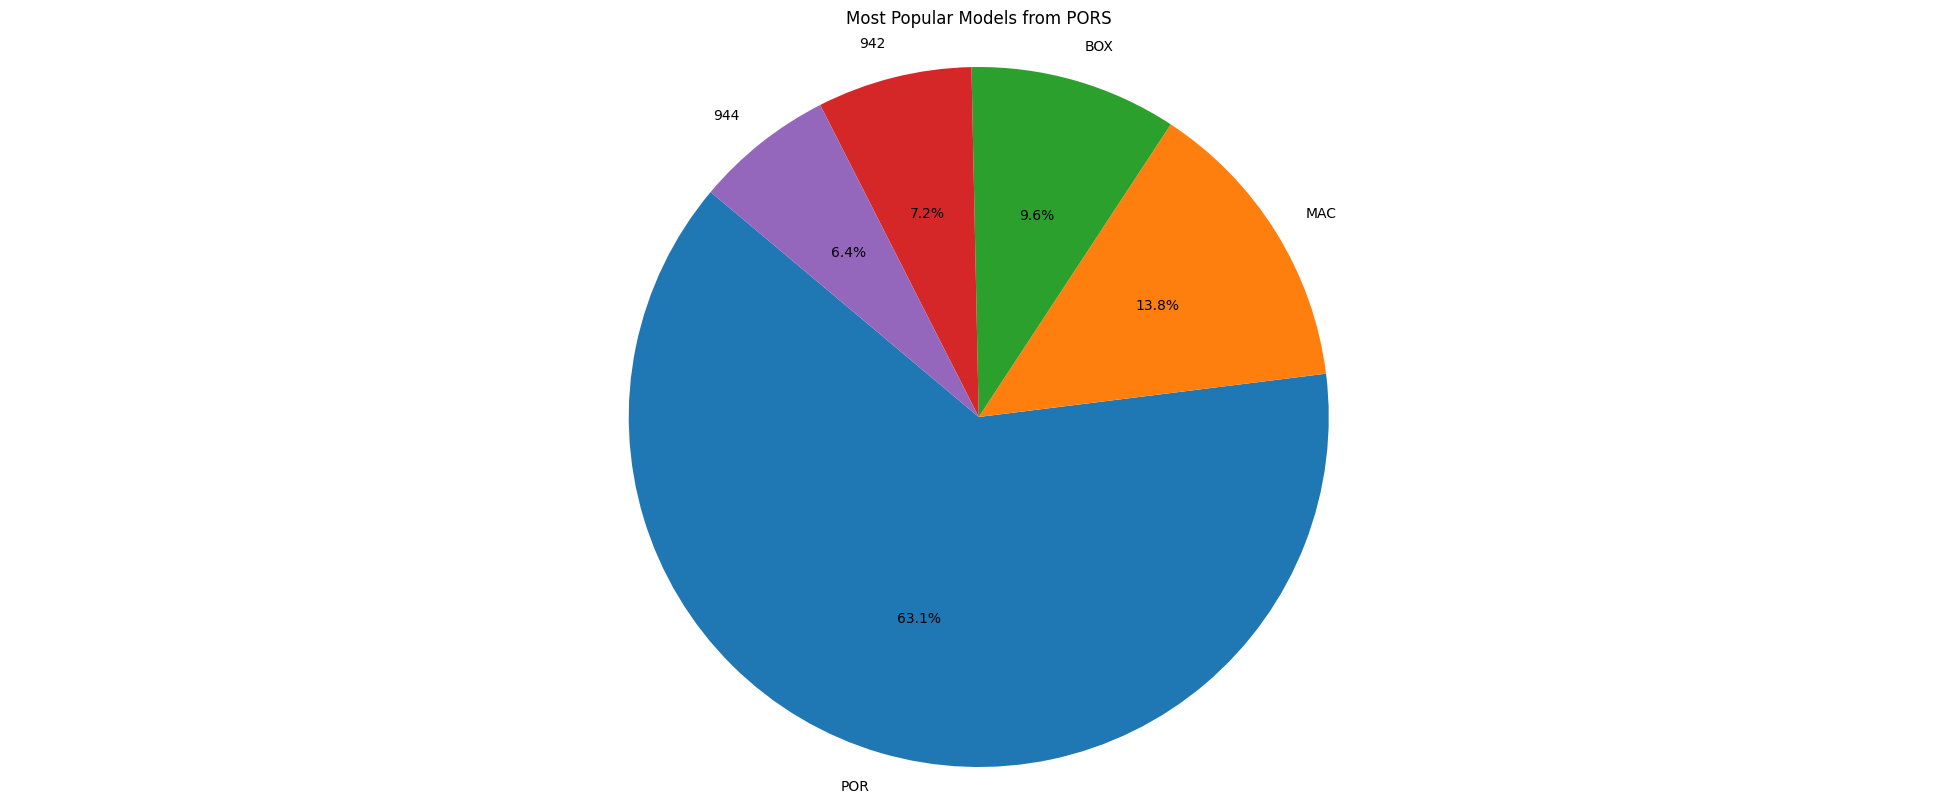

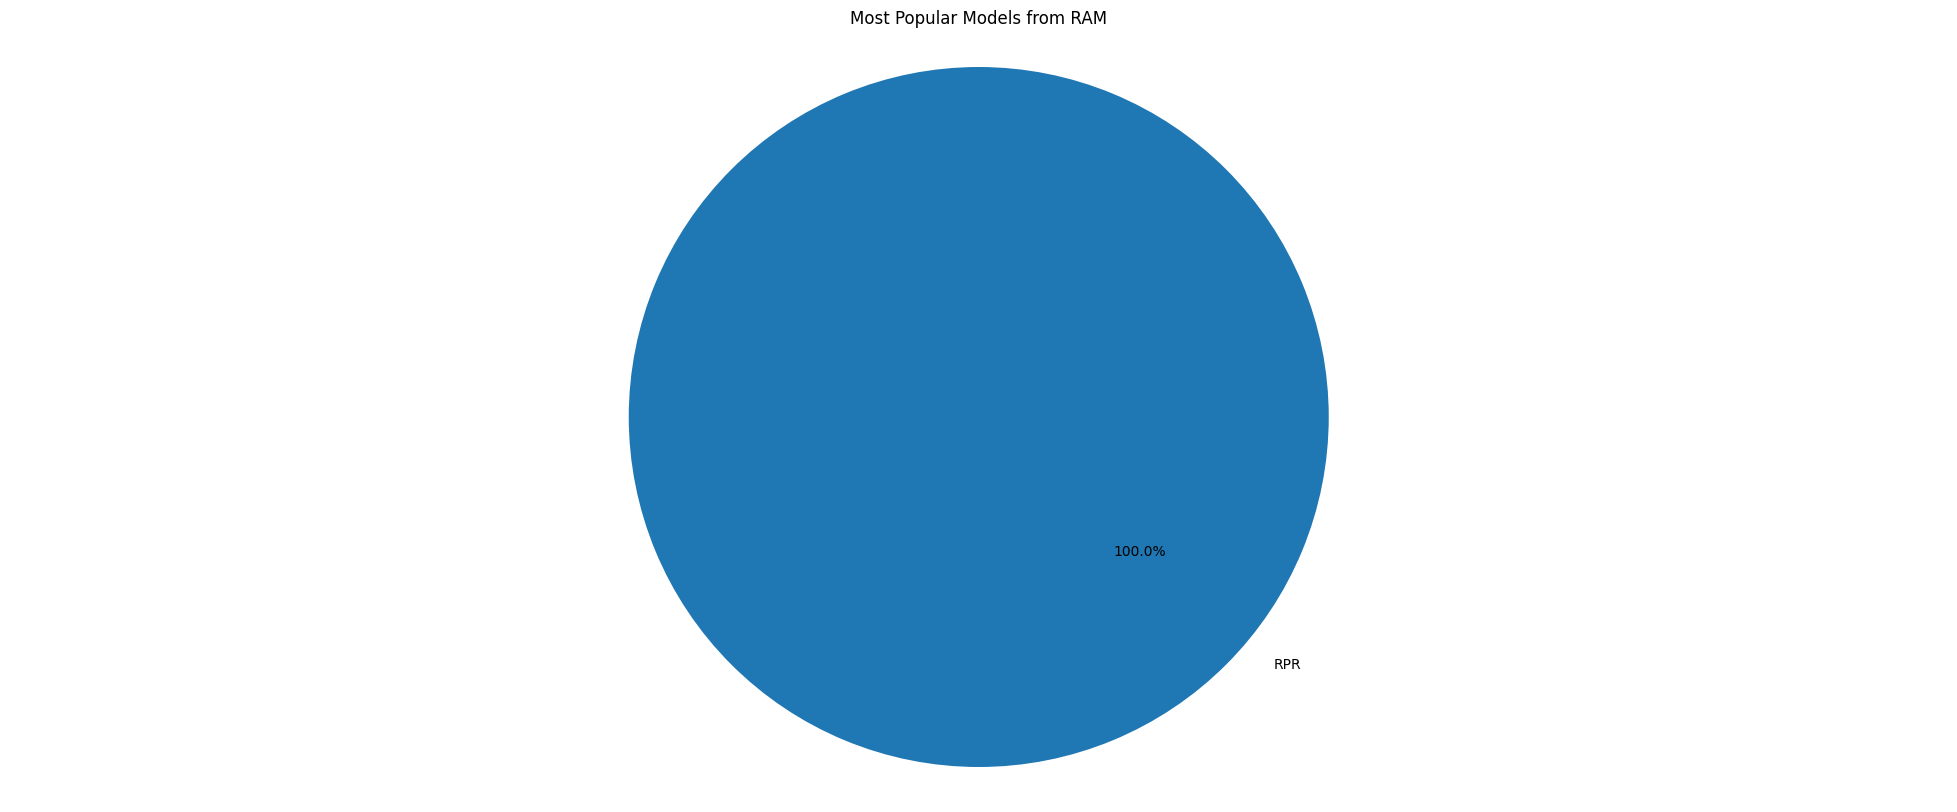

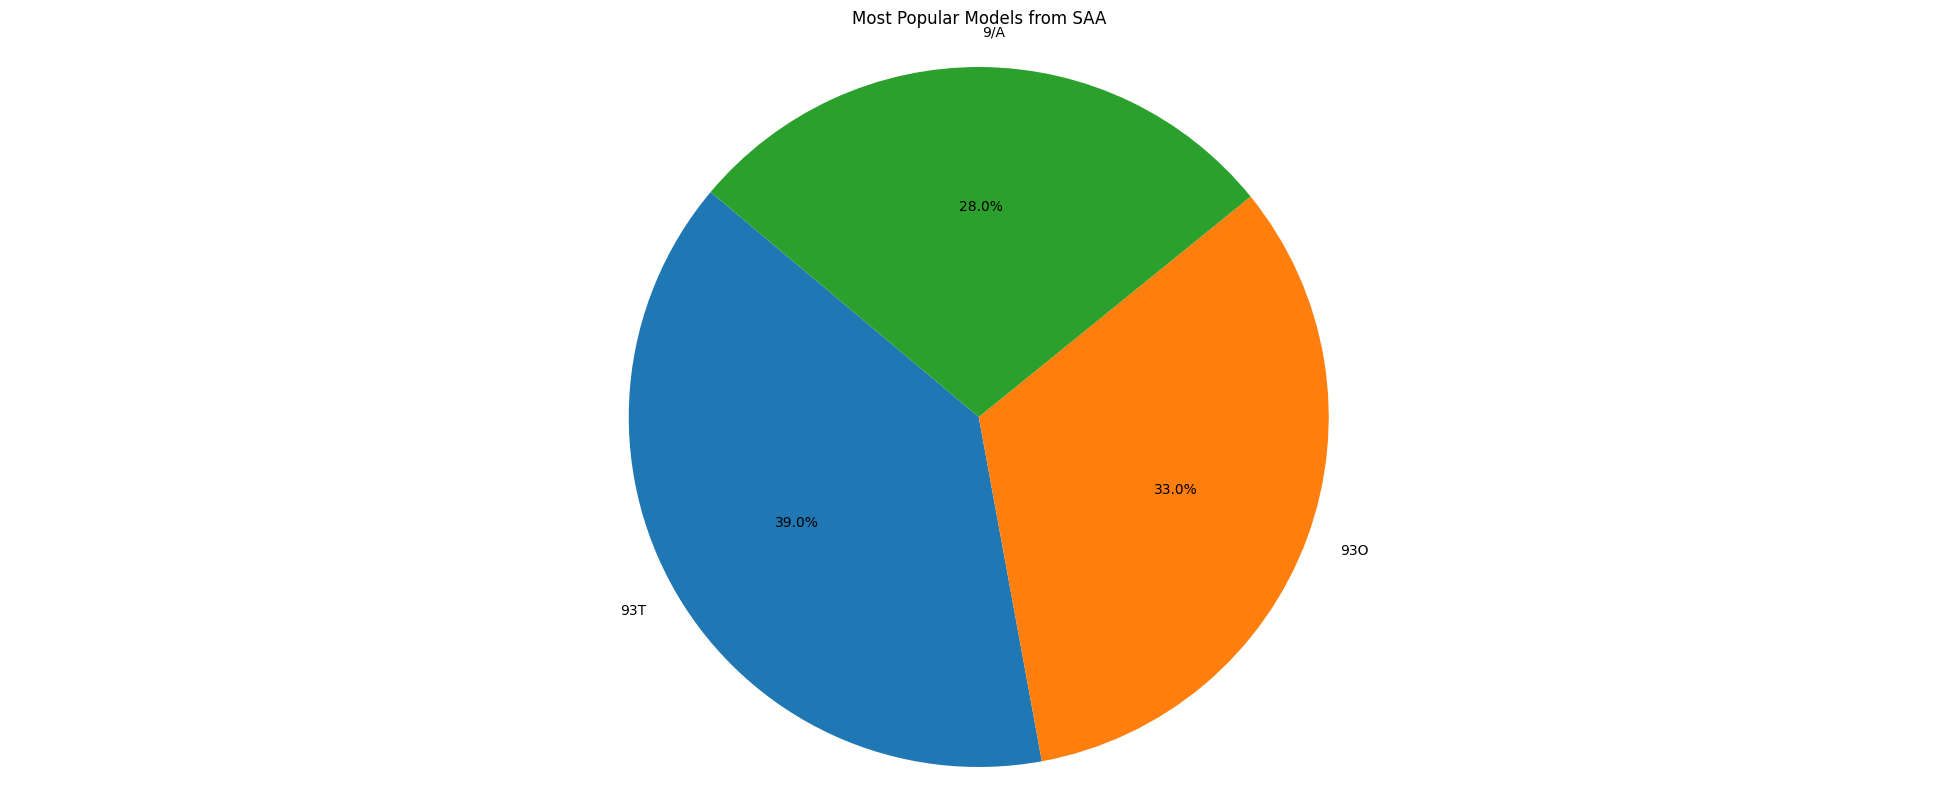

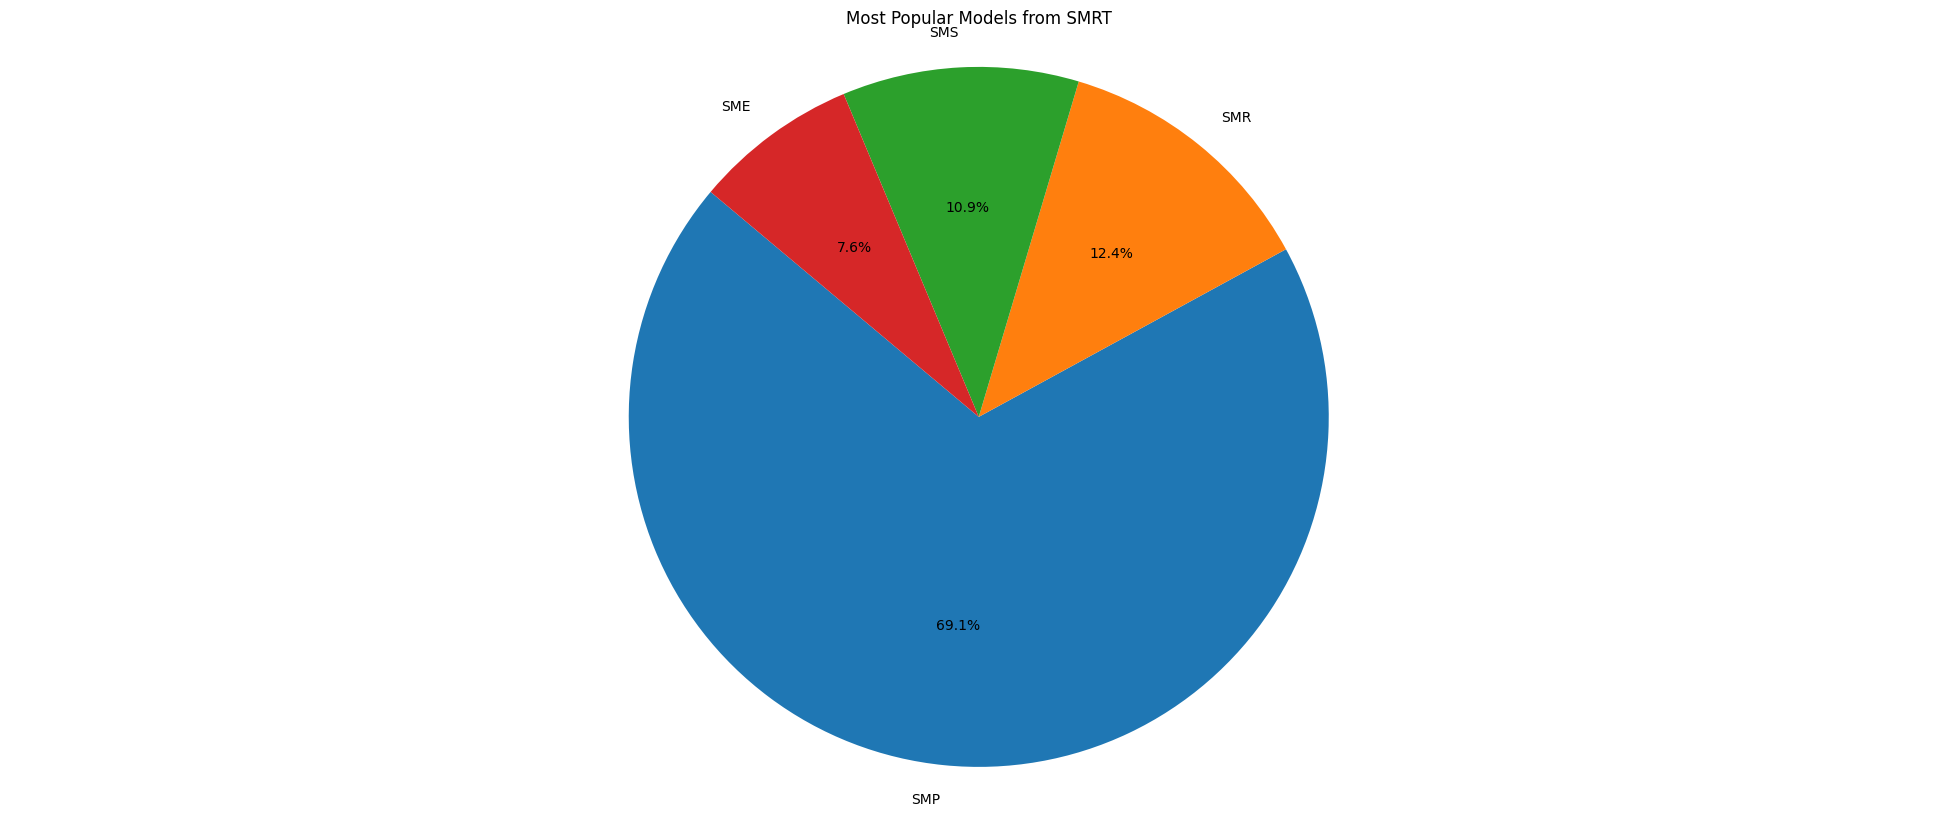

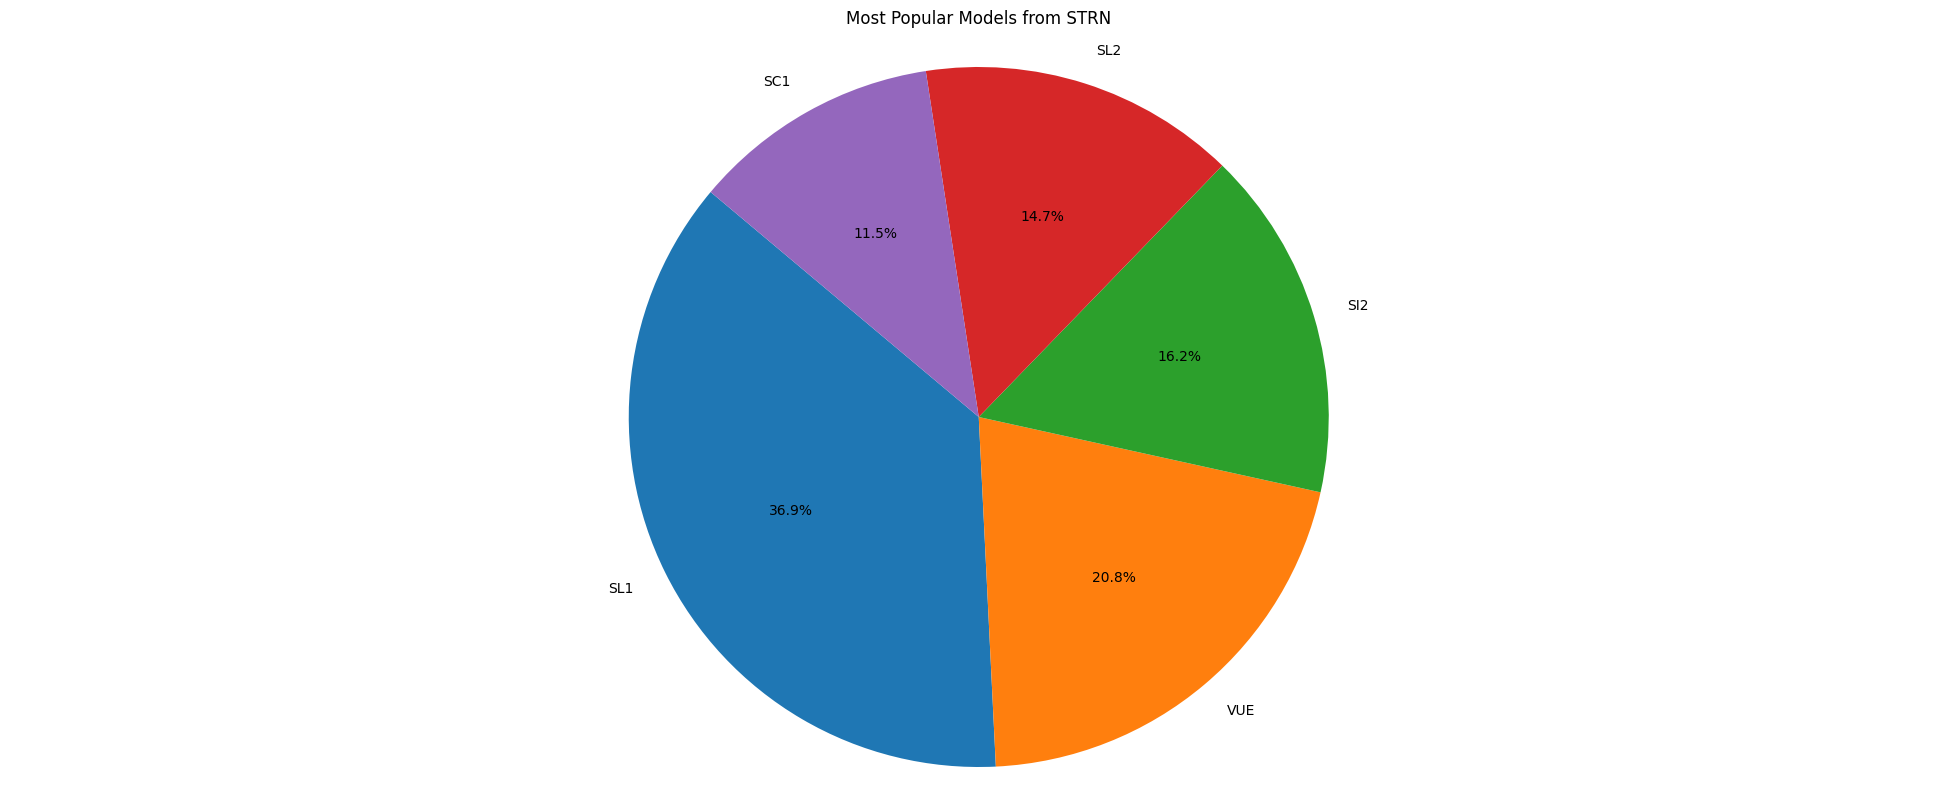

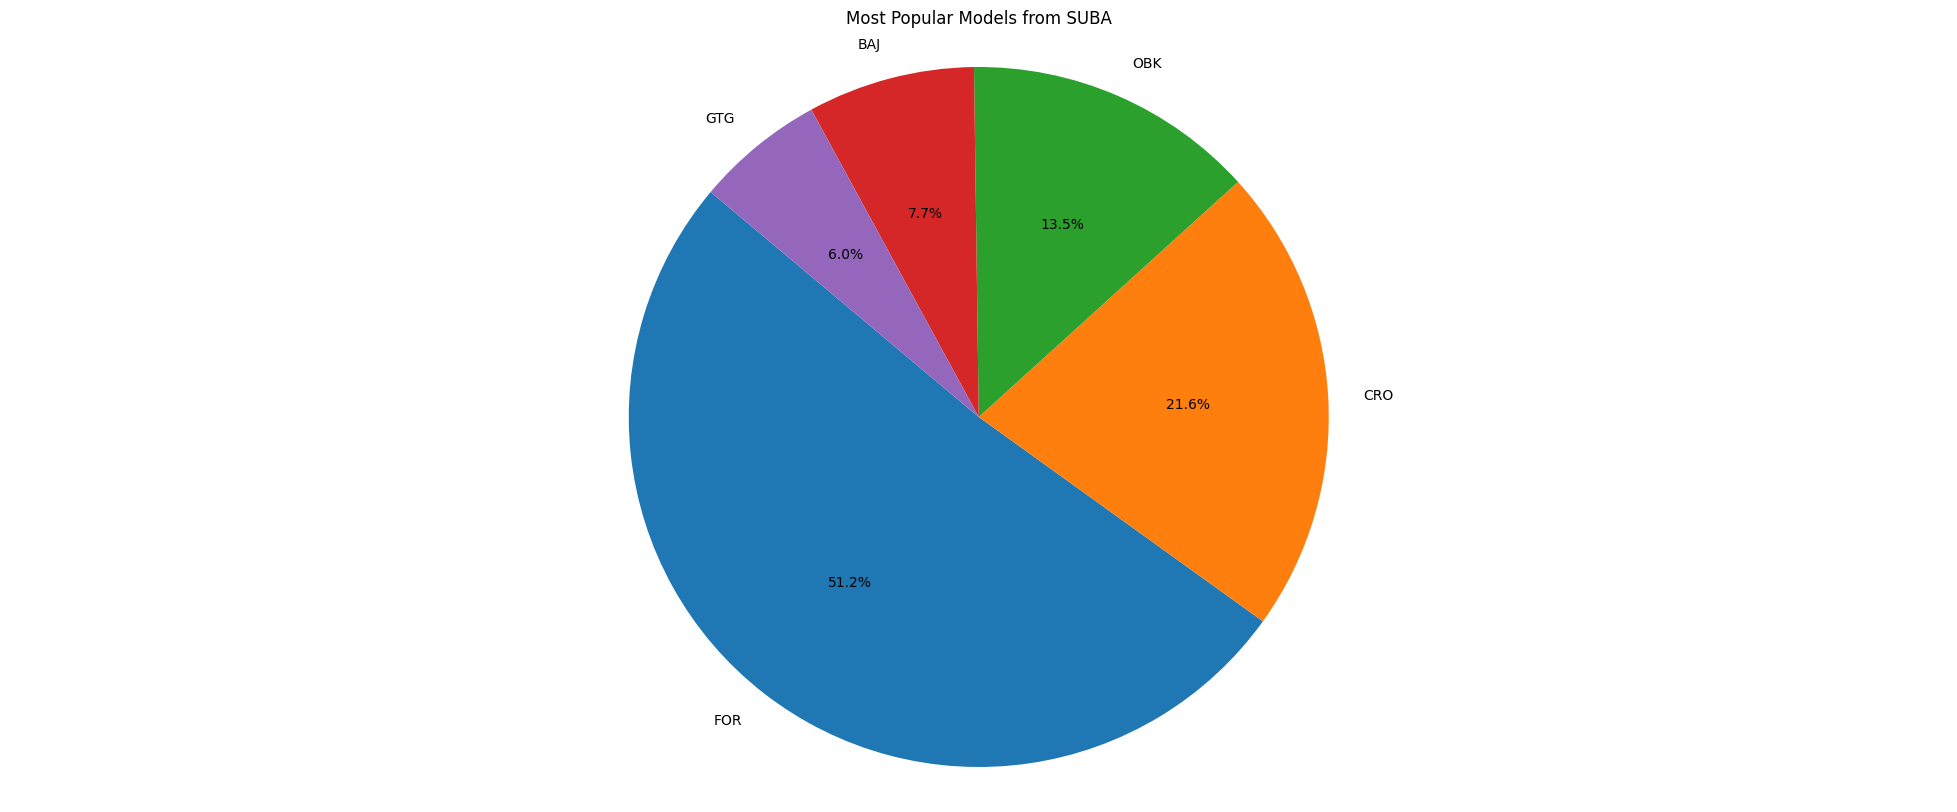

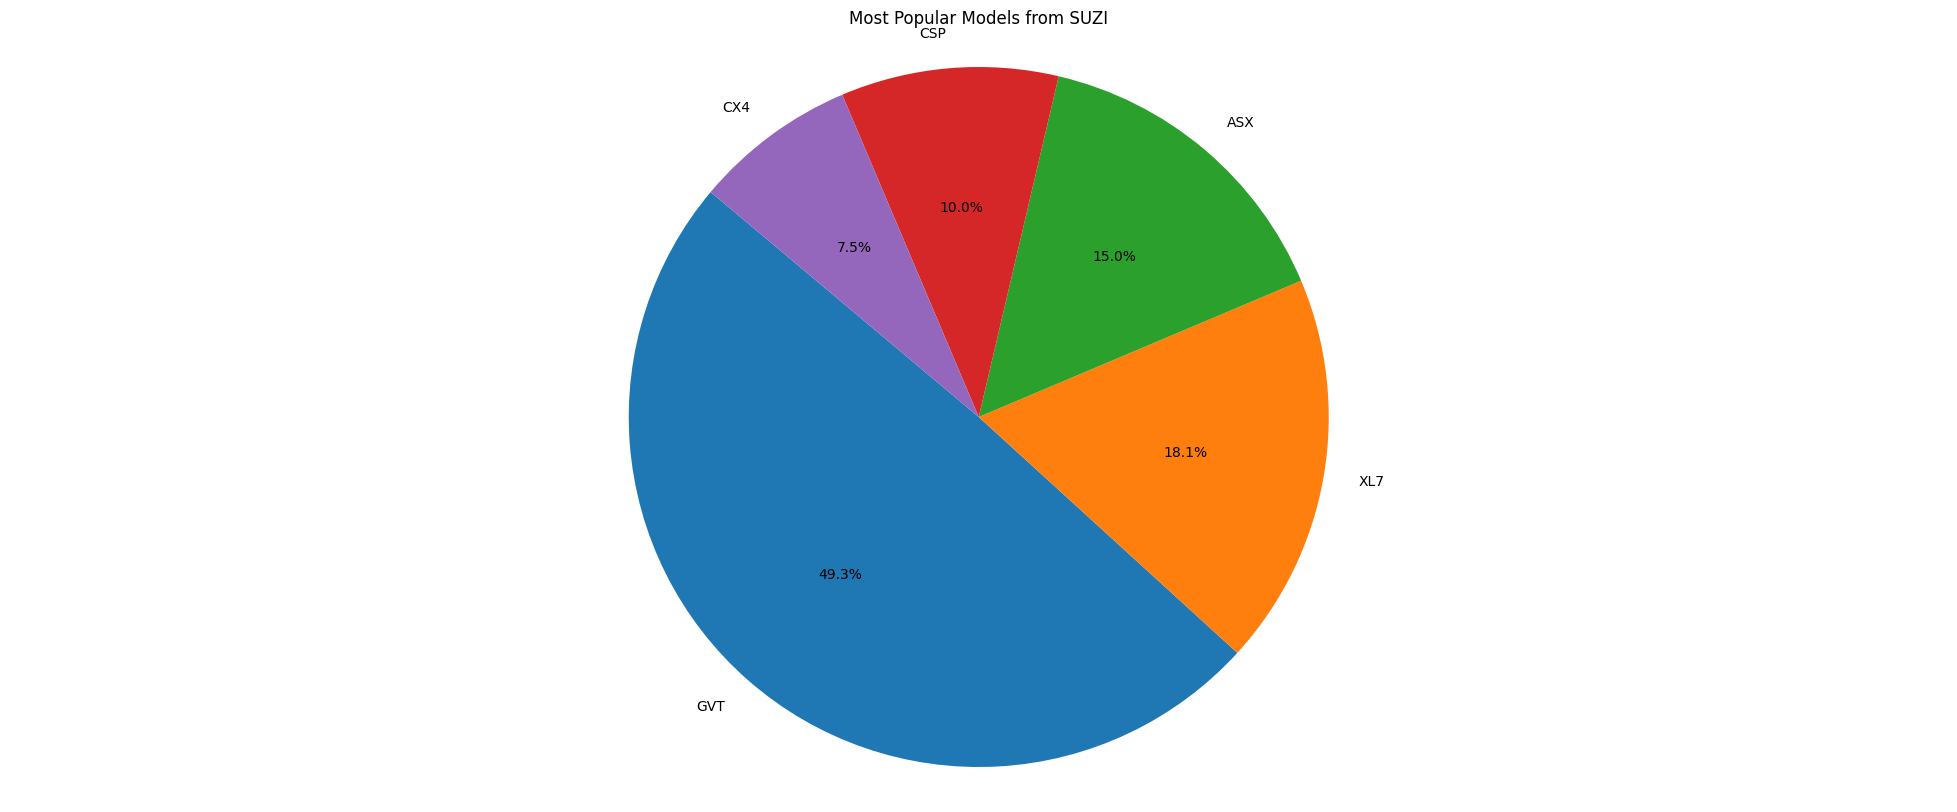

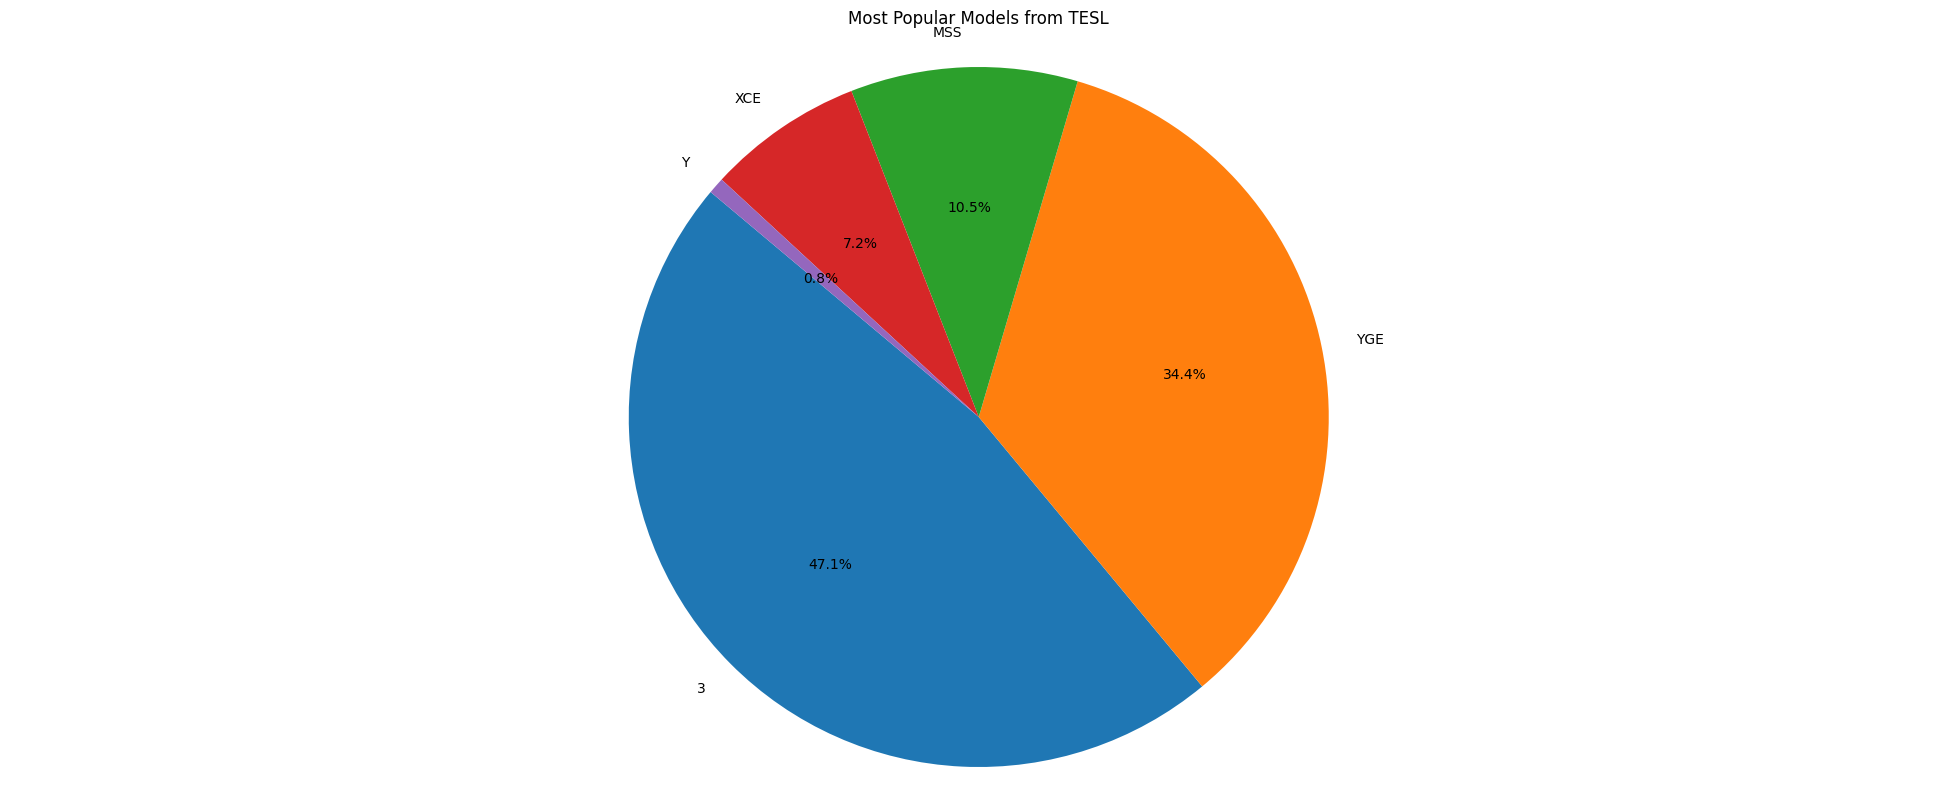

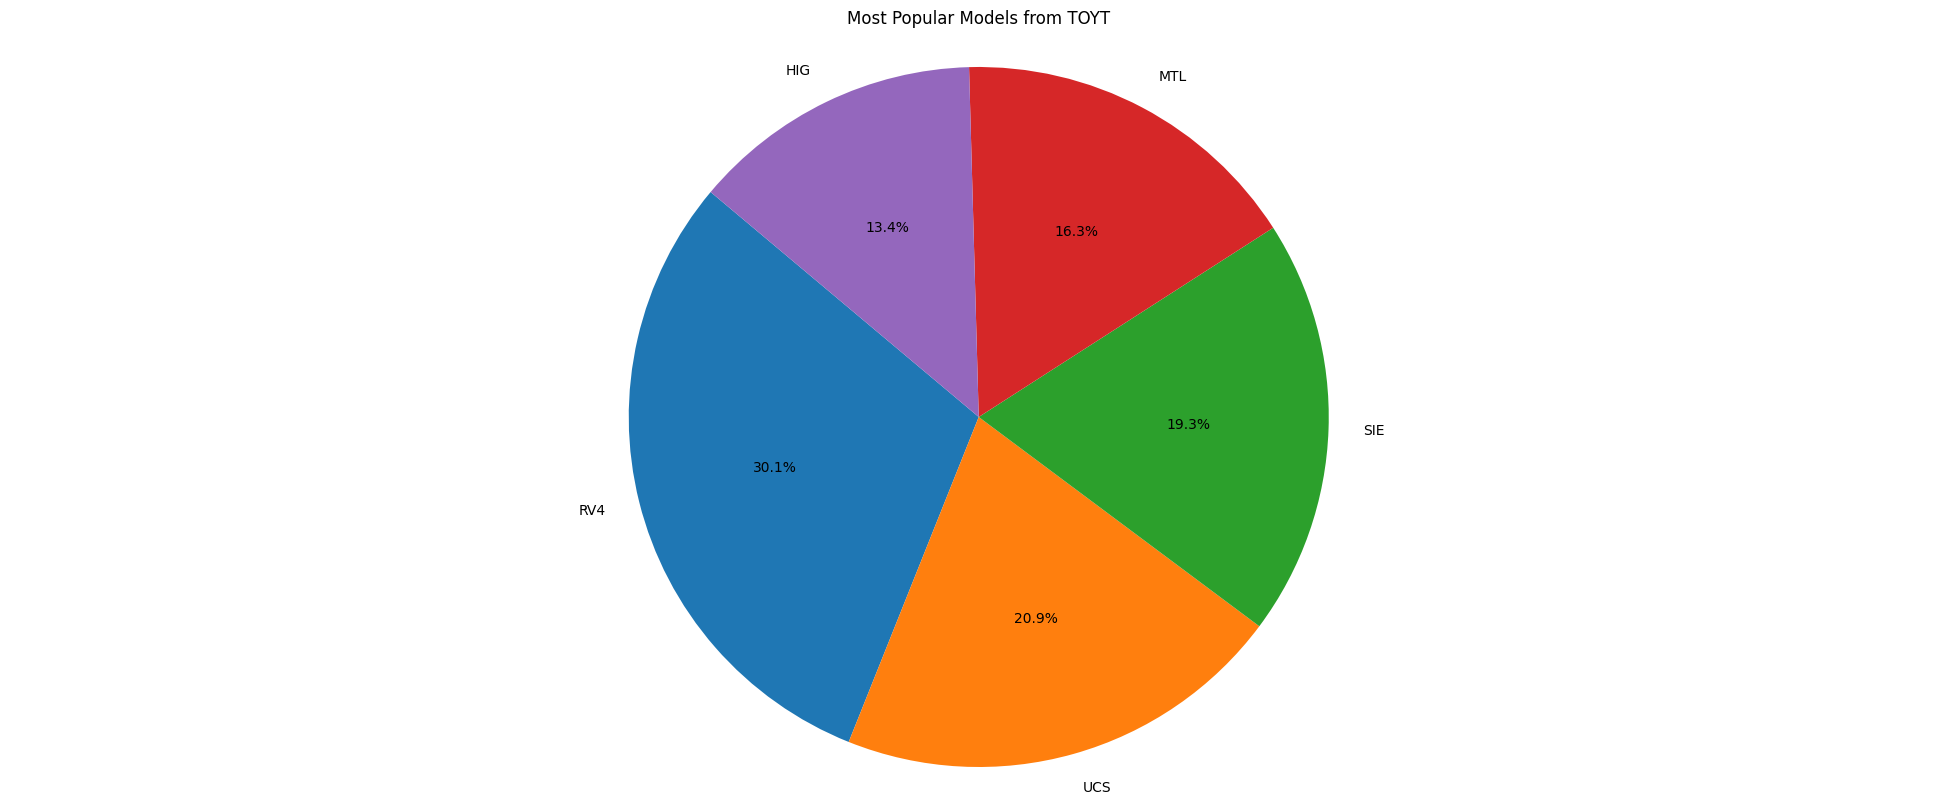

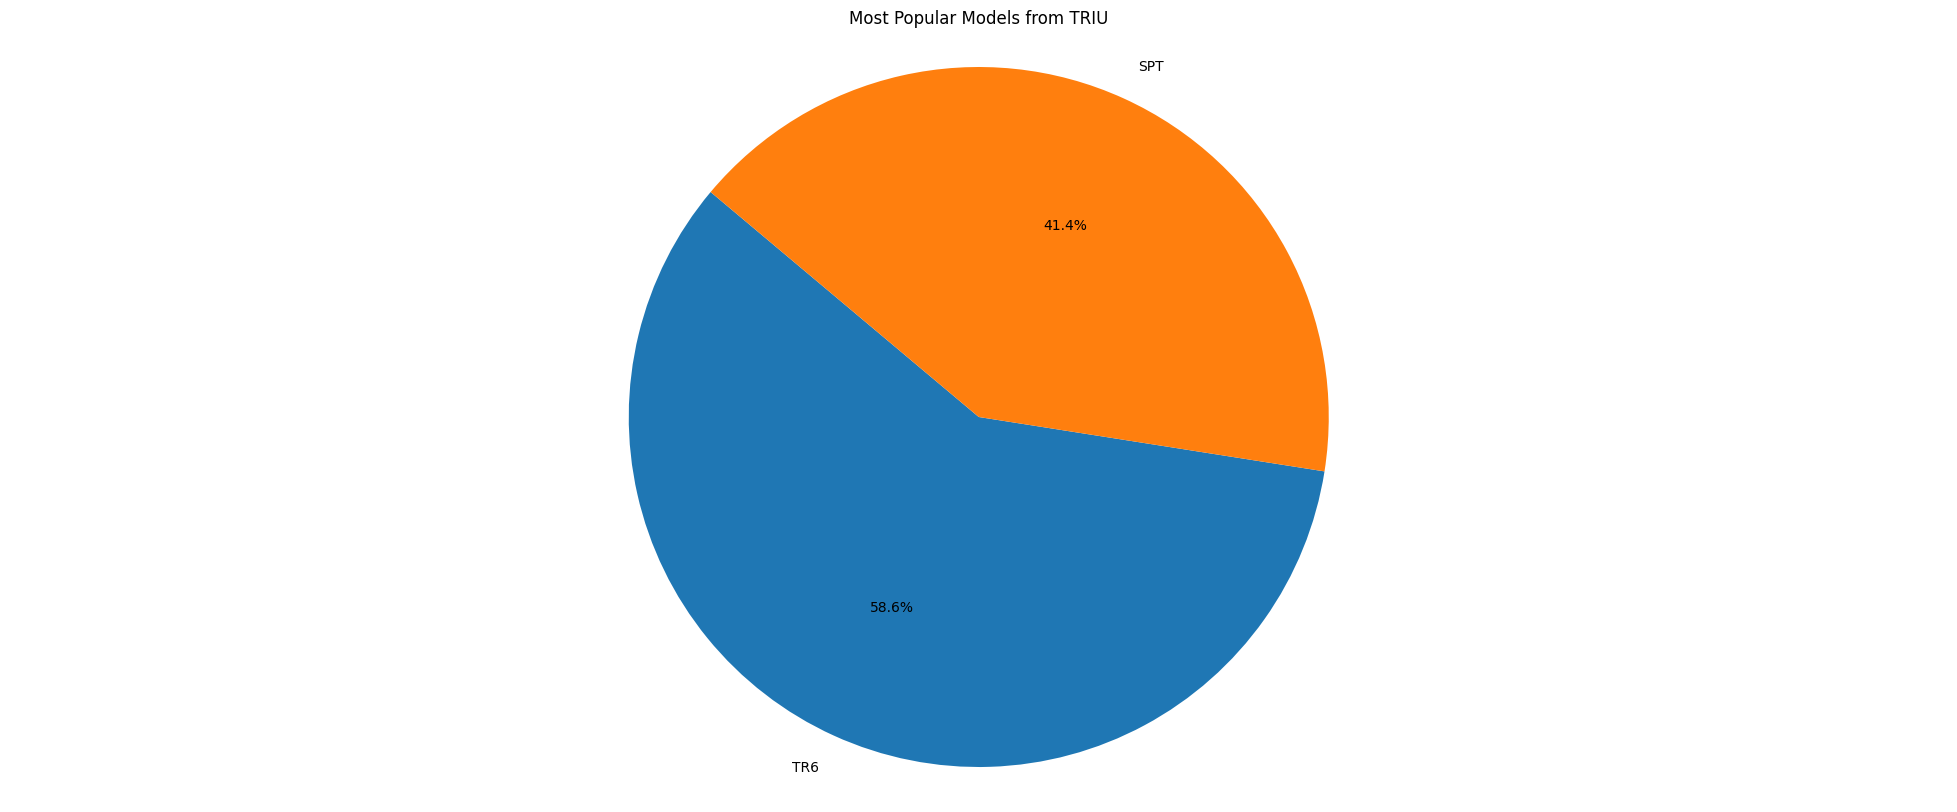

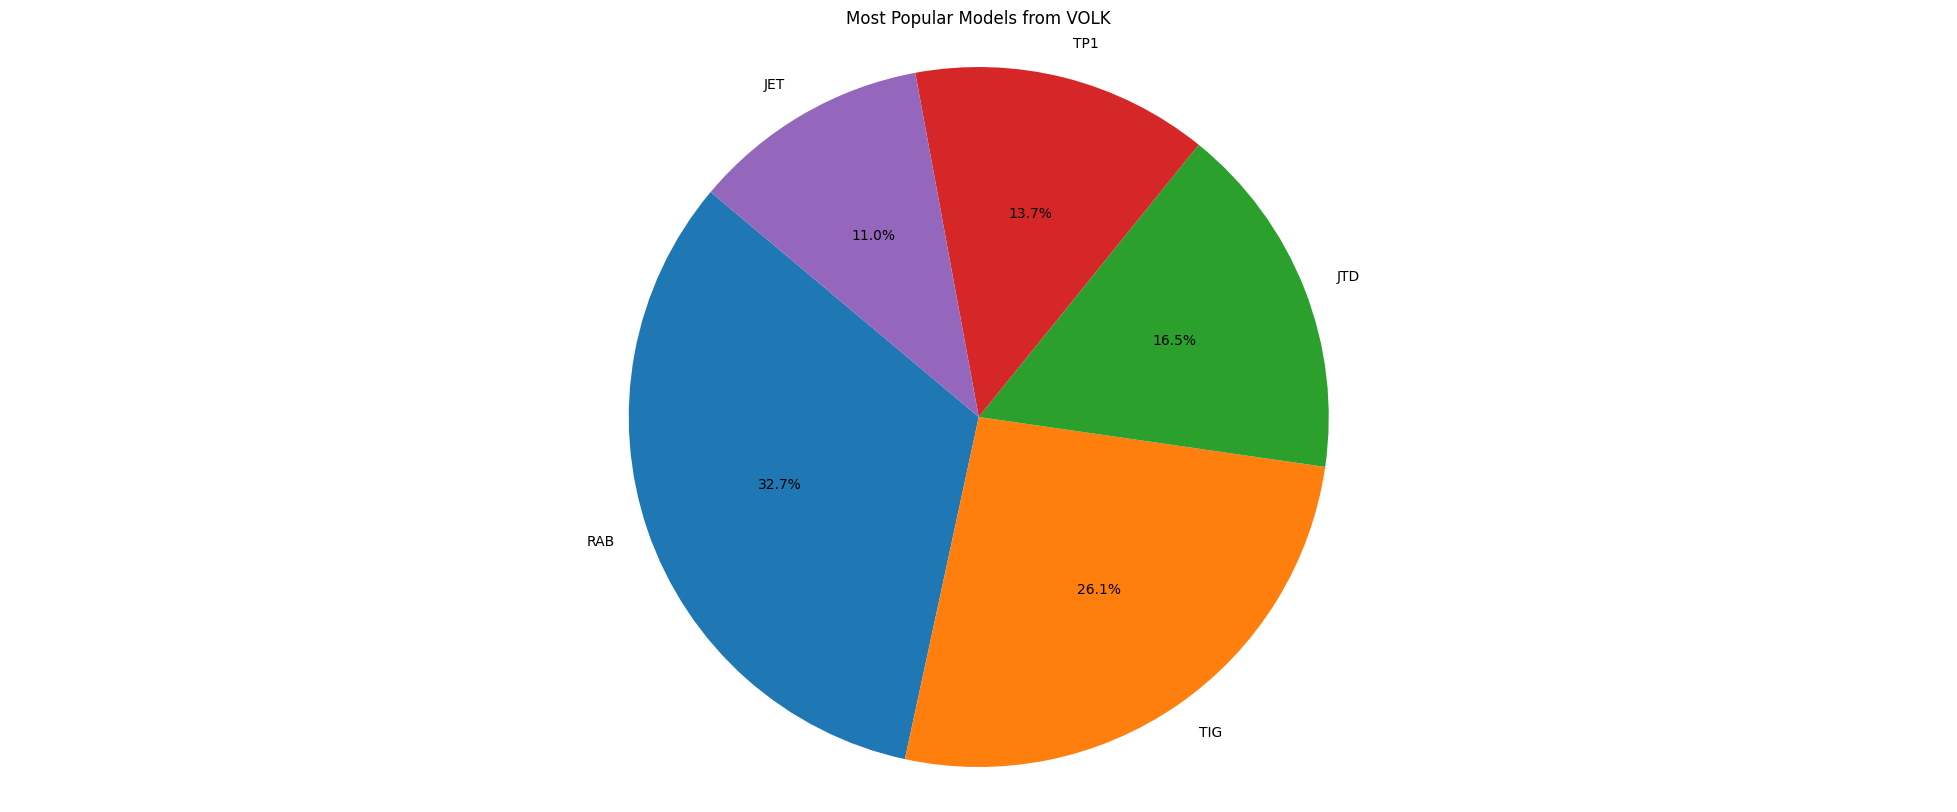

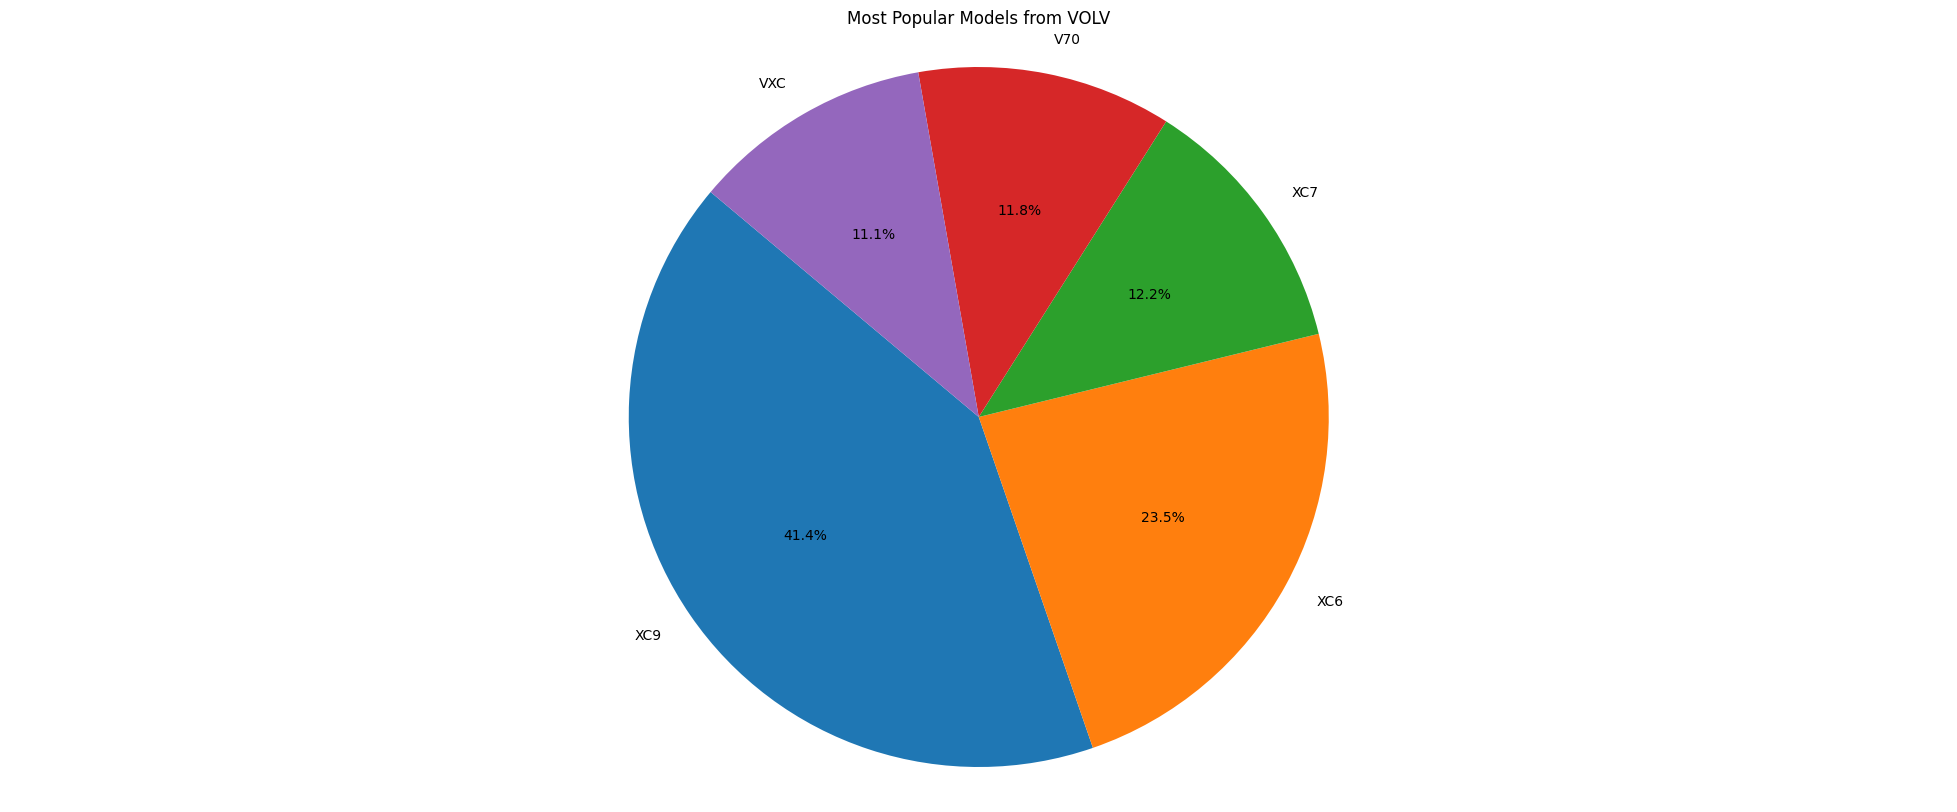

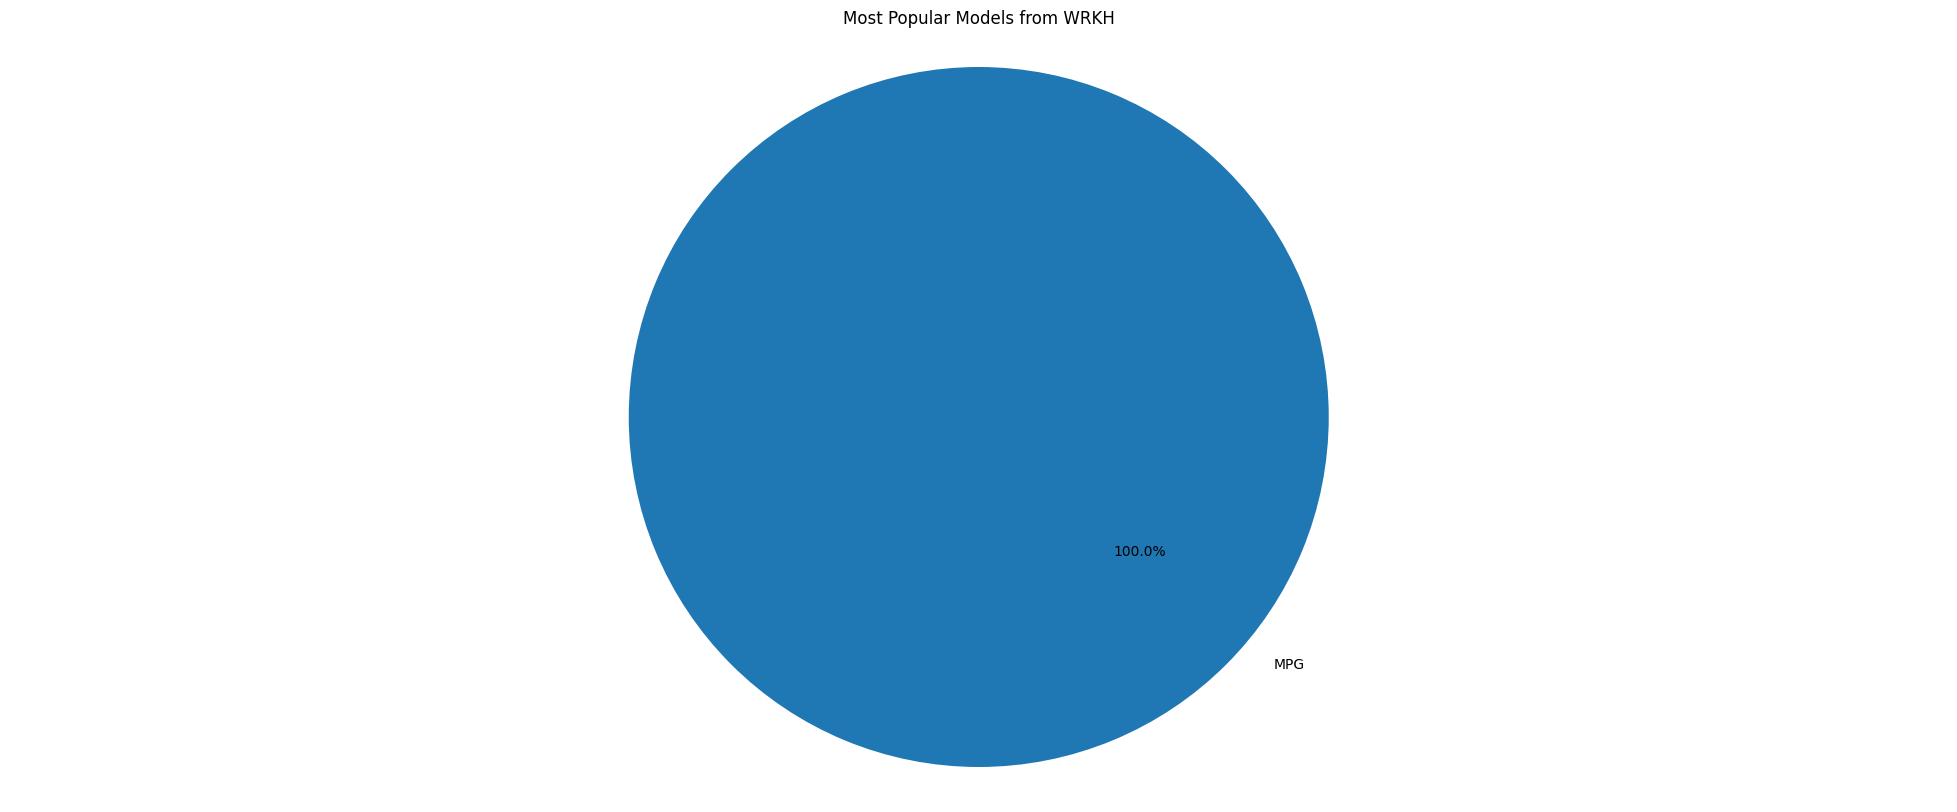

In [51]:
from collections import defaultdict

# Initialize a dictionary to store total vehicles
total_vehicles_by_maker_model = defaultdict(dict)

for row in dataset:
    vehicle_class = row[0] 
    if vehicle_class == 'PASSENGER':  # Filter for 'PASSENGER' class vehicles
        maker = row[1]  
        model = row[2] 
        if model != '***':  # Exclude rows with "***" as the model
            total = int(row[-1])  
            total_vehicles_by_maker_model[maker][model] = total_vehicles_by_maker_model[maker].get(model, 0) + total

top_n = 5

#Top models for each car maker
for maker, models in total_vehicles_by_maker_model.items():
    sorted_models = sorted(models.items(), key=lambda x: x[1], reverse=True)[:top_n]
    model_names = [model[0] for model in sorted_models]
    total_vehicles = [model[1] for model in sorted_models]

    #Pie Chart
    plt.figure(figsize=(25, 10))
    plt.pie(total_vehicles, labels=model_names, autopct='%1.1f%%', startangle=140)
    plt.title(f'Most Popular Models from {maker}')
    plt.axis('equal')
    plt.show()

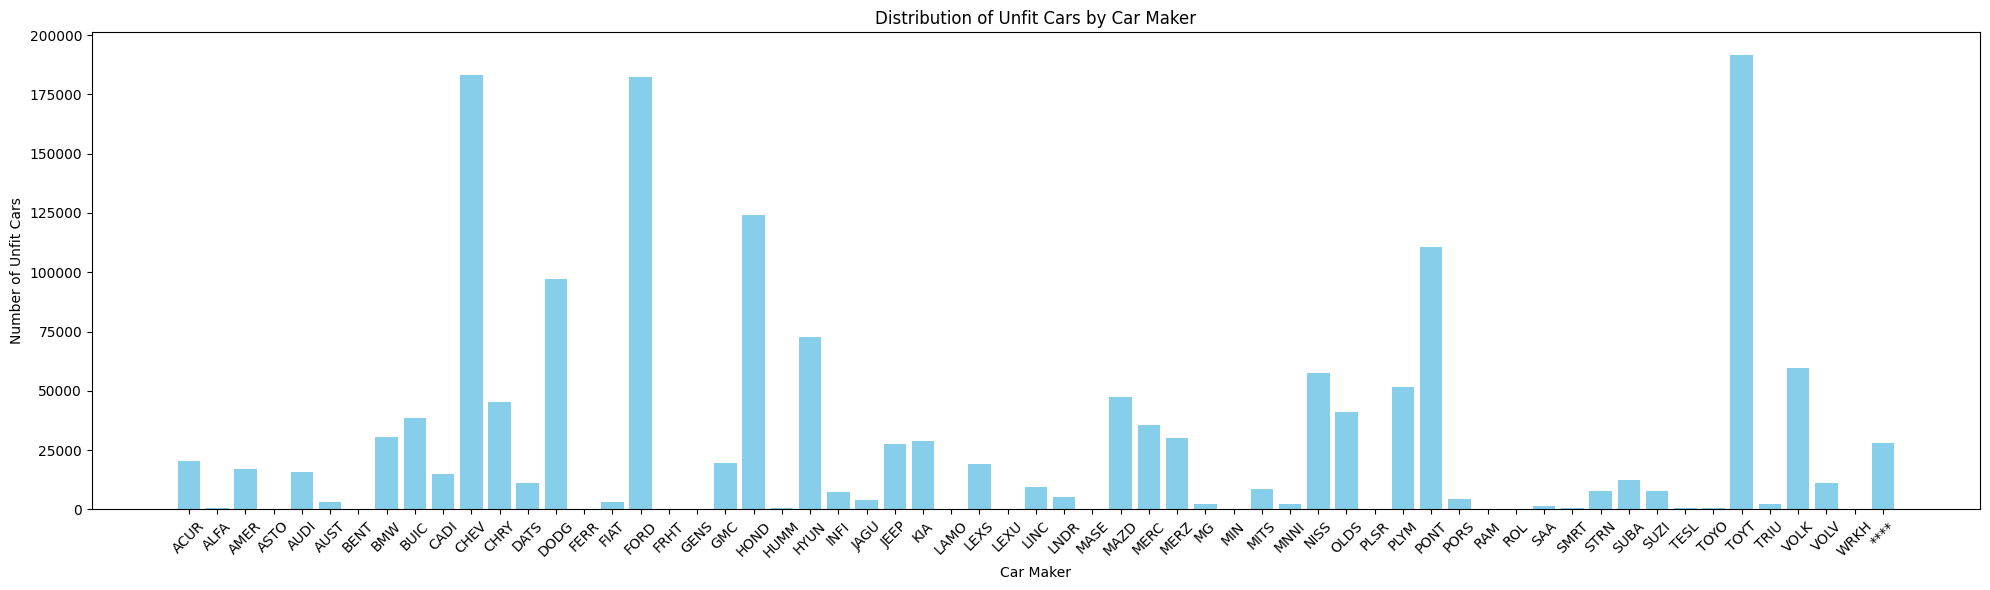

In [53]:
unfit_cars_by_maker = defaultdict(int)

for row in dataset:
    vehicle_class = row[0] 
    if vehicle_class == 'PASSENGER':  
        maker = row[1] 
        unfit_count = int(row[6])  
        unfit_cars_by_maker[maker] += unfit_count  

makers = list(unfit_cars_by_maker.keys())
unfit_counts = list(unfit_cars_by_maker.values())

plt.figure(figsize=(20, 6))
plt.bar(makers, unfit_counts, color='skyblue')
plt.xlabel('Car Maker')
plt.ylabel('Number of Unfit Cars')
plt.title('Distribution of Unfit Cars by Car Maker')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()